<a href="https://colab.research.google.com/github/Aboubacar2012/Data_Analysis_Project/blob/main/P2_DABO_Mame_Diarra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
import warnings
warnings.filterwarnings('ignore')


In [2]:
#### Connecting  drive 
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importer les données 
EdStatsCountrySeries= pd.read_csv("/content/drive/MyDrive/ml_data/P2/EdStatsCountry-Series.csv")
EdStatsCountry= pd.read_csv("/content/drive/MyDrive/ml_data/P2/EdStatsCountry.csv")
EdStatsData= pd.read_csv("/content/drive/MyDrive/ml_data/P2/EdStatsData.csv")
EdStatsFootNote=pd.read_csv("/content/drive/MyDrive/ml_data/P2/EdStatsFootNote.csv")
EdStatsSeries= pd.read_csv("/content/drive/MyDrive/ml_data/P2/EdStatsSeries.csv")

In [4]:
ECScopy = EdStatsCountrySeries.copy()
ECcopy = EdStatsCountry.copy()
EDcopy = EdStatsData.copy()
ESFcopy = EdStatsFootNote.copy()
EScopy = EdStatsSeries.copy()

In [5]:
# Observation des 5 premiers lignes de l'échantillon
ECScopy.head(5)

CountryCode  ... Unnamed: 3
0         ABW  ...        NaN
1         ABW  ...        NaN
2         AFG  ...        NaN
3         AFG  ...        NaN
4         AFG  ...        NaN

[5 rows x 4 columns]

In [6]:
# Forme du jeu de donnés (EdStatsCountrySeries)
ECScopy.shape

(613, 4)

In [7]:
# Vérification des doublons
ECScopy[ECScopy.duplicated()]

Empty DataFrame
Columns: [CountryCode, SeriesCode, DESCRIPTION, Unnamed: 3]
Index: []

## Définition d'une fonction pour évaluer la qualité des données

In [8]:
def data_quality_assment(ECScopy):
  # sum null values
  total_null_values =ECScopy.isnull().sum().sort_values(ascending=False)
    
  # Pourcentages des valeurs nulls
  percentage_null_values=round(ECScopy.isnull().sum()/ECScopy.isnull().count()*100,2).sort_values(ascending=False)
    
  #Typages de données
  info=ECScopy.info()
    
  #Statistiques descriptives
  stats=ECScopy.describe()
    
  # Concatenation sum null values and pourcentage
  missing_data=pd.concat([total_null_values, percentage_null_values, info], axis=1, keys=['Total','Pourcentage','Info'])
  visual=msno.bar(ECScopy)  

 # print(sum_nan)
 # print(percentage)

  #Print
  print('\n Null values')
  print(missing_data)
  print('\n Visualizations des NaNs', visual)
  print('\n Statistiques descriptives')
  print(stats)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  613 non-null    object 
 1   SeriesCode   613 non-null    object 
 2   DESCRIPTION  613 non-null    object 
 3   Unnamed: 3   0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 19.3+ KB

 Null values
             Total  Pourcentage
Unnamed: 3     613        100.0
DESCRIPTION      0          0.0
SeriesCode       0          0.0
CountryCode      0          0.0

 Visualizations des NaNs AxesSubplot(0.125,0.125;0.775x0.755)

 Statistiques descriptives
       Unnamed: 3
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


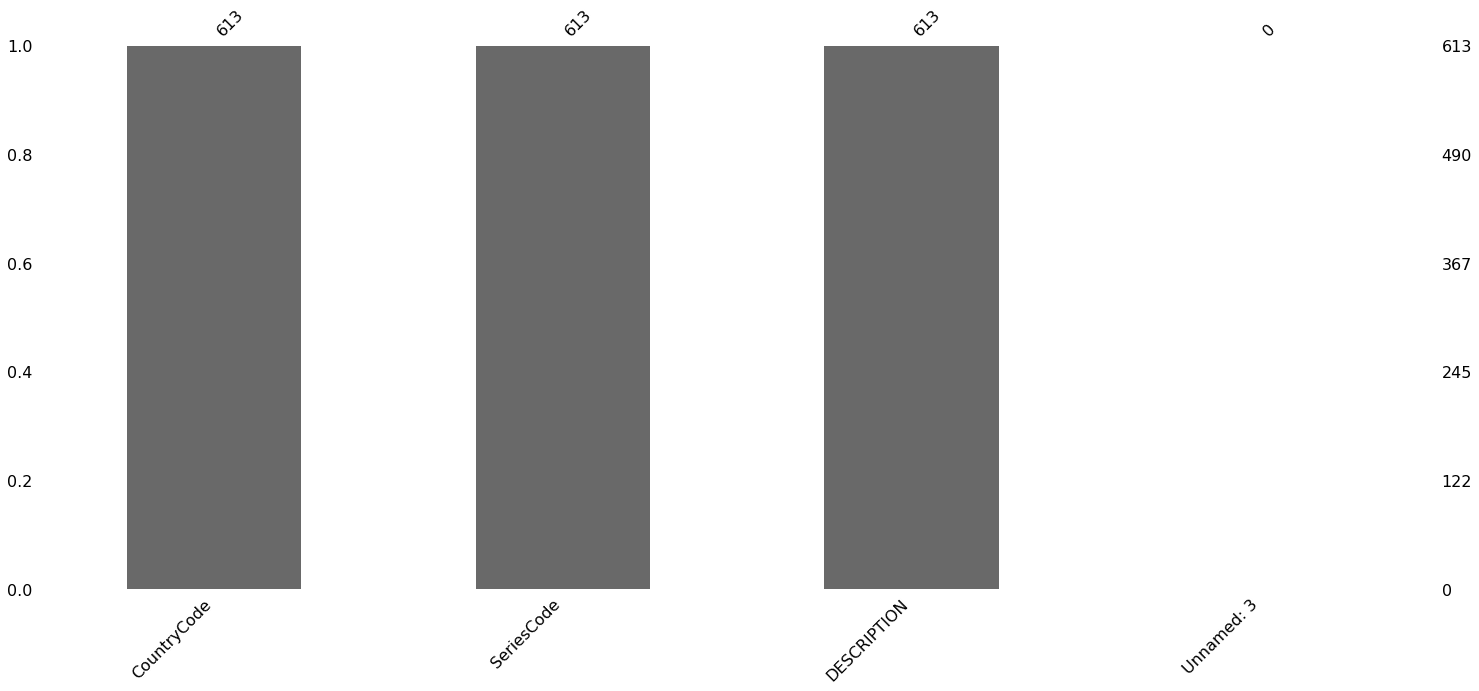

In [9]:
# Appel à la fonction 
data_quality_assment(ECScopy)

In [10]:
# Observation avec les 5 premiers de l'échantillon 
ECcopy.head(5)

Country Code   Short Name  ... Latest water withdrawal data Unnamed: 31
0          ABW        Aruba  ...                          NaN         NaN
1          AFG  Afghanistan  ...                         2000         NaN
2          AGO       Angola  ...                         2005         NaN
3          ALB      Albania  ...                         2006         NaN
4          AND      Andorra  ...                          NaN         NaN

[5 rows x 32 columns]

In [11]:
# Forme du jeu de données 
ECcopy.shape

(241, 32)

In [12]:
# Vérification des doublons
ECcopy[ECcopy.duplicated()]

Empty DataFrame
Columns: [Country Code, Short Name, Table Name, Long Name, 2-alpha code, Currency Unit, Special Notes, Region, Income Group, WB-2 code, National accounts base year, National accounts reference year, SNA price valuation, Lending category, Other groups, System of National Accounts, Alternative conversion factor, PPP survey year, Balance of Payments Manual in use, External debt Reporting status, System of trade, Government Accounting concept, IMF data dissemination standard, Latest population census, Latest household survey, Source of most recent Income and expenditure data, Vital registration complete, Latest agricultural census, Latest industrial data, Latest trade data, Latest water withdrawal data, Unnamed: 31]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

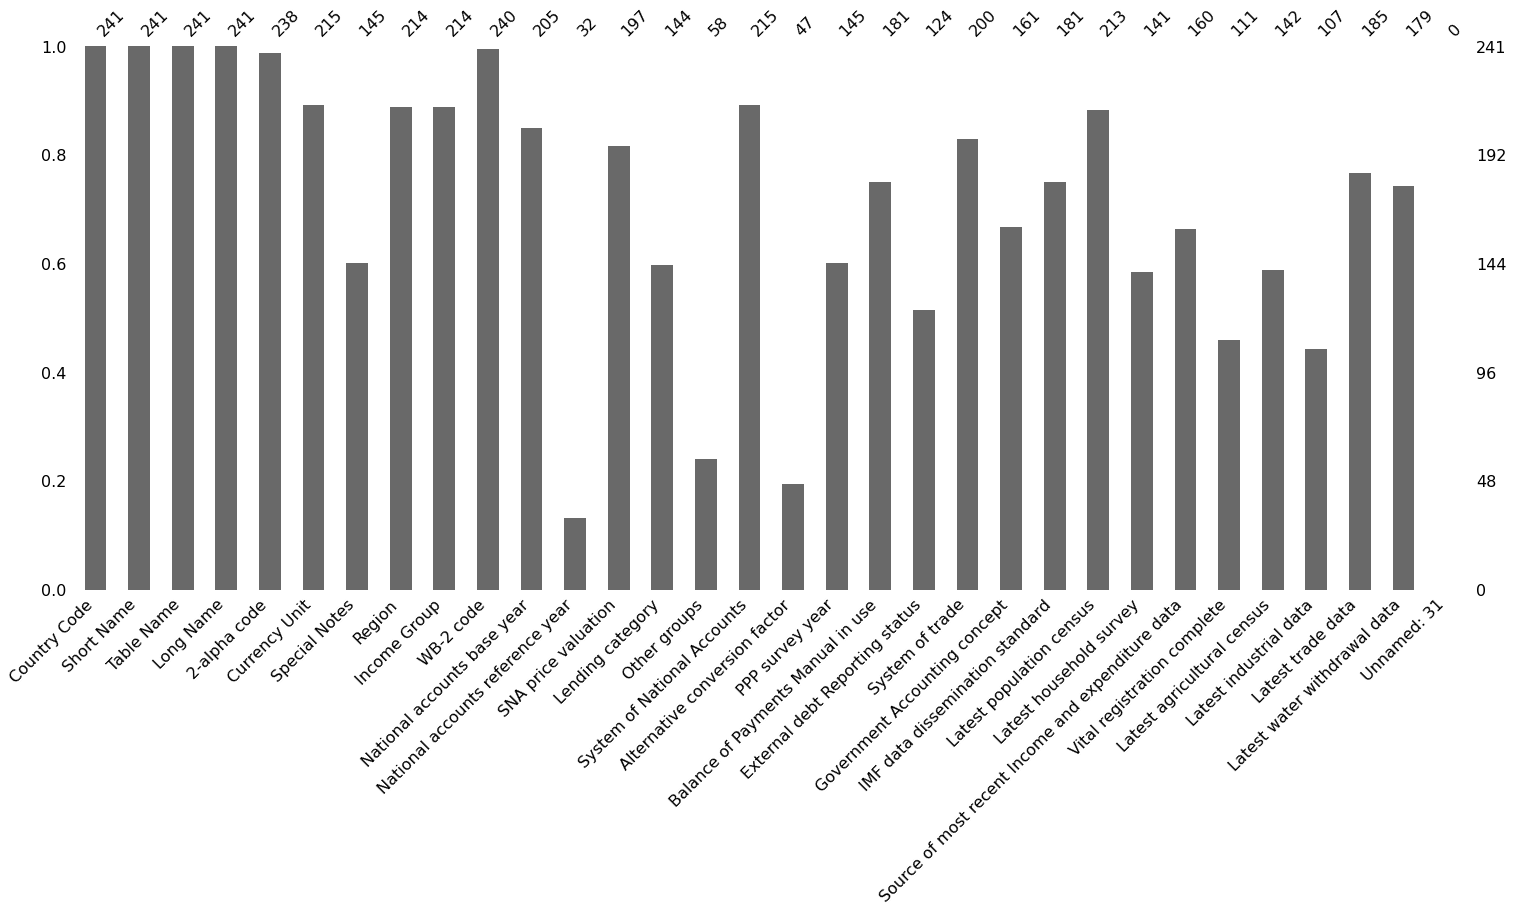

In [13]:
data_quality_assment(ECcopy)

# # Suppression des variables moins remplis et semblent non pertinent

In [14]:
# D'aprés la visualisation  je peux supprimer quelques colonnes avec beaucoup de valeurs nulles 
ECcopy.drop(columns=['Special Notes', 'National accounts reference year', 'Vital registration complete', 'Latest agricultural census',
                             'Latest water withdrawal data','Latest household survey', 'Source of most recent Income and expenditure data', 
                             'Lending category', 'Other groups','Alternative conversion factor', 'PPP survey year', 
                             'Balance of Payments Manual in use', 'External debt Reporting status','Latest industrial data',
                             'Government Accounting concept', 'IMF data dissemination standard', 'Latest trade data', 
                            'SNA price valuation', 'Unnamed: 31','Short Name','Table Name','WB-2 code','2-alpha code','System of trade',
                             'Long Name','National accounts base year','National accounts reference year','System of National Accounts',
                             'Currency Unit','Latest population census','Income Group'], inplace=True)

In [15]:
# Observation avec 5 Echantillons aléatoire aprés suppression de quelques colonnes
ECcopy.sample(5)

Country Code                      Region
56          DZA  Middle East & North Africa
65          ESP       Europe & Central Asia
94          HTI   Latin America & Caribbean
80          GMB          Sub-Saharan Africa
67          ETH          Sub-Saharan Africa

In [16]:
# Somme des valeurs uniques
ECcopy['Region'].nunique()

7

In [17]:
ECcopy['Region'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [18]:
count_region = ECcopy["Region"].value_counts()
count_region

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

In [19]:
# Observation avec les 5 premiers lignes
EDcopy.head(5)

Country Name Country Code  ... 2100 Unnamed: 69
0   Arab World          ARB  ...  NaN         NaN
1   Arab World          ARB  ...  NaN         NaN
2   Arab World          ARB  ...  NaN         NaN
3   Arab World          ARB  ...  NaN         NaN
4   Arab World          ARB  ...  NaN         NaN

[5 rows x 70 columns]

In [20]:
# Forme du jeu de données 
EDcopy.shape

(886930, 70)

In [21]:
# Vérification des doublons
EDcopy[EDcopy.duplicated()]

Empty DataFrame
Columns: [Country Name, Country Code, Indicator Name, Indicator Code, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100, Unnamed: 69]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

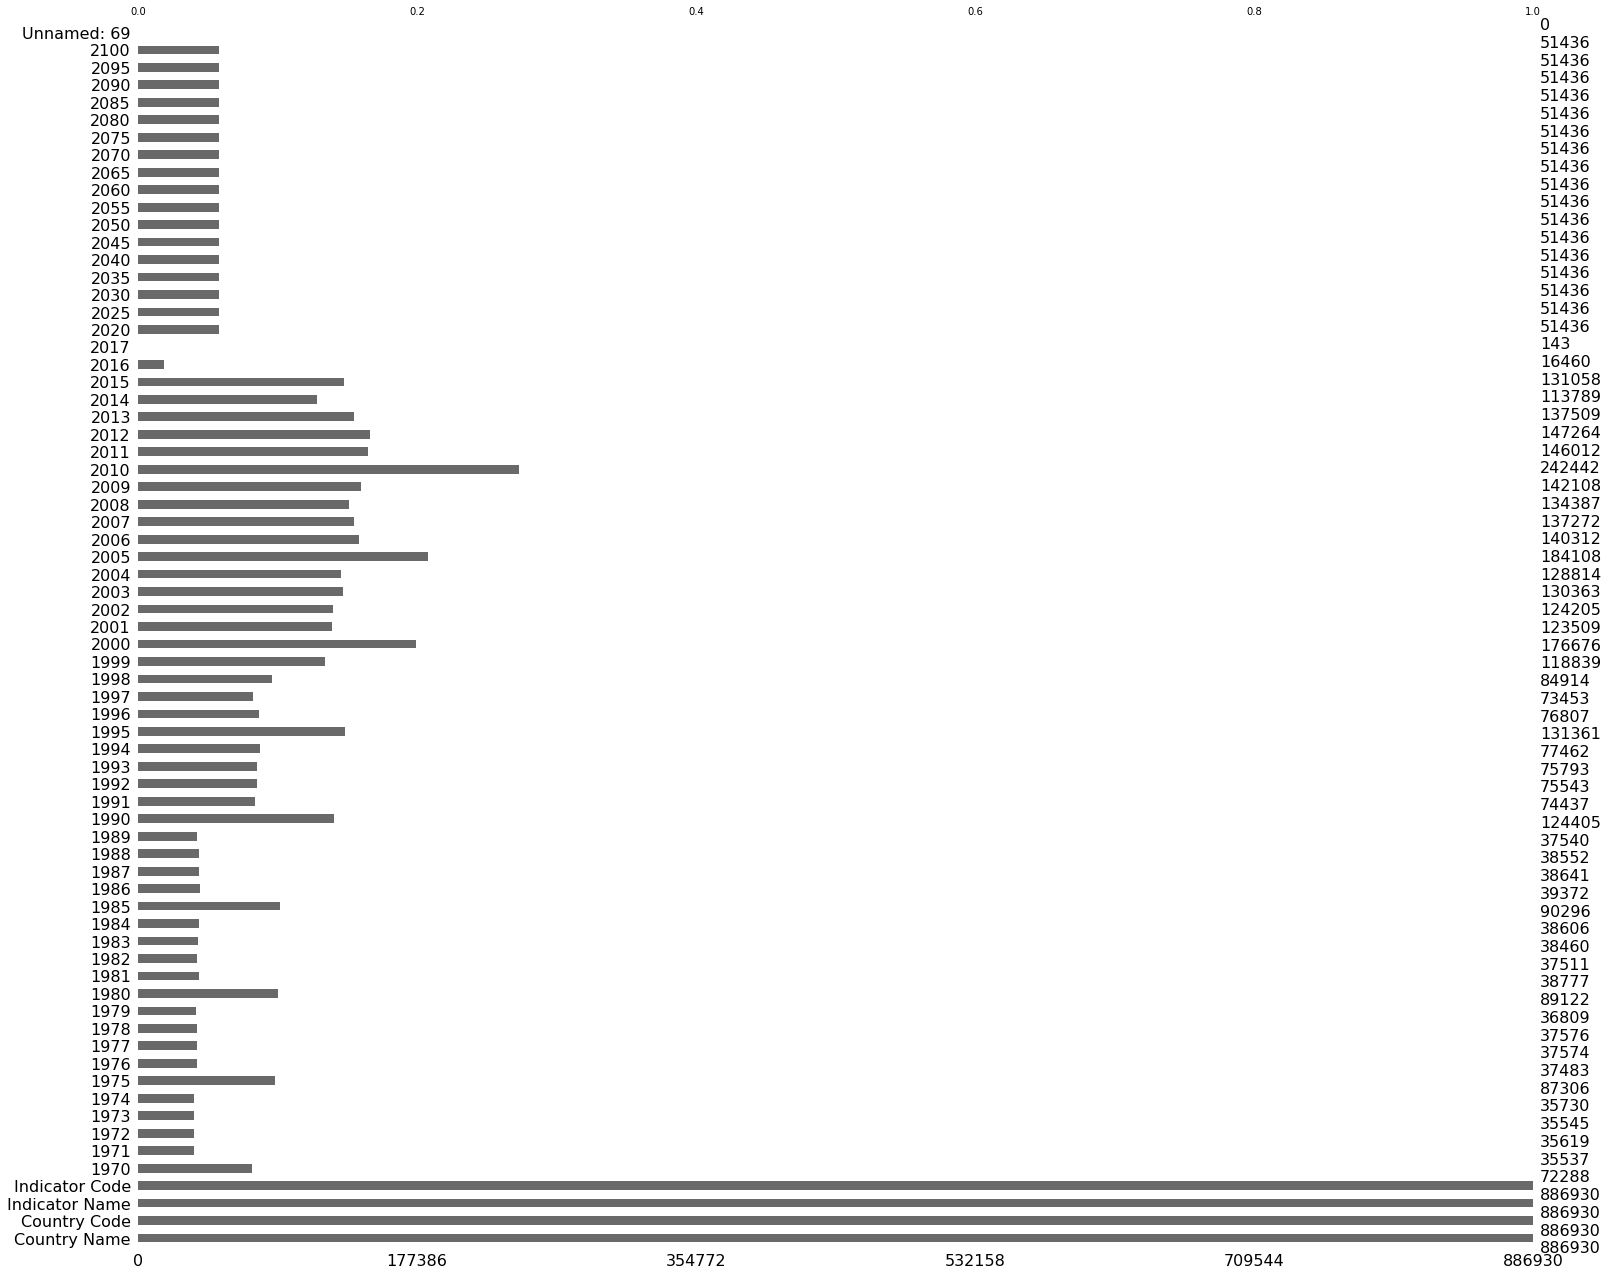

In [22]:
# Appel à la fonction 
data_quality_assment(EDcopy)

## Séparation des données futures et données passés 

### Remplissage données passées en supprimant quelques années avec un intervalle de 5 ans pour les années passées

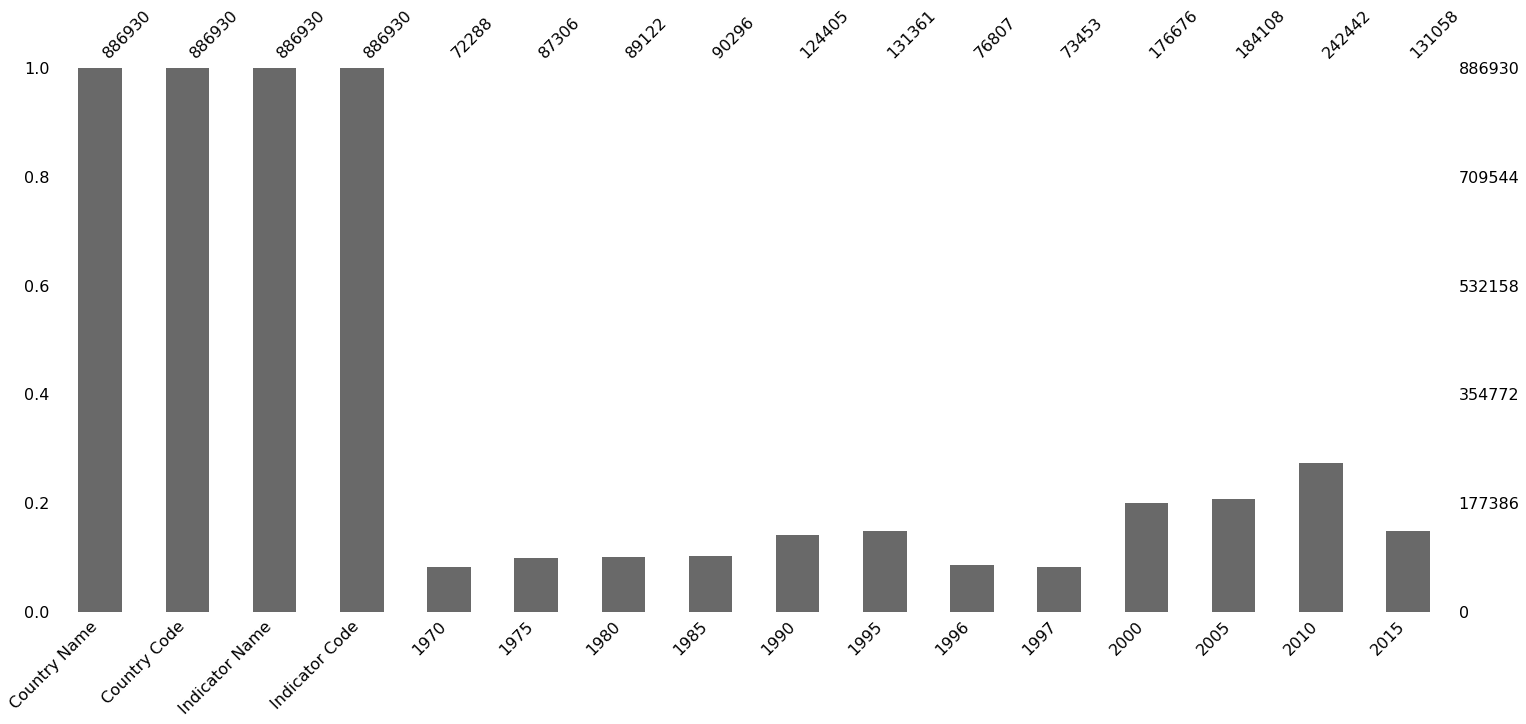

In [23]:
msno.bar(EDcopy[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code','1970', '1975', '1980', '1985', 
                  '1990', '1995', '1996', '1997', '2000' , '2005', '2010','2015']])

### Remplissage données futures

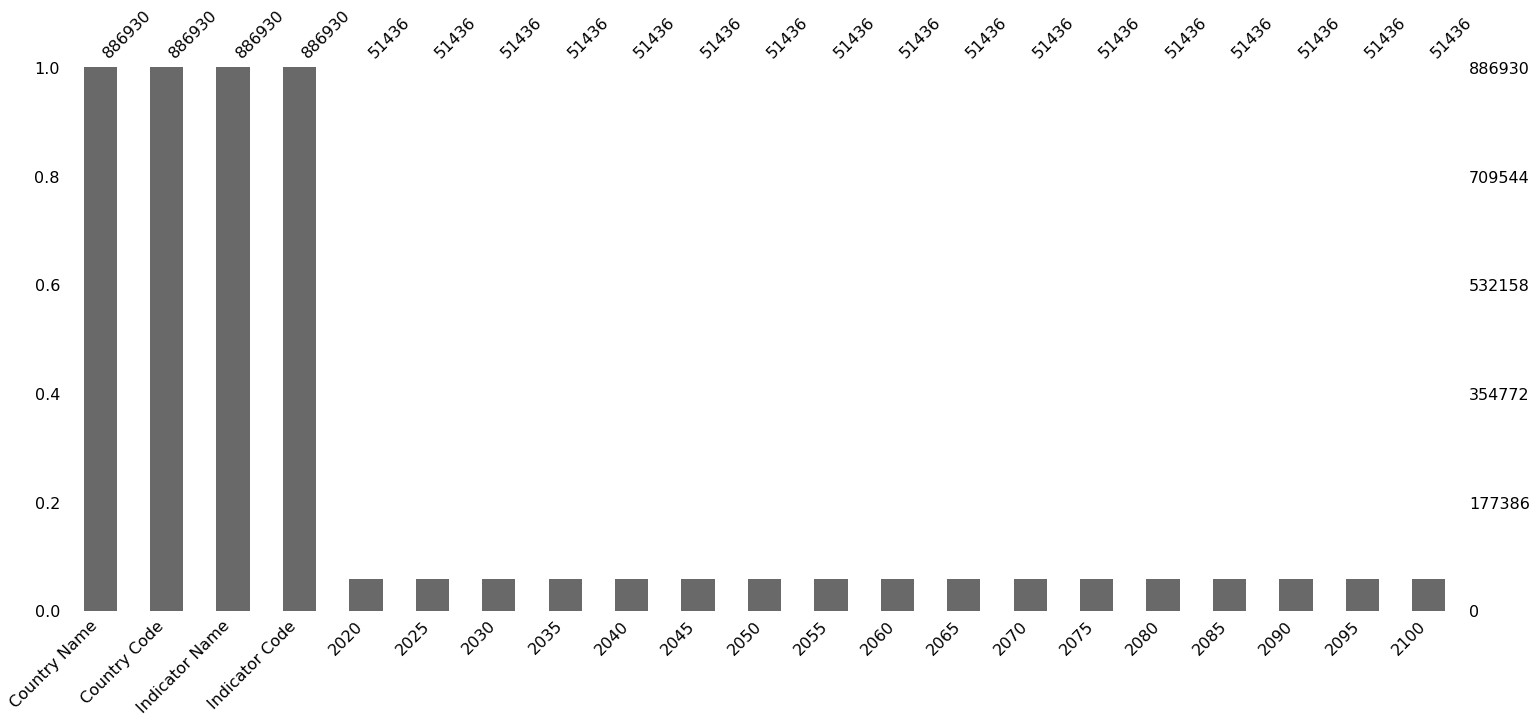

In [24]:
msno.bar(EDcopy[['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 
                '2020', '2025', '2030', '2035','2040', '2045', '2050', '2055',
                '2060', '2065', '2070', '2075', '2080', '2085', '2090', '2095', '2100']])

# # Suppression des variables moins remplies

#### La suppression s'est faite avec remplissage des taux de variables faibles et avec un intervalle de 5 ans 

 #### (1970, 1975, 1980, 1985, 1985, 1990 ,1995, 2000, 2005)

 #### Ensuite en 2010 où il y'a plus de valeurs renseignés puis 2015

#### De 2020 à 2100 sont des données futures et sont tous égaux, donc on garde 2020 et 2100

In [25]:
EDcopy.drop(columns=['1971', '1972', '1973', '1974', '1976', '1977', '1978',
                          '1979', '1981', '1982', '1983', '1984', '1986', '1987', '1988', '1989', '1991', 
                          '1992', '1993', '1994', '1996', '1997', '1998', '1999', '2001', '2002', '2003', '2004',
                          '2006', '2007', '2008', '2009', '2011', '2012', '2013', '2014', '2017','2016',
                      '2025', '2030', '2035', '2040', '2045', '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085',
                     '2090', '2095', 'Unnamed: 69'],inplace=True)

In [26]:
# Affichage d'un échantillon de 5 observations
EDcopy.sample(5)

Country Name Country Code  ... 2020 2100
602489            Netherlands          NLD  ...  NaN  NaN
784976   Syrian Arab Republic          SYR  ...  NaN  NaN
757150              St. Lucia          LCA  ...  NaN  NaN
672365                  Qatar          QAT  ...  NaN  NaN
694180  Sao Tome and Principe          STP  ...  NaN  NaN

[5 rows x 16 columns]

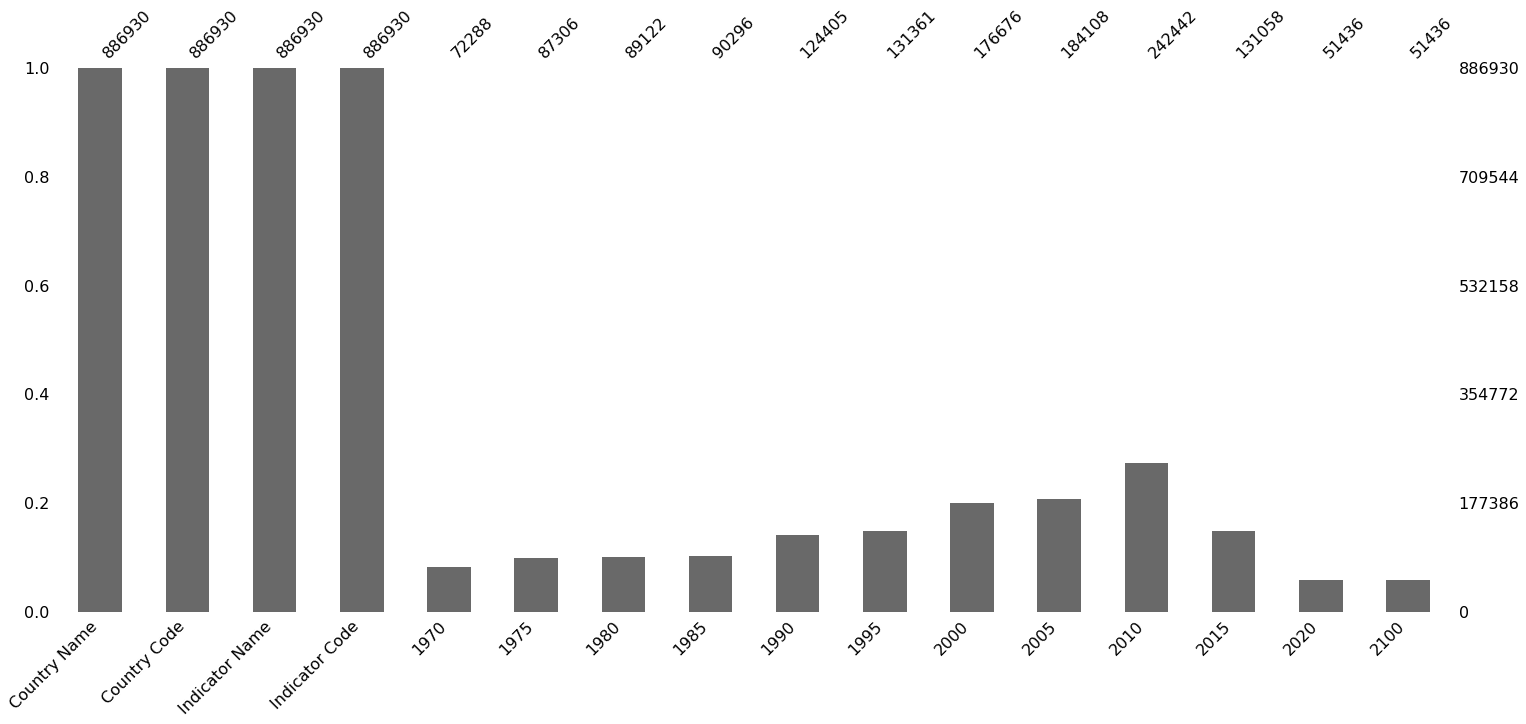

In [27]:
# Visualisation avec missigno après suppression de certaines colonnes
msno.bar(EDcopy)

In [28]:
count_countname = EDcopy["Country Name"].value_counts()
count_countname

Cuba                                           3665
East Asia & Pacific (excluding high income)    3665
Guatemala                                      3665
Iran, Islamic Rep.                             3665
Hungary                                        3665
                                               ... 
Uganda                                         3665
Curacao                                        3665
Russian Federation                             3665
Lesotho                                        3665
French Polynesia                               3665
Name: Country Name, Length: 242, dtype: int64

In [29]:
EDcopy["Country Name"].unique()

array(['Arab World', 'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)', 'European Union',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & North Africa (excluding high income)',
       'Middle income', 'North America', 'OECD members', 'South Asia',
       'Sub-Saharan Africa', 'Sub-Saharan Africa (excluding high income)',
       'Upper middle income', 'World', 'Afghanistan', 'Albania',
       'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain',


In [30]:
EDcopy["Country Name"].nunique()

242

In [31]:
# Observation avec les 5 premiers lignes du dataset
ESFcopy.head(5)

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [32]:
# Forme du jeu de données 
ESFcopy.shape

(643638, 5)

In [33]:
# Vérification des doublons
ESFcopy[ESFcopy.duplicated()]

Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643638 entries, 0 to 643637
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CountryCode  643638 non-null  object 
 1   SeriesCode   643638 non-null  object 
 2   Year         643638 non-null  object 
 3   DESCRIPTION  643638 non-null  object 
 4   Unnamed: 4   0 non-null       float64
dtypes: float64(1), object(4)
memory usage: 24.6+ MB

 Null values
              Total  Pourcentage
Unnamed: 4   643638        100.0
DESCRIPTION       0          0.0
Year              0          0.0
SeriesCode        0          0.0
CountryCode       0          0.0

 Visualizations des NaNs AxesSubplot(0.125,0.125;0.775x0.755)

 Statistiques descriptives
       Unnamed: 4
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN


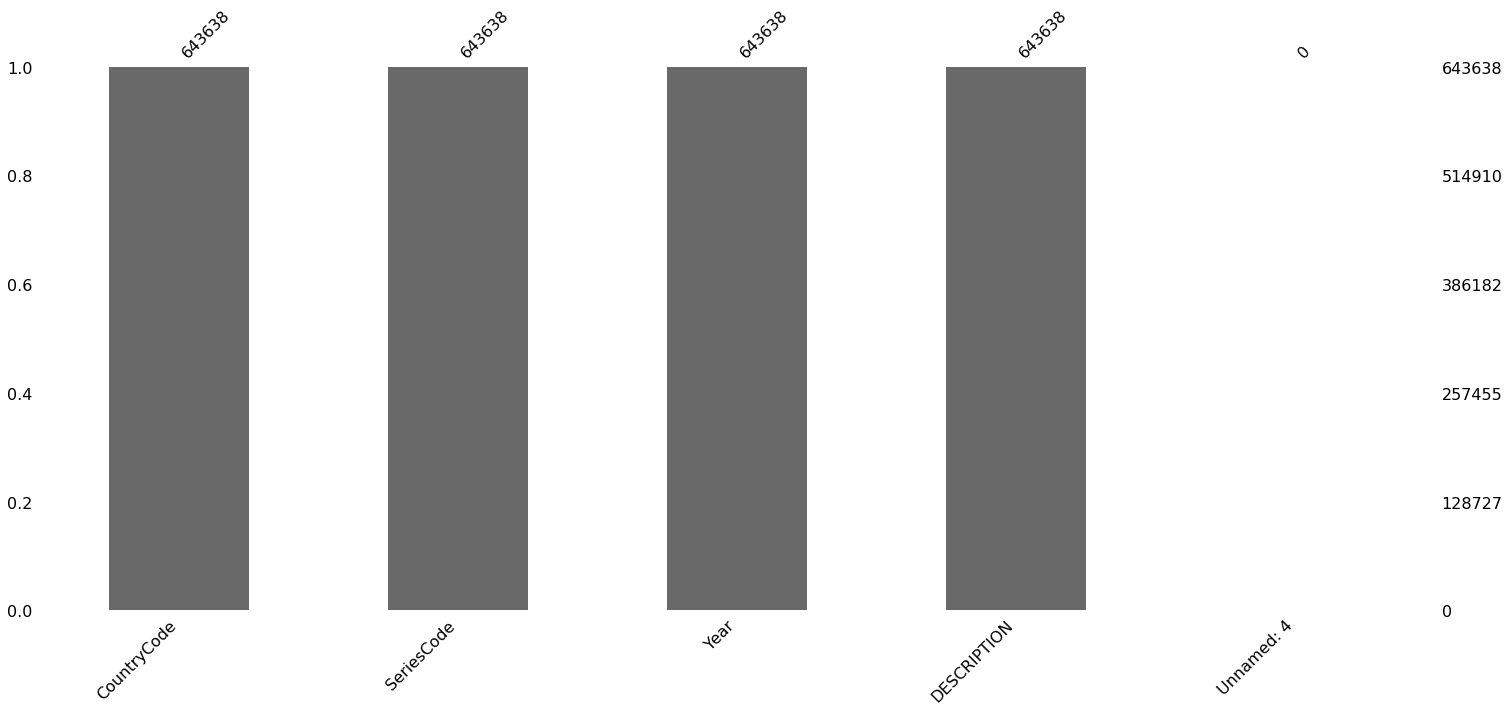

In [34]:
# Appel à la fonction 
data_quality_assment(ESFcopy)

In [35]:
# Observation de l'échantillon 
EScopy.head(5)

Series Code       Topic  ... License Type Unnamed: 20
0  BAR.NOED.1519.FE.ZS  Attainment  ...          NaN         NaN
1     BAR.NOED.1519.ZS  Attainment  ...          NaN         NaN
2  BAR.NOED.15UP.FE.ZS  Attainment  ...          NaN         NaN
3     BAR.NOED.15UP.ZS  Attainment  ...          NaN         NaN
4  BAR.NOED.2024.FE.ZS  Attainment  ...          NaN         NaN

[5 rows x 21 columns]

In [36]:
# Forme du jeu de données 
EScopy.shape

(3665, 21)

In [37]:
# Vérification des doublons 
EScopy[EScopy.duplicated()]

Empty DataFrame
Columns: [Series Code, Topic, Indicator Name, Short definition, Long definition, Unit of measure, Periodicity, Base Period, Other notes, Aggregation method, Limitations and exceptions, Notes from original source, General comments, Source, Statistical concept and methodology, Development relevance, Related source links, Other web links, Related indicators, License Type, Unnamed: 20]
Index: []

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3665 entries, 0 to 3664
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Series Code                          3665 non-null   object 
 1   Topic                                3665 non-null   object 
 2   Indicator Name                       3665 non-null   object 
 3   Short definition                     2156 non-null   object 
 4   Long definition                      3665 non-null   object 
 5   Unit of measure                      0 non-null      float64
 6   Periodicity                          99 non-null     object 
 7   Base Period                          314 non-null    object 
 8   Other notes                          552 non-null    object 
 9   Aggregation method                   47 non-null     object 
 10  Limitations and exceptions           14 non-null     object 
 11  Notes from original source    

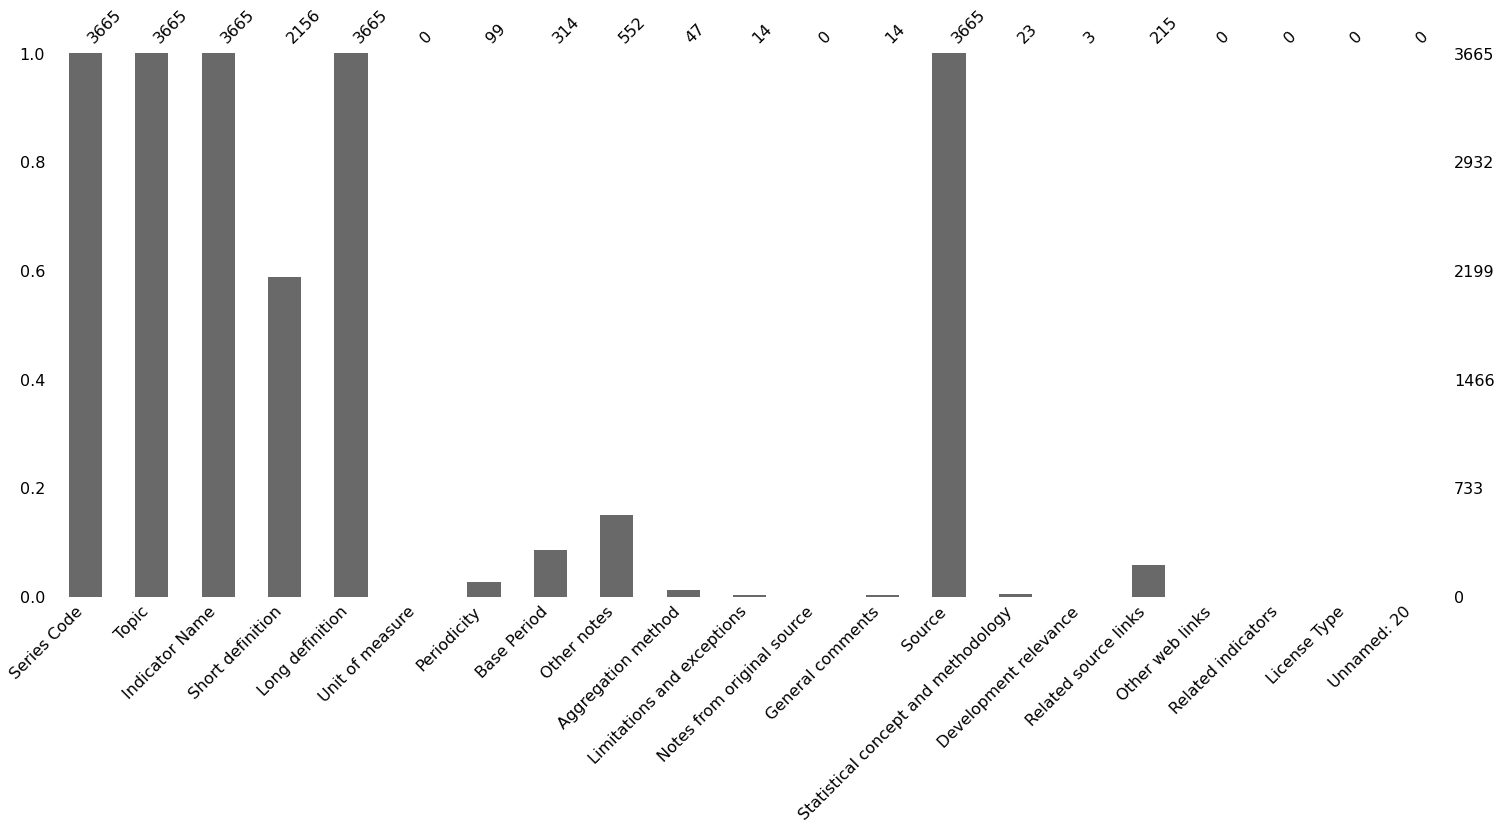

In [38]:
# Appel à la fonction 
data_quality_assment(EScopy)

In [39]:
# Verifier le contenu des colonnes contenant des nulls values, pour voir s'il ya une possibilité de remplacer les nulls values.
EScopy['Periodicity'].unique()

array([nan, 'Annual'], dtype=object)

In [40]:
EScopy['Base Period'].unique()

array([nan, '2010', '2011', 'Projections (2010 to 2100)', '14'],
      dtype=object)

# # Suppression des variables moins remplis et semblent non pertinent

In [41]:
# Aprés visualisation, je vois que je peux supprimer des colonnes avec des valeurs nulles à 100%
EScopy.drop(columns=["Unit of measure","Periodicity","Other notes","Base Period","Notes from original source","Other web links","Source",
                            "Aggregation method", "Limitations and exceptions", "General comments", "Development relevance", "Related source links",
                            "Related indicators", "License Type","Statistical concept and methodology","Short definition", "Unnamed: 20"], inplace=True)

In [42]:
# Observation de l'échantillon aprés suppression de quelques colonnes
EScopy.head(5)

Series Code  ...                                    Long definition
0  BAR.NOED.1519.FE.ZS  ...  Percentage of female population age 15-19 with...
1     BAR.NOED.1519.ZS  ...  Percentage of population age 15-19 with no edu...
2  BAR.NOED.15UP.FE.ZS  ...  Percentage of female population age 15+ with n...
3     BAR.NOED.15UP.ZS  ...  Percentage of population age 15+ with no educa...
4  BAR.NOED.2024.FE.ZS  ...  Percentage of female population age 20-24 with...

[5 rows x 4 columns]

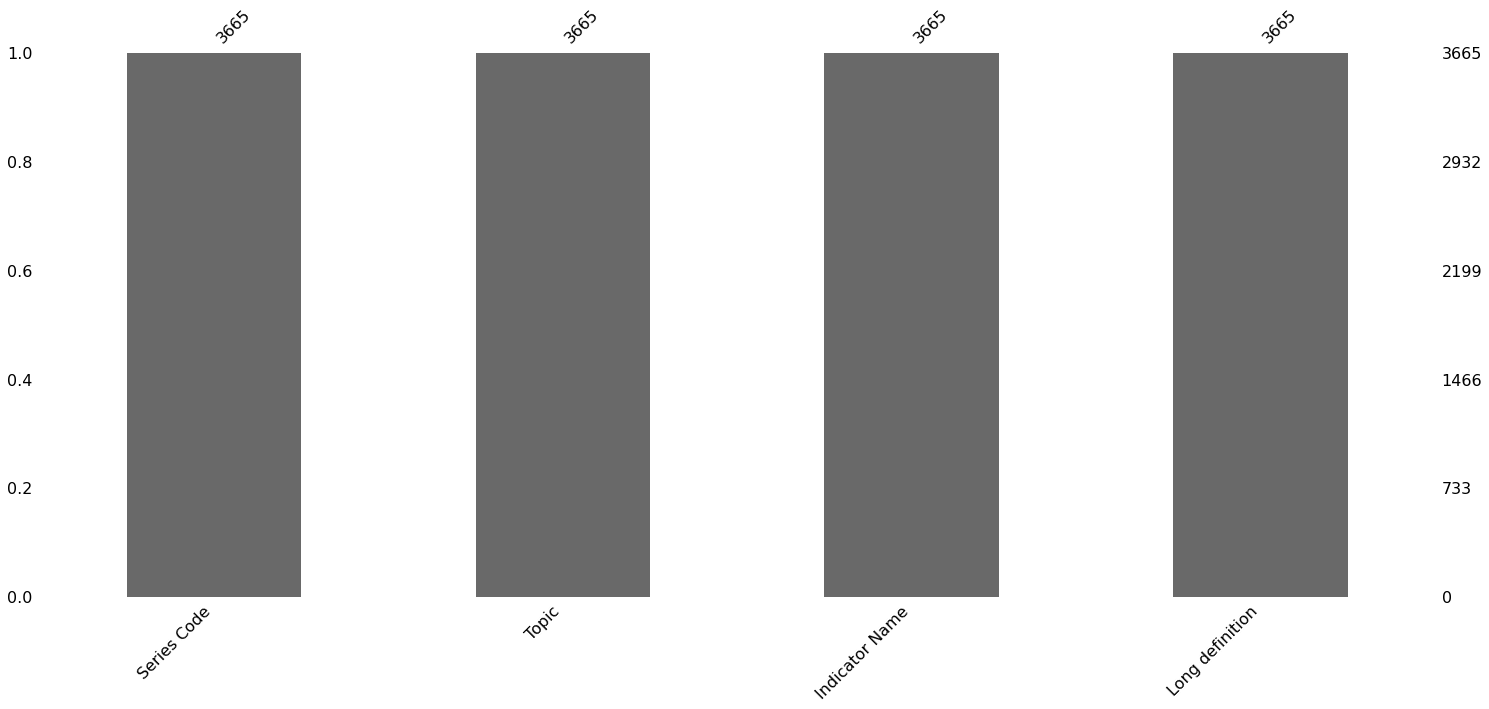

In [43]:
# Visualisation avec missigno 
msno.bar(EScopy)

In [44]:
count_indicatname = EScopy["Indicator Name"].value_counts().sort_values(ascending=False)
count_indicatname

All staff compensation as % of total expenditure in primary public institutions (%)                                                             1
Barro-Lee: Average years of tertiary schooling, age 70-74, total                                                                                1
UIS: Total net attendance rate, lower secondary, fourth quintile, male (%)                                                                      1
Projection: Percentage of the population age 60+ by highest level of educational attainment. Upper Secondary. Male                              1
Age population, age 19, female, UNESCO                                                                                                          1
                                                                                                                                               ..
SABER: (Tertiary Education) Policy Goal 6 Lever 3: Fostering Social and Cultural Development and Environmental Protection an

# # Récupération des datasets ciblés

### ECcopy et EDcopy

In [45]:
# Affichage des 5 premiers lignes 
ECcopy.head(5)

Country Code                     Region
0          ABW  Latin America & Caribbean
1          AFG                 South Asia
2          AGO         Sub-Saharan Africa
3          ALB      Europe & Central Asia
4          AND      Europe & Central Asia

In [46]:
# Affichage des 5 premiers lignes 
EDcopy.head(5)

Country Name Country Code  ... 2020 2100
0   Arab World          ARB  ...  NaN  NaN
1   Arab World          ARB  ...  NaN  NaN
2   Arab World          ARB  ...  NaN  NaN
3   Arab World          ARB  ...  NaN  NaN
4   Arab World          ARB  ...  NaN  NaN

[5 rows x 16 columns]

In [47]:
# Appel de la fonction merge 
ECDcopy= pd.merge(ECcopy, EDcopy, left_on= "Country Code", right_on = "Country Code")
ECDcopy.head(5)

Country Code                     Region Country Name  ... 2015 2020  2100
0          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
1          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
2          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
3          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
4          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN

[5 rows x 17 columns]

In [48]:
ECDcopy.shape

(883265, 17)

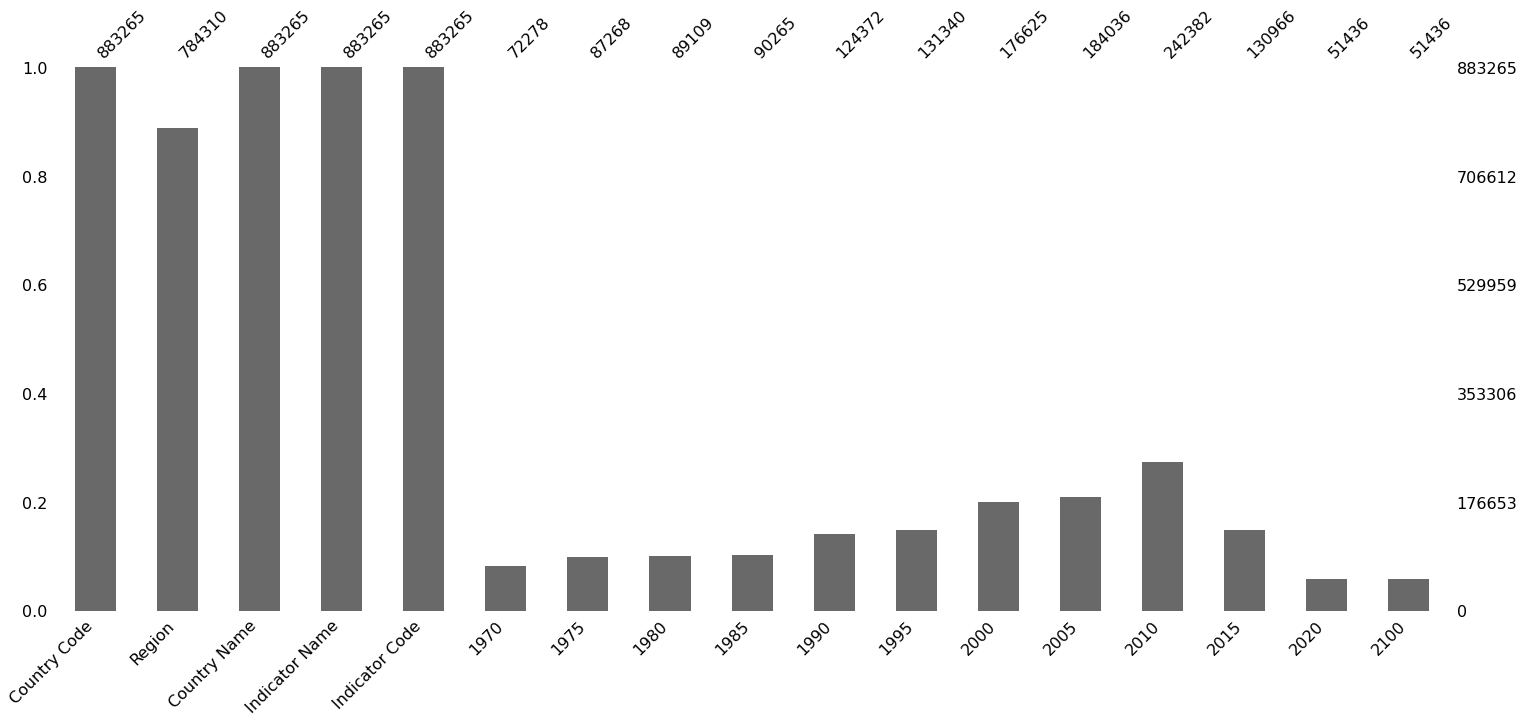

In [49]:
# Visualisation du dataset 
msno.bar(ECDcopy)

# Choix des indicateurs

#### Le choix des indicateurs est porté en 3 classes: sur l'éducation(secondaire et tertiaire), l'économie(revenu) et l'internet

In [50]:
# on choisit 8 indicateurs 
# Le nonmbre d'ordinateur personnel pour 100 personnes
DataCountry_comp=ECDcopy[ECDcopy['Indicator Name']=='Personal computers (per 100 people)']

# Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
DataCountry_pop=ECDcopy[ECDcopy['Indicator Name']=='Wittgenstein Projection: Population age 15-19 in thousands by highest level of educational attainment. Upper Secondary. Total']

#  années moyennes de scolarisation. 20-24 ans total
DataCountry_mean=ECDcopy[ECDcopy['Indicator Name']=='Wittgenstein Projection: Mean years of schooling. Age 20-24. Total']

# Nombre d'internautes pour 100 personnes
DataCountry_int=ECDcopy[ECDcopy['Indicator Name']=='Internet users (per 100 people)']

# Dépenses publiques pour l'enseignement secondaire
DataCountry_dep_sec_pib=ECDcopy[ECDcopy['Indicator Name']=='Government expenditure on secondary education as % of GDP (%)']

# Dépenses publiques pour l'enseignement supérieur
DataCountry_dep_sup_pib=ECDcopy[ECDcopy['Indicator Name']=='Government expenditure on tertiary education as % of GDP (%)']

# Dépenses pour le deuxième cycle du secondaire par des dépenses publiques totales
DataCountry_dep_sec_gouv=ECDcopy[ECDcopy['Indicator Name']=='Expenditure on upper secondary as % of total government expenditure (%)']

# Dépenses tertiaires par rapport des dépenses publiques totales 
DataCountry_dep_sup_gouv=ECDcopy[ECDcopy['Indicator Name']=='Expenditure on tertiary as % of total government expenditure (%)']


### Affichage des indicateurs

In [51]:
DataCountry_comp.head(2)

Country Code                     Region Country Name  ... 2015 2020  2100
2084          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
5749          AFG                 South Asia  Afghanistan  ...  NaN  NaN   NaN

[2 rows x 17 columns]

In [197]:
# Region represented 
ECDcopy.Region.value_counts(dropna=False).head(20)

Europe & Central Asia         208905
Sub-Saharan Africa            175920
Latin America & Caribbean     150265
East Asia & Pacific           131940
NaN                            98955
Middle East & North Africa     76965
South Asia                     29320
North America                  10995
Name: Region, dtype: int64

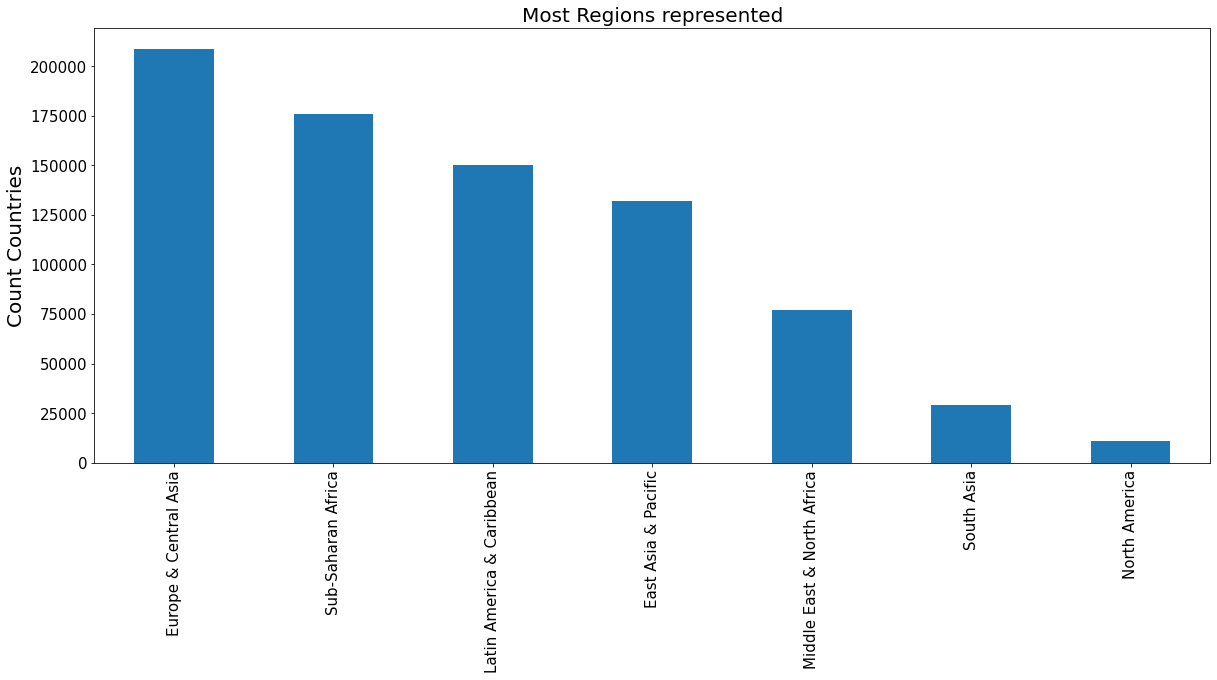

In [198]:
plt.figure(figsize=(20,8))
ECDcopy.Region.value_counts().head(20).plot(kind='bar', fontsize=15)
plt.title('Most Regions represented', fontsize=20)
plt.ylabel('Count Countries', fontsize=20)
plt.show()

In [199]:
# Countries represented
ECDcopy['Country Name'].value_counts(dropna=False).head(20)

Cuba                         3665
Belize                       3665
Iran, Islamic Rep.           3665
Hungary                      3665
Colombia                     3665
Burundi                      3665
Australia                    3665
Aruba                        3665
Spain                        3665
Peru                         3665
East Asia & Pacific          3665
Azerbaijan                   3665
Euro area                    3665
United Kingdom               3665
Haiti                        3665
Bhutan                       3665
Algeria                      3665
Macedonia, FYR               3665
Sint Maarten (Dutch part)    3665
Macao SAR, China             3665
Name: Country Name, dtype: int64

In [200]:
#Indicator Code 
# Region represented 
ECDcopy['Indicator Code'].value_counts(dropna=False).head(20)

LO.EGRA.READ.SNG.ADV.2GRD    241
LO.PASEC.REA.2.PP.GAP        241
LO.EGRA.ORF.SID.2GRD         241
SABER.EMIS.GOAL1.LVL1        241
UIS.AFR.SCHBSP.1.PU.WELEC    241
UIS.FOSGP.56.F300.M          241
UIS.NIR.1.AGM1.F             241
UIS.REPP.2.GPV.G2            241
BAR.TER.CMPT.5054.ZS         241
PRJ.ATT.25UP.4.MA            241
LO.PASEC.MAT.6.L2            241
UIS.DR.1.G3.M                241
BAR.TER.ICMP.2529.ZS         241
HH.DHS.TR.12.Q3              241
LO.LLECE.MAT6.P90            241
UIS.XPUBP.UK                 241
LO.LLECE.REA6.1.MA           241
SABER.PRVT.GOAL1.LVL6        241
LO.EGRA.NCWPM.KIS.2GRD       241
LO.TIMSS.MAT8.MA             241
Name: Indicator Code, dtype: int64

In [201]:
#Indicator Code 
# Region represented 
ECDcopy['Indicator Name'].value_counts(dropna=False).head(20)

TIMSS: Distribution of 4th Grade Science Scores: 90th Percentile Score                                                      241
EGRA: Correct Non-Words Read Per Minute (Mean). Somaligna. 2nd Grade                                                        241
Gross enrolment ratio, upper secondary, gender parity index (GPI)                                                           241
Early school leavers from primary education, female (number)                                                                241
TIMSS: Distribution of 4th Grade Science Scores: 25th Percentile Score                                                      241
Percentage of female students in upper secondary education enrolled in vocational programmes, female (%)                    241
Barro-Lee: Average years of secondary schooling, age 35-39, female                                                          241
Population, ages 6-12, female                                                                           

In [52]:
#df_mms= pd.DataFrame(mms.fit_transform(df1), columns = df1.columns)
#df_mms

In [53]:
DataCountry_pop.head(2)

Country Code                     Region Country Name  ...  2015  2020  2100
3602          ABW  Latin America & Caribbean        Aruba  ...  1.48  1.38  1.76
7267          AFG                 South Asia  Afghanistan  ...   NaN   NaN   NaN

[2 rows x 17 columns]

In [54]:
DataCountry_mean.head(2)

Country Code                     Region Country Name  ... 2015 2020  2100
3361          ABW  Latin America & Caribbean        Aruba  ...  9.3  9.5  11.0
7026          AFG                 South Asia  Afghanistan  ...  NaN  NaN   NaN

[2 rows x 17 columns]

In [55]:
DataCountry_int.head(2)

Country Code                     Region  ... 2020 2100
1375          ABW  Latin America & Caribbean  ...  NaN  NaN
5040          AFG                 South Asia  ...  NaN  NaN

[2 rows x 17 columns]

In [56]:
DataCountry_dep_sec_pib.head(2)

Country Code                     Region Country Name  ... 2015 2020  2100
1265          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
4930          AFG                 South Asia  Afghanistan  ...  NaN  NaN   NaN

[2 rows x 17 columns]

In [57]:
DataCountry_dep_sup_pib.head(2)

Country Code                     Region Country Name  ... 2015 2020  2100
1266          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
4931          AFG                 South Asia  Afghanistan  ...  NaN  NaN   NaN

[2 rows x 17 columns]

In [58]:
DataCountry_dep_sec_gouv.head(2)

Country Code                     Region Country Name  ... 2015 2020  2100
1241          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
4906          AFG                 South Asia  Afghanistan  ...  NaN  NaN   NaN

[2 rows x 17 columns]

In [59]:
DataCountry_dep_sup_gouv.head(2)

Country Code                     Region Country Name  ... 2015 2020  2100
1239          ABW  Latin America & Caribbean        Aruba  ...  NaN  NaN   NaN
4904          AFG                 South Asia  Afghanistan  ...  NaN  NaN   NaN

[2 rows x 17 columns]

### Visualisation du taux de remplissage des indicateurs

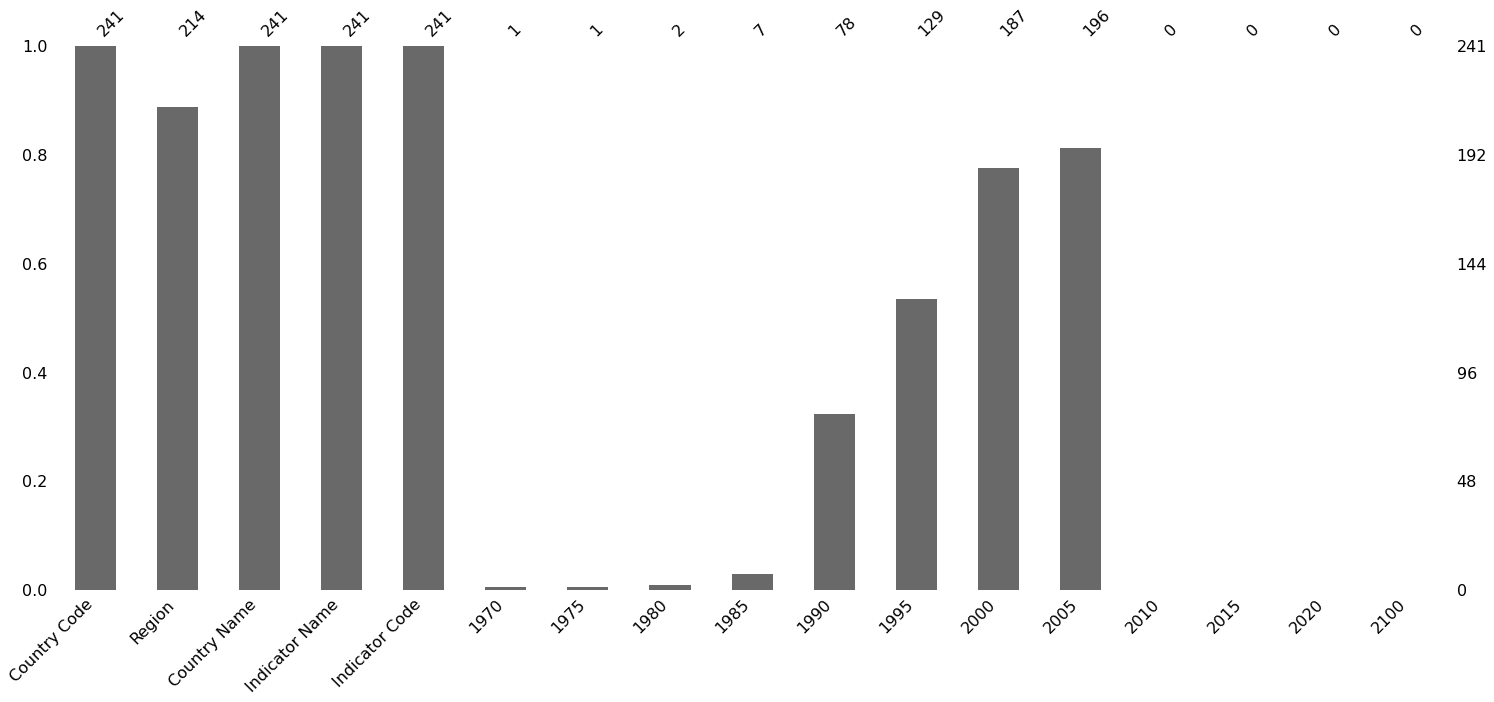

In [60]:
# Le nonmbre d'ordinateur personnel pour 100 personnes
msno.bar(DataCountry_comp)

#### On voit qu'on peut garder les années passées de 1990 à 2005 et pas de données futures

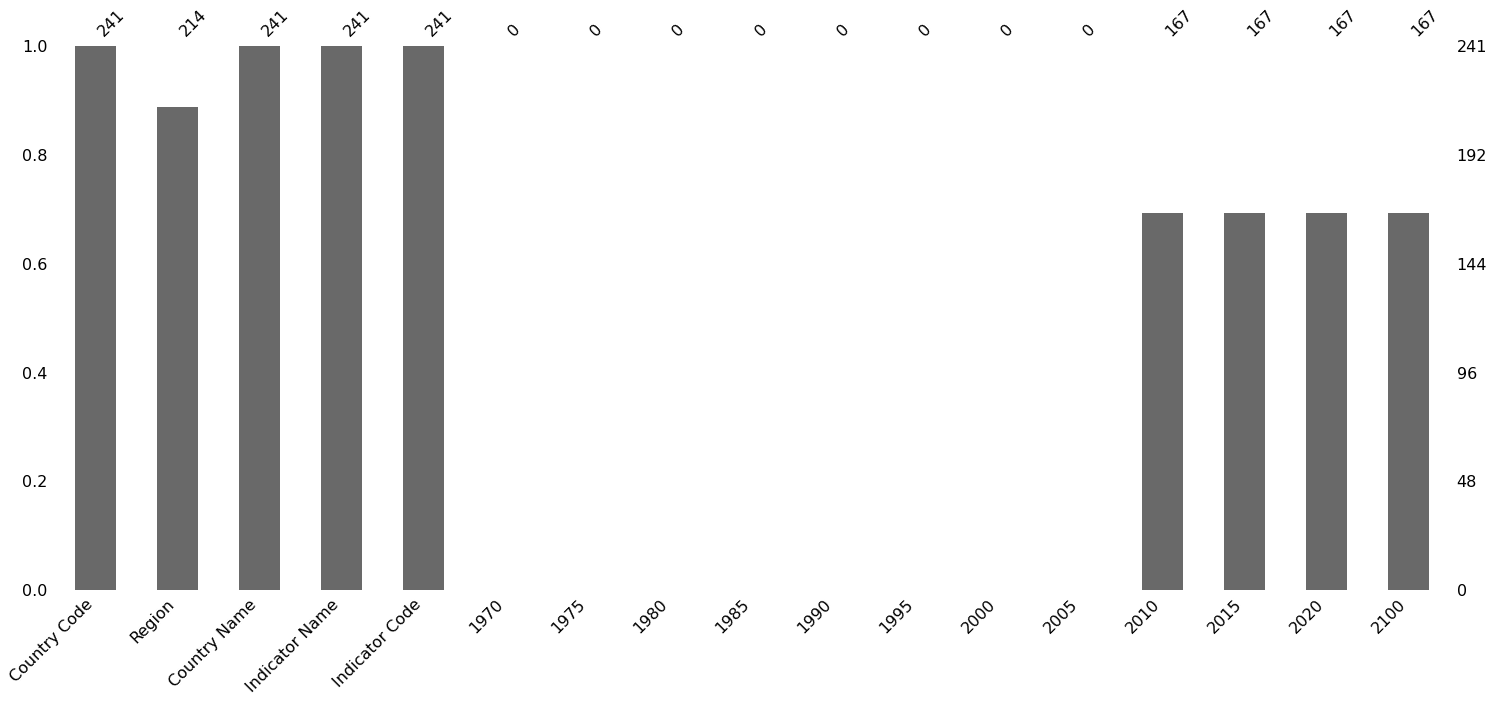

In [61]:
# Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
msno.bar(DataCountry_pop)

####  On voit qu'on peut garder les années passées 2010 et 2015 et pour le futur 2020 et 2100

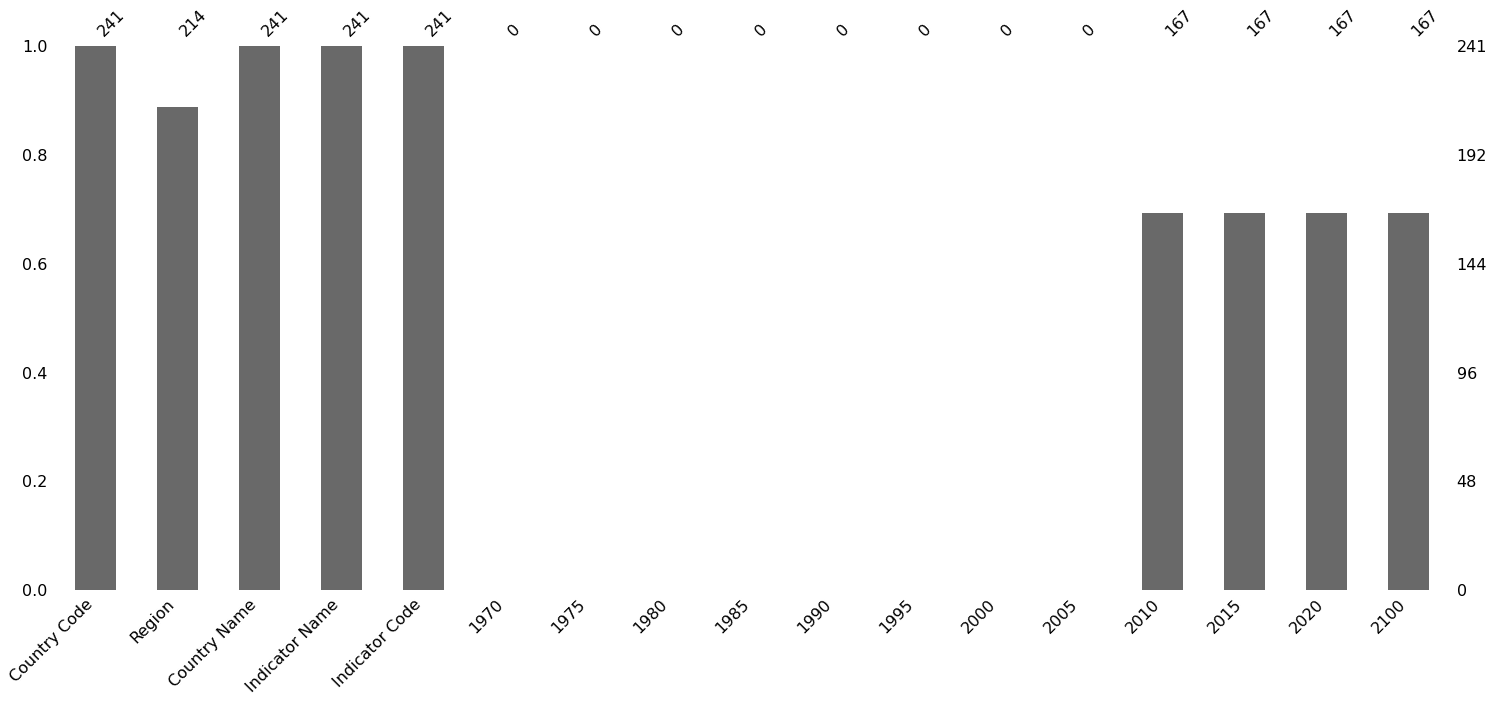

In [62]:
# années moyennes de scolarisation. 20-24 ans total
msno.bar(DataCountry_mean)

#### On voit qu'on peut garder les années passées de  2010 à 2015 et pour le futur 2020 à 2100

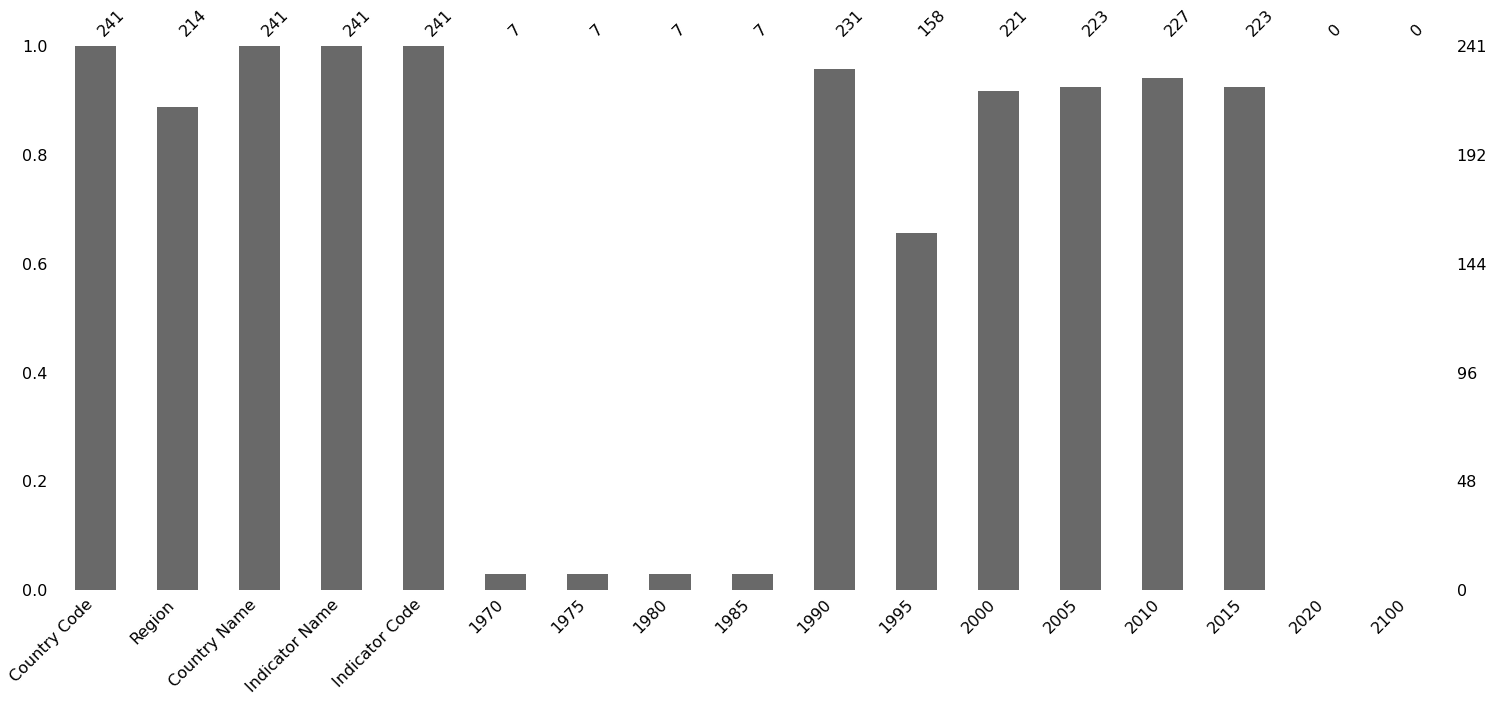

In [63]:
# Nombre d'internautes pour 100 personnes
msno.bar(DataCountry_int)

#### On voit qu'on peut garder les années passées de 1990 à 2015 et absence de données futures

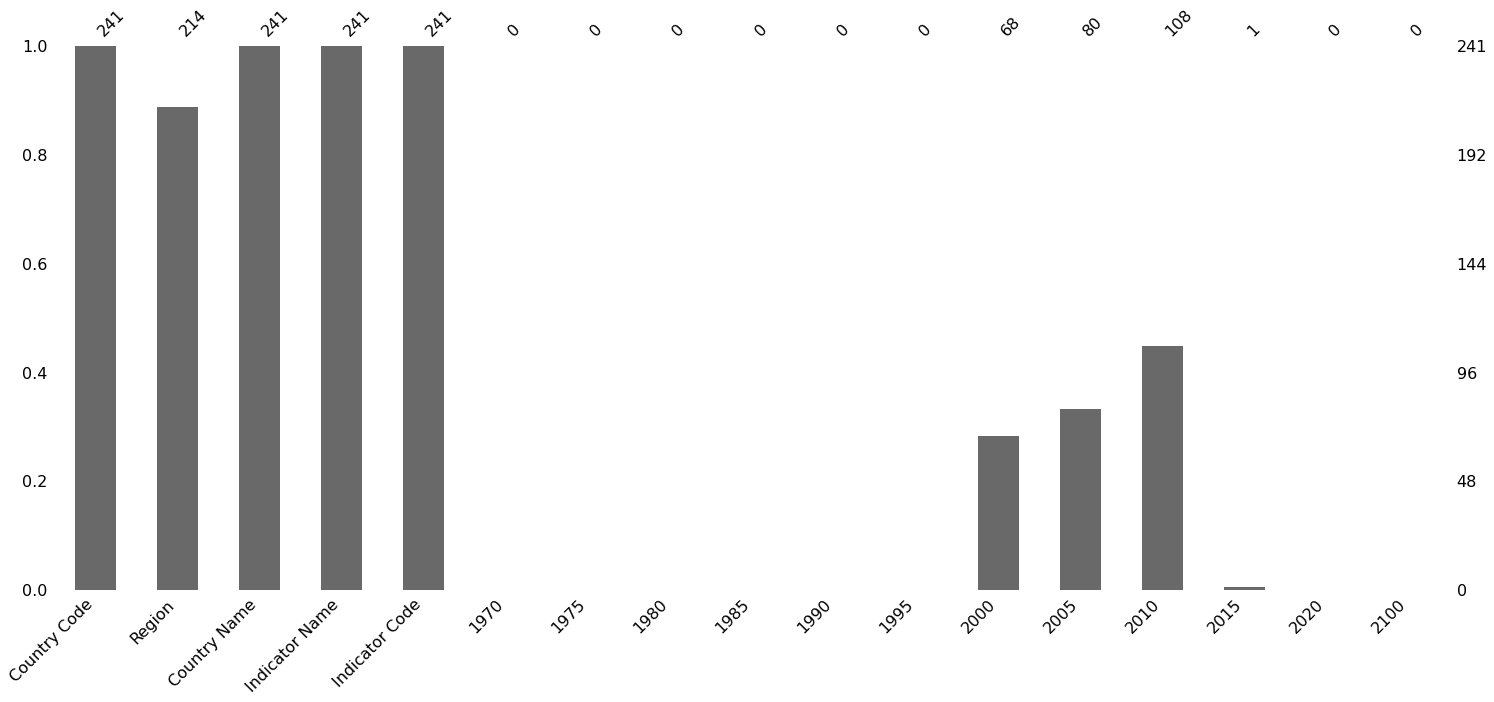

In [64]:
# Dépenses publiques pour l'enseignement secondaire
msno.bar(DataCountry_dep_sec_pib)

#### On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

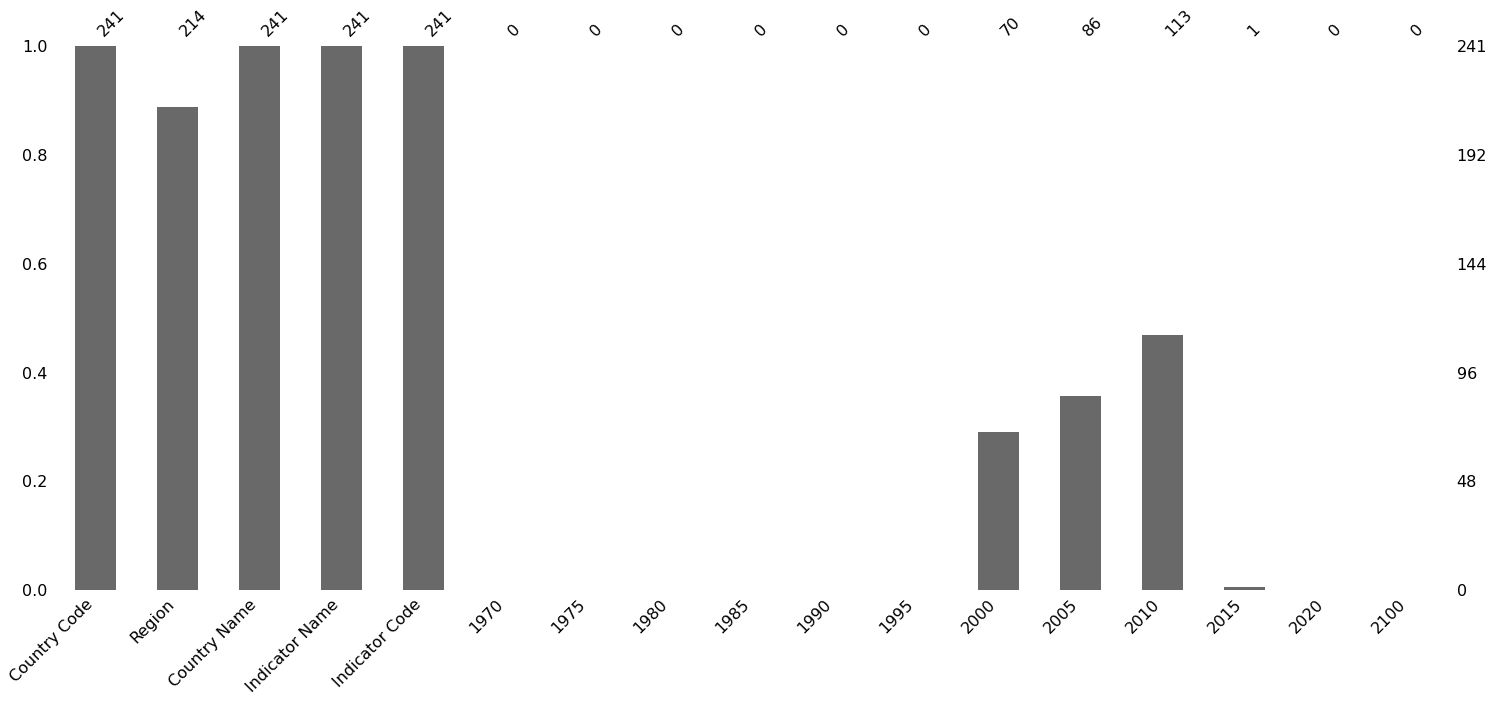

In [65]:
# Dépenses publiques pour l'enseignement supérieur
msno.bar(DataCountry_dep_sup_pib)

####  On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

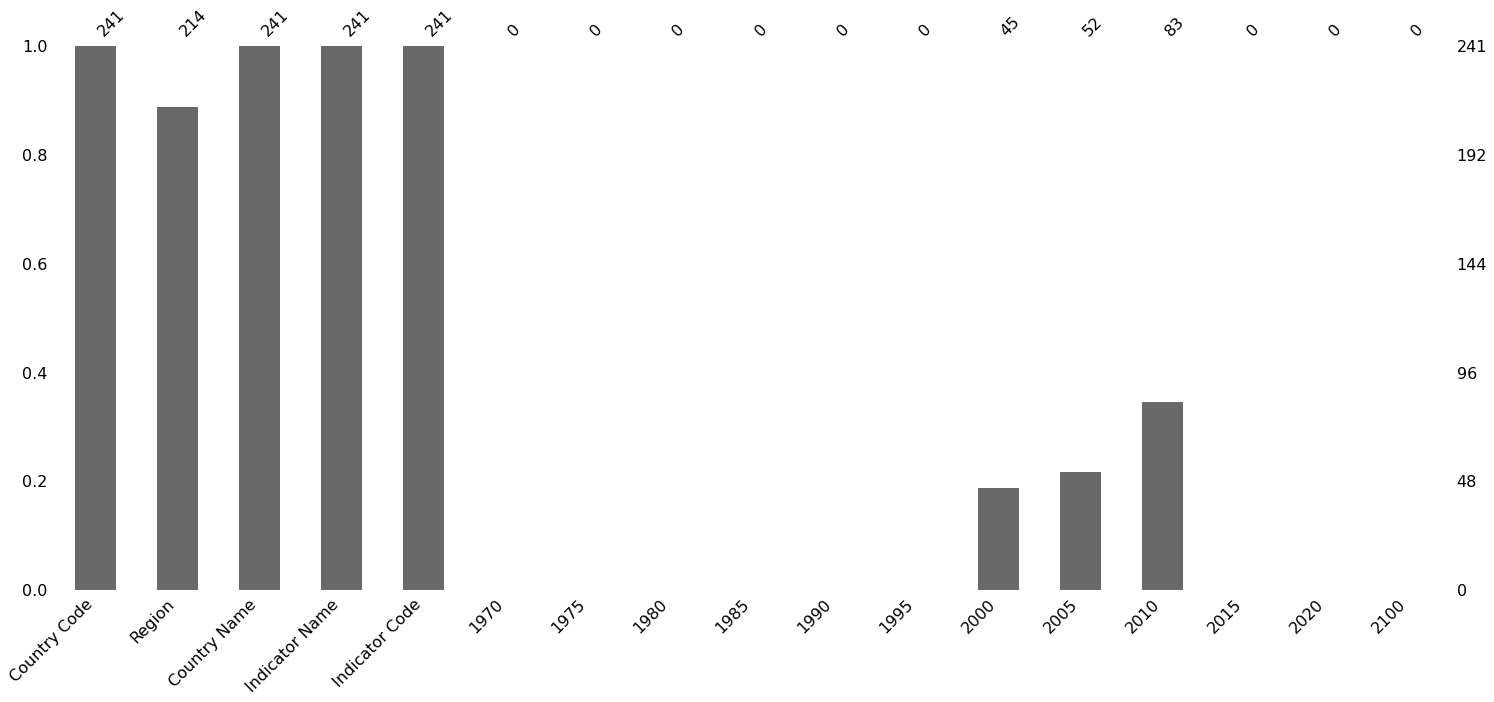

In [66]:
# Dépenses pour le deuxième cycle du secondaire par rapport des dépenses publiques totales
msno.bar(DataCountry_dep_sec_gouv)

####  On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

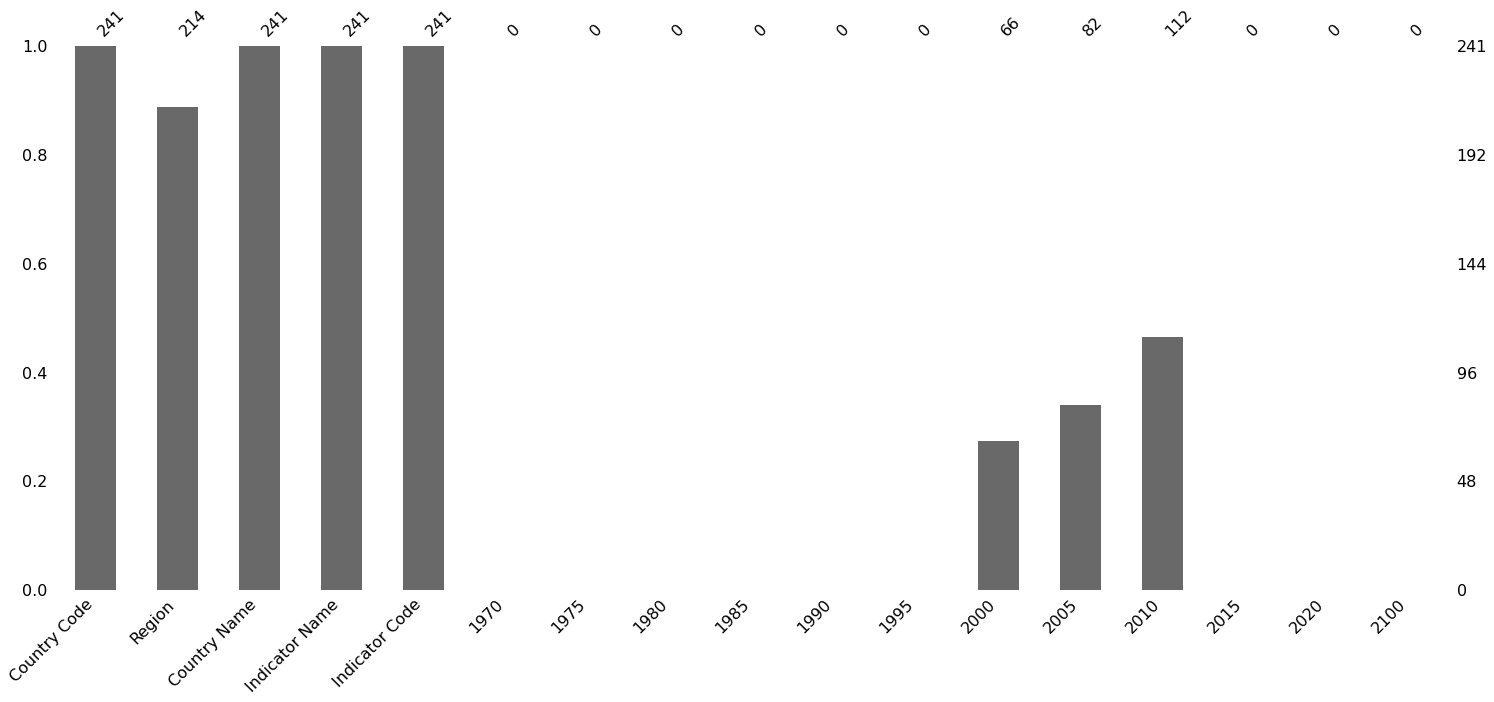

In [67]:
# Dépenses tertiaires par rapport des dépenses publiques totales 
msno.bar(DataCountry_dep_sup_gouv)

####  On voit qu'on peut garder les années passées de 2000 à 2010 et absence de données futures

###  Suppressions des années vides et moins rempli pour chaque indicateurs du passé et futures

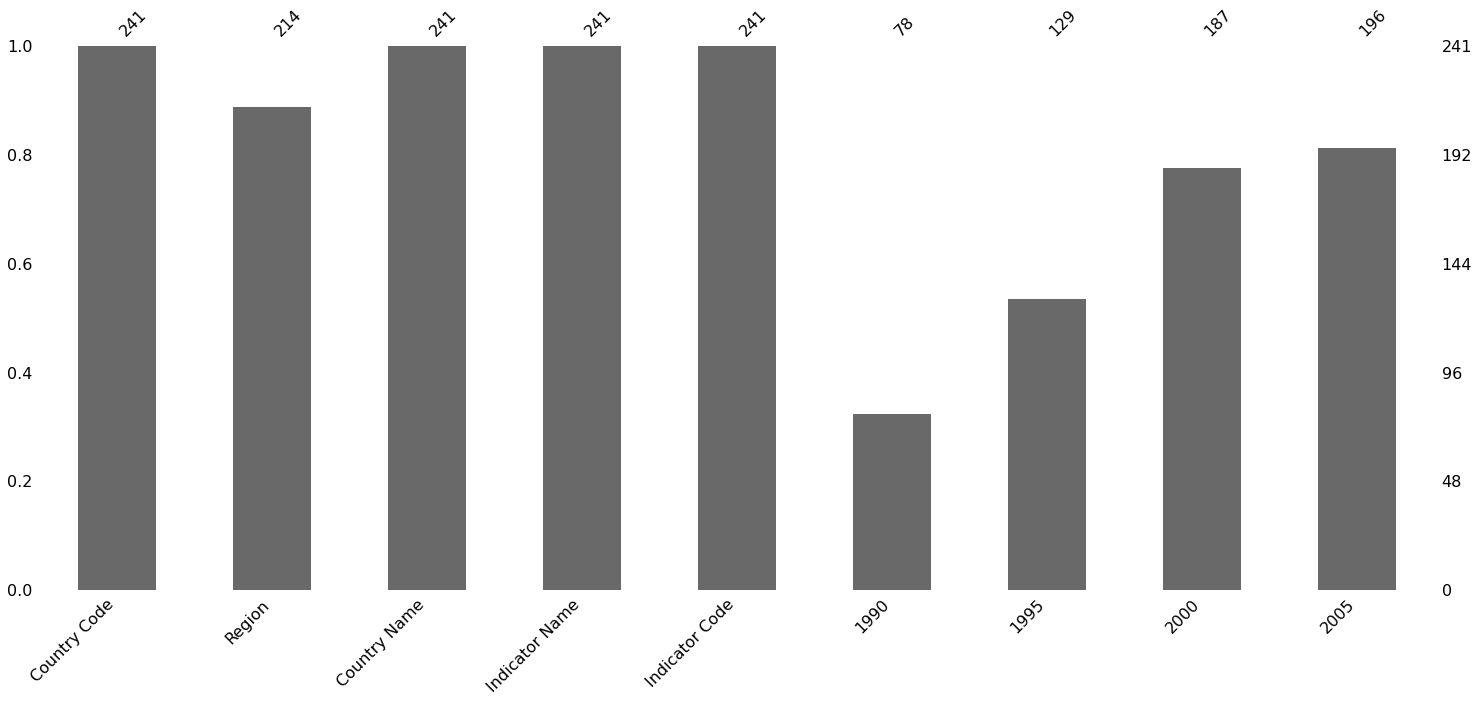

In [68]:
# Le nonmbre d'ordinateur personnel pour 100 personnes
DataCountry_comp.drop(columns=['1970','1975','1980','1985','2010','2015','2020', '2100'], inplace=True)
msno.bar(DataCountry_comp)

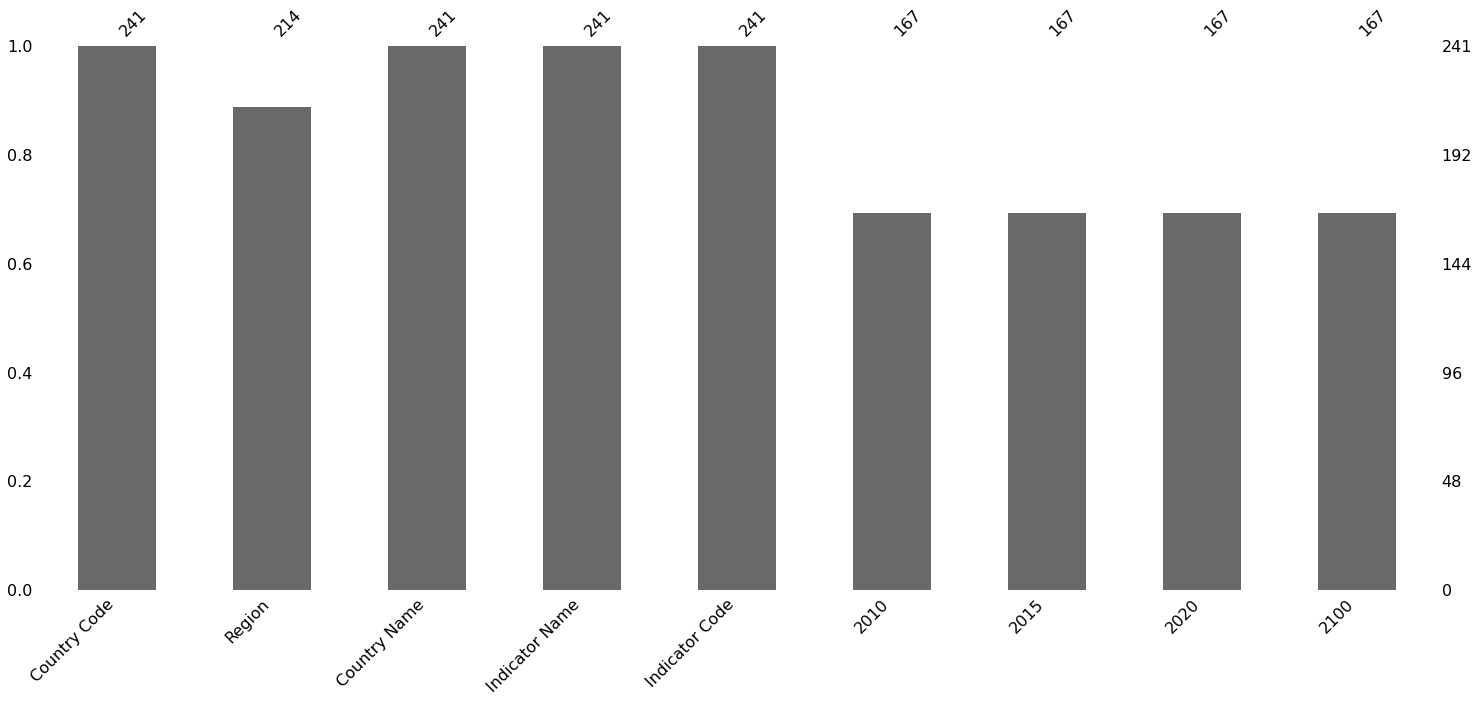

In [69]:
#Population âgée de 15 à 19 ans en milliers selon le plus haut niveau d'éducation atteint Secondaire supérieur total
DataCountry_pop.drop(columns=['1970','1975','1980','1985','1990', '1995','2000','2005'], inplace=True)
msno.bar(DataCountry_pop)

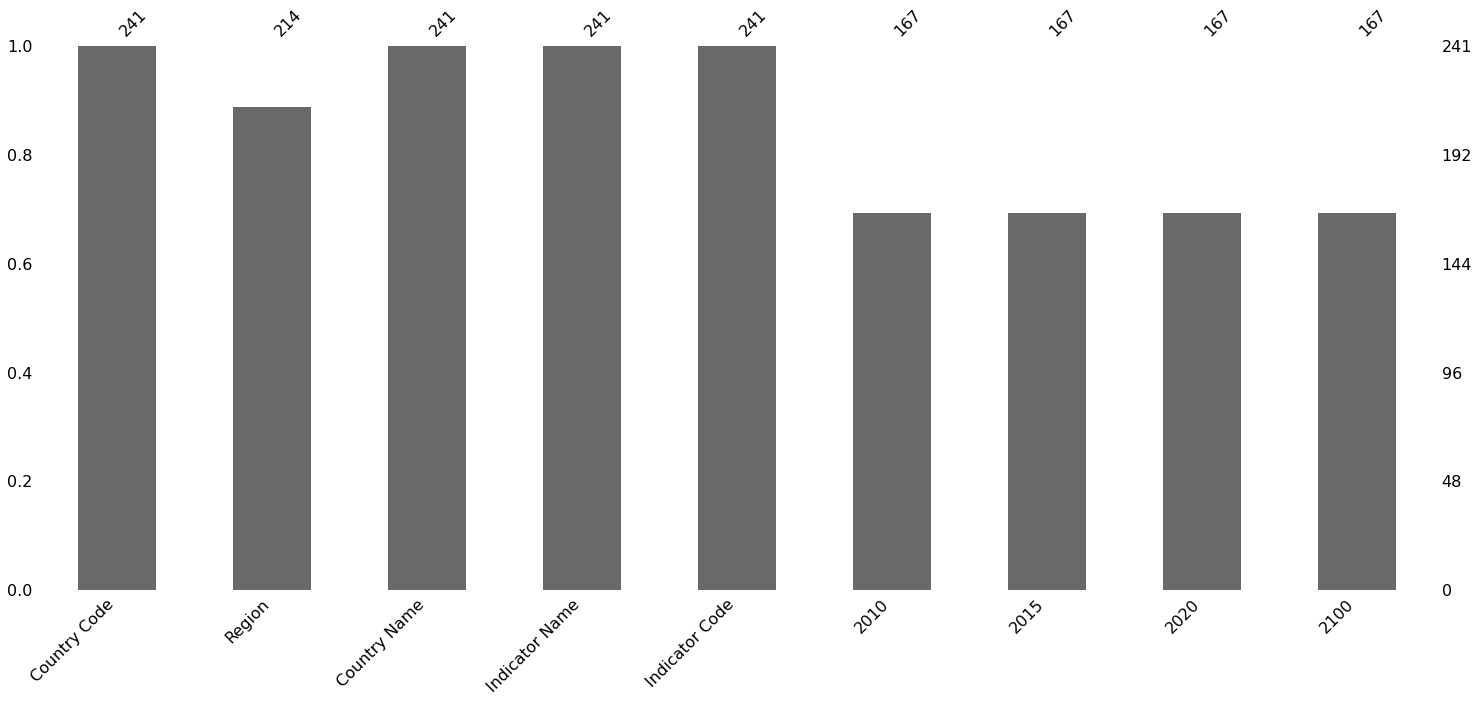

In [70]:
# années moyennes de scolarisation. 20-24 ans total
DataCountry_mean.drop(columns=['1970','1975','1980','1985','1990', '1995','2000','2005'], inplace=True)
msno.bar(DataCountry_mean)

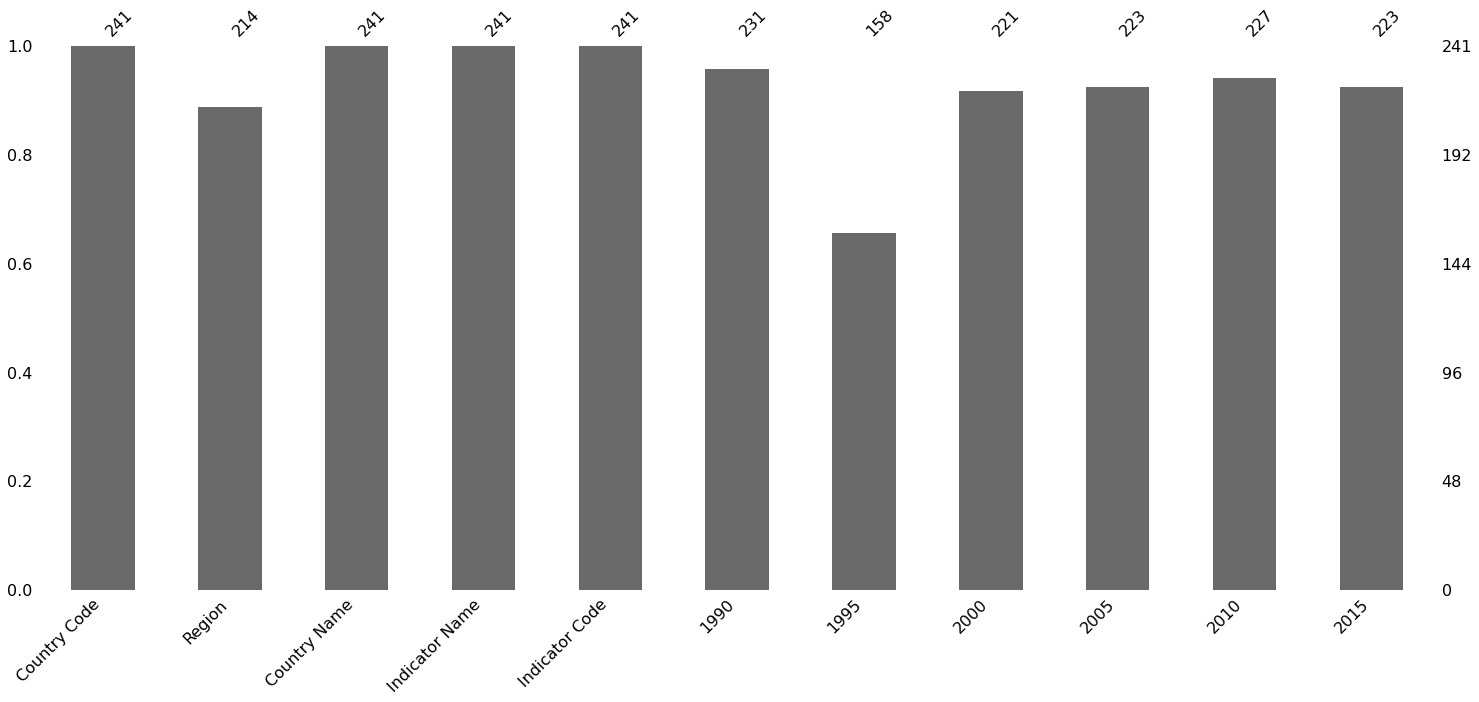

In [71]:
# Nombre d'internautes pour 100 personnes
DataCountry_int.drop(columns=['1970','1975','1980','1985','2020','2100'], inplace= True)
msno.bar(DataCountry_int)

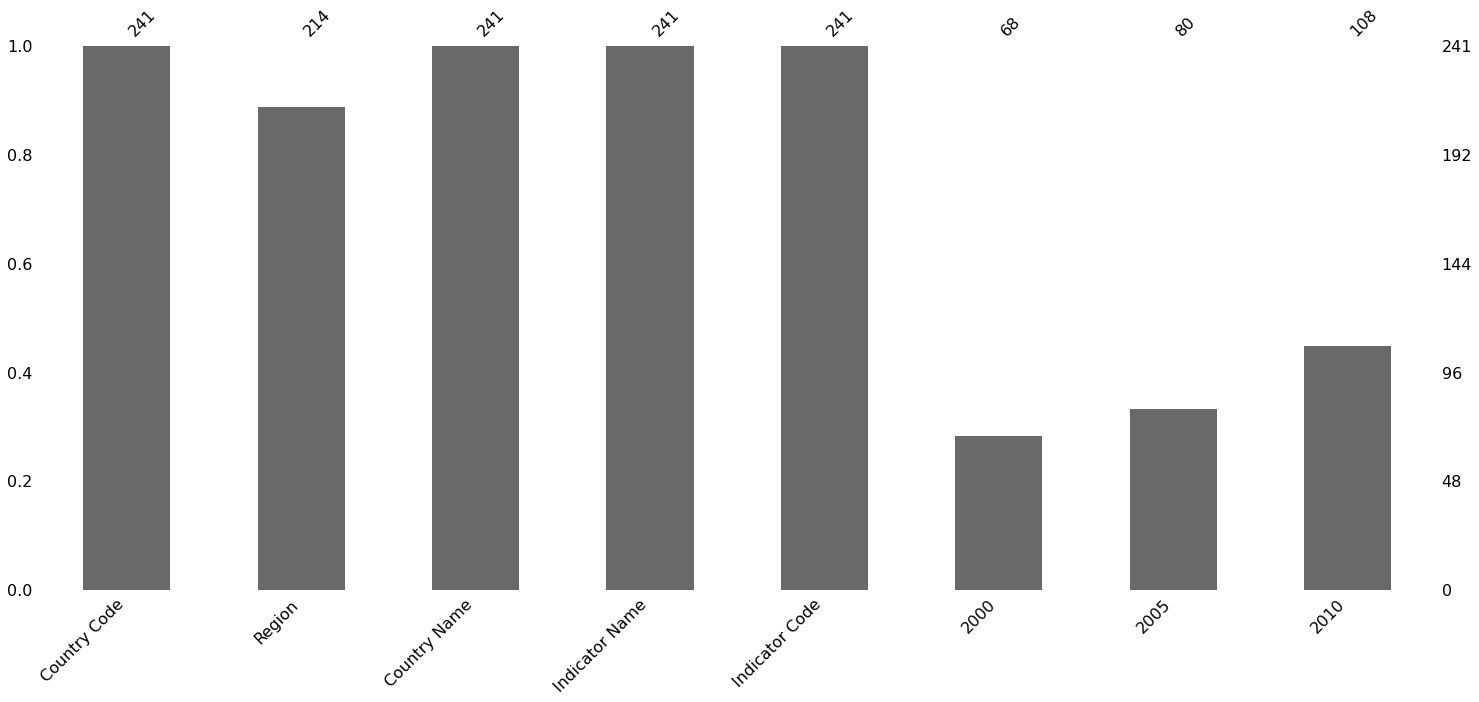

In [72]:
# Dépenses publiques pour l'enseignement secondaire
DataCountry_dep_sec_pib.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace= True)
msno.bar(DataCountry_dep_sec_pib)

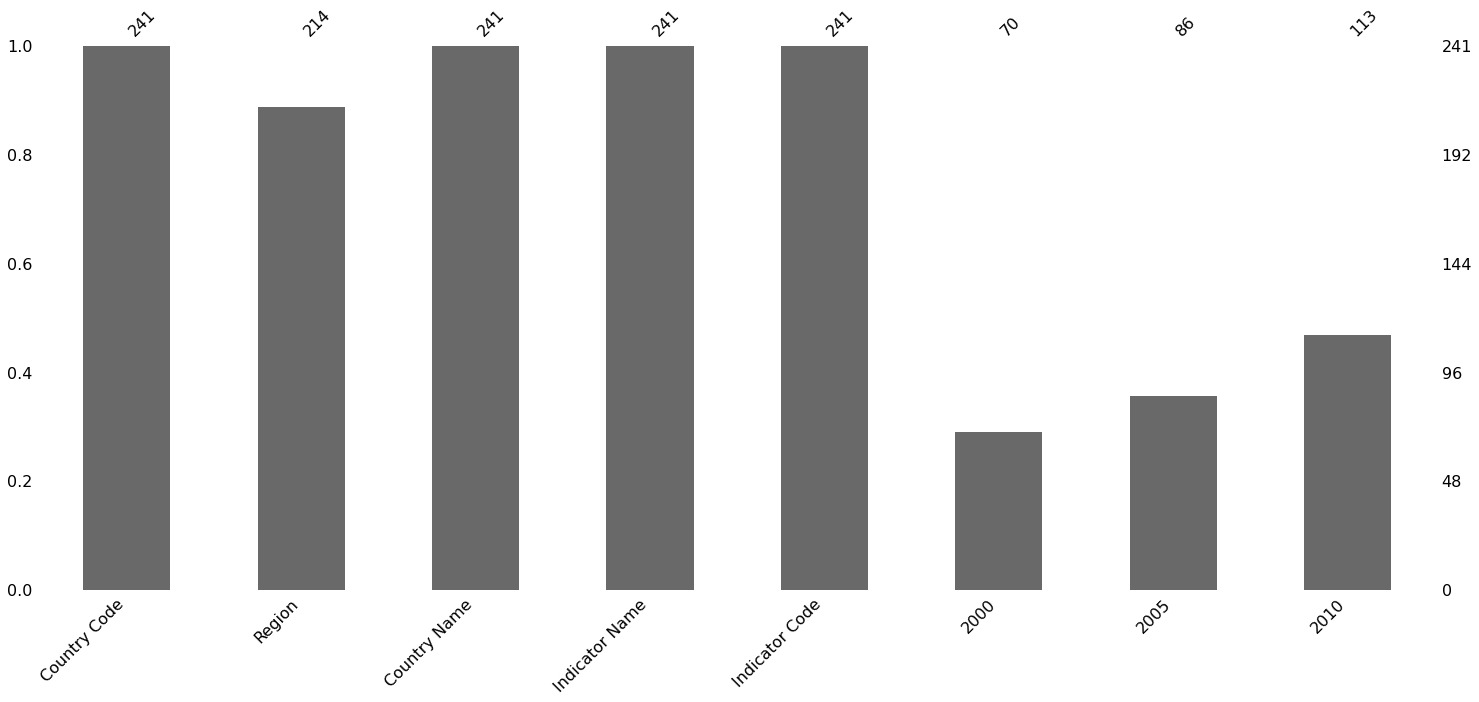

In [73]:
# Dépenses publiques pour l'enseignement supérieur
DataCountry_dep_sup_pib.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace = True)
msno.bar(DataCountry_dep_sup_pib)

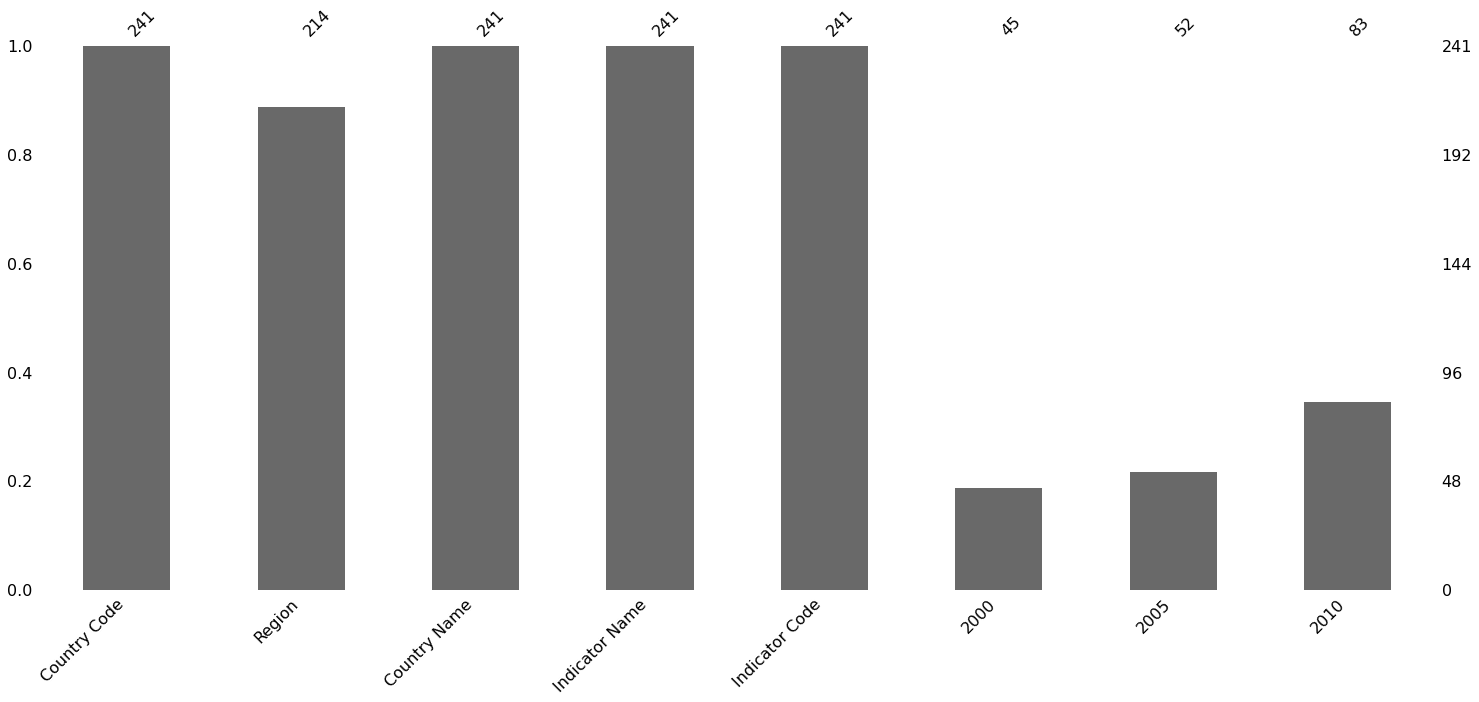

In [74]:
# Dépenses pour le deuxième cycle du secondaire par rapport des dépenses publiques totales
DataCountry_dep_sec_gouv.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace= True)
msno.bar(DataCountry_dep_sec_gouv)

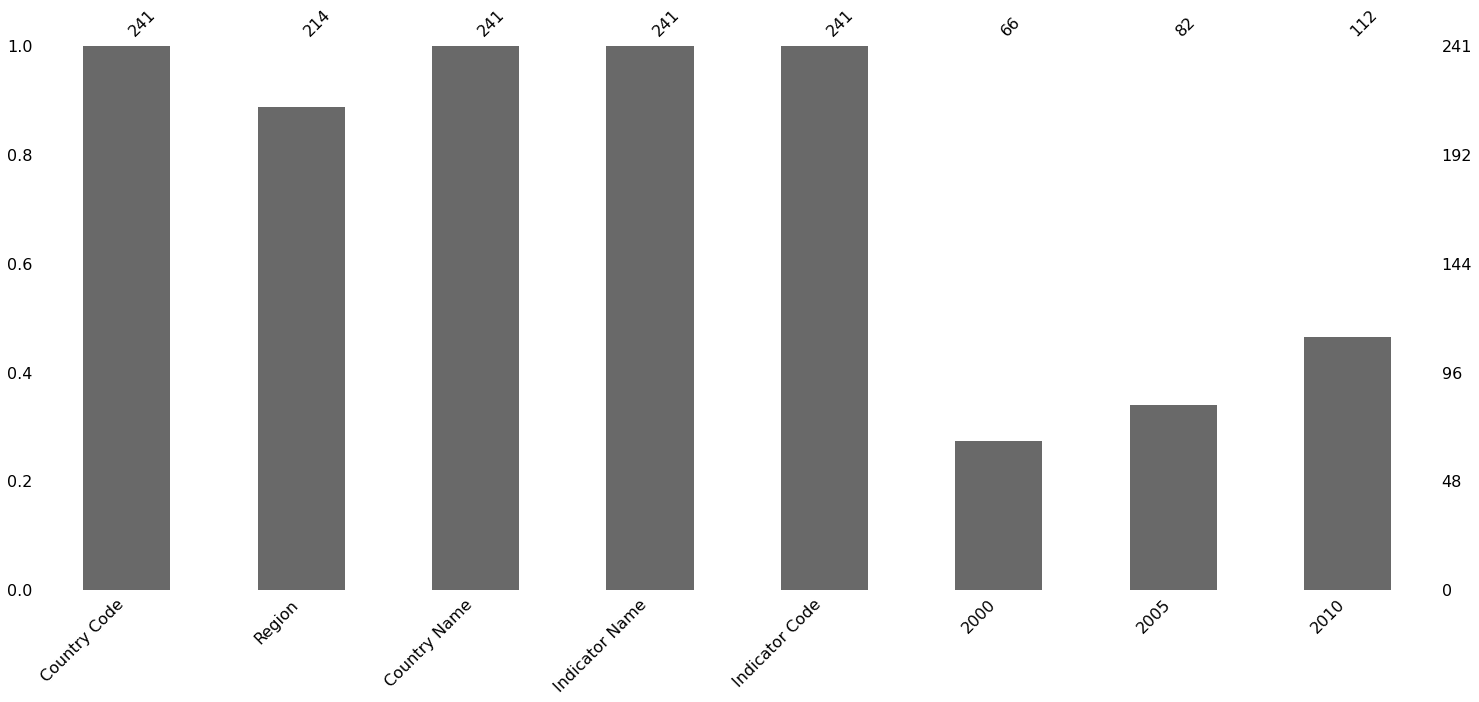

In [75]:
# Dépenses tertiaires en % des dépenses publiques totales 
DataCountry_dep_sup_gouv.drop(columns=['1970','1975','1980','1985','1990','1995','2015','2020','2100'], inplace= True)
msno.bar(DataCountry_dep_sup_gouv)

In [76]:
# Séparation des variables numériques et catégorielles 
df1 = ECDcopy.select_dtypes(include=["int64","float64"])
df2 = ECDcopy.select_dtypes("object")

In [77]:
df1

1970  1975  1980  1985  1990  ...       2005       2010  2015  2020  2100
0        NaN   NaN   NaN   NaN   NaN  ...  59.058441        NaN   NaN   NaN   NaN
1        NaN   NaN   NaN   NaN   NaN  ...  62.097809        NaN   NaN   NaN   NaN
2        NaN   NaN   NaN   NaN   NaN  ...   1.109620        NaN   NaN   NaN   NaN
3        NaN   NaN   NaN   NaN   NaN  ...  55.963299        NaN   NaN   NaN   NaN
4        NaN   NaN   NaN   NaN   NaN  ...  97.978920  98.920464   NaN   NaN   NaN
...      ...   ...   ...   ...   ...  ...        ...        ...   ...   ...   ...
883260   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN   NaN   NaN   NaN
883261   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN   NaN   NaN   NaN
883262   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN   NaN   NaN   NaN
883263   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN   NaN   NaN   NaN
883264   NaN   NaN   NaN   NaN   NaN  ...        NaN        NaN   NaN   NaN   NaN

[883265 rows x 12 columns]

In [78]:
df2

Country Code  ...        Indicator Code
0               ABW  ...            UIS.NERA.2
1               ABW  ...          UIS.NERA.2.F
2               ABW  ...        UIS.NERA.2.GPI
3               ABW  ...          UIS.NERA.2.M
4               ABW  ...           SE.PRM.TENR
...             ...  ...                   ...
883260          ZWE  ...      UIS.LP.AG15T24.M
883261          ZWE  ...     SE.ADT.1524.LT.ZS
883262          ZWE  ...  SE.ADT.1524.LT.FE.ZS
883263          ZWE  ...  SE.ADT.1524.LT.FM.ZS
883264          ZWE  ...  SE.ADT.1524.LT.MA.ZS

[883265 rows x 5 columns]

#### Visualisation  des variables numériques

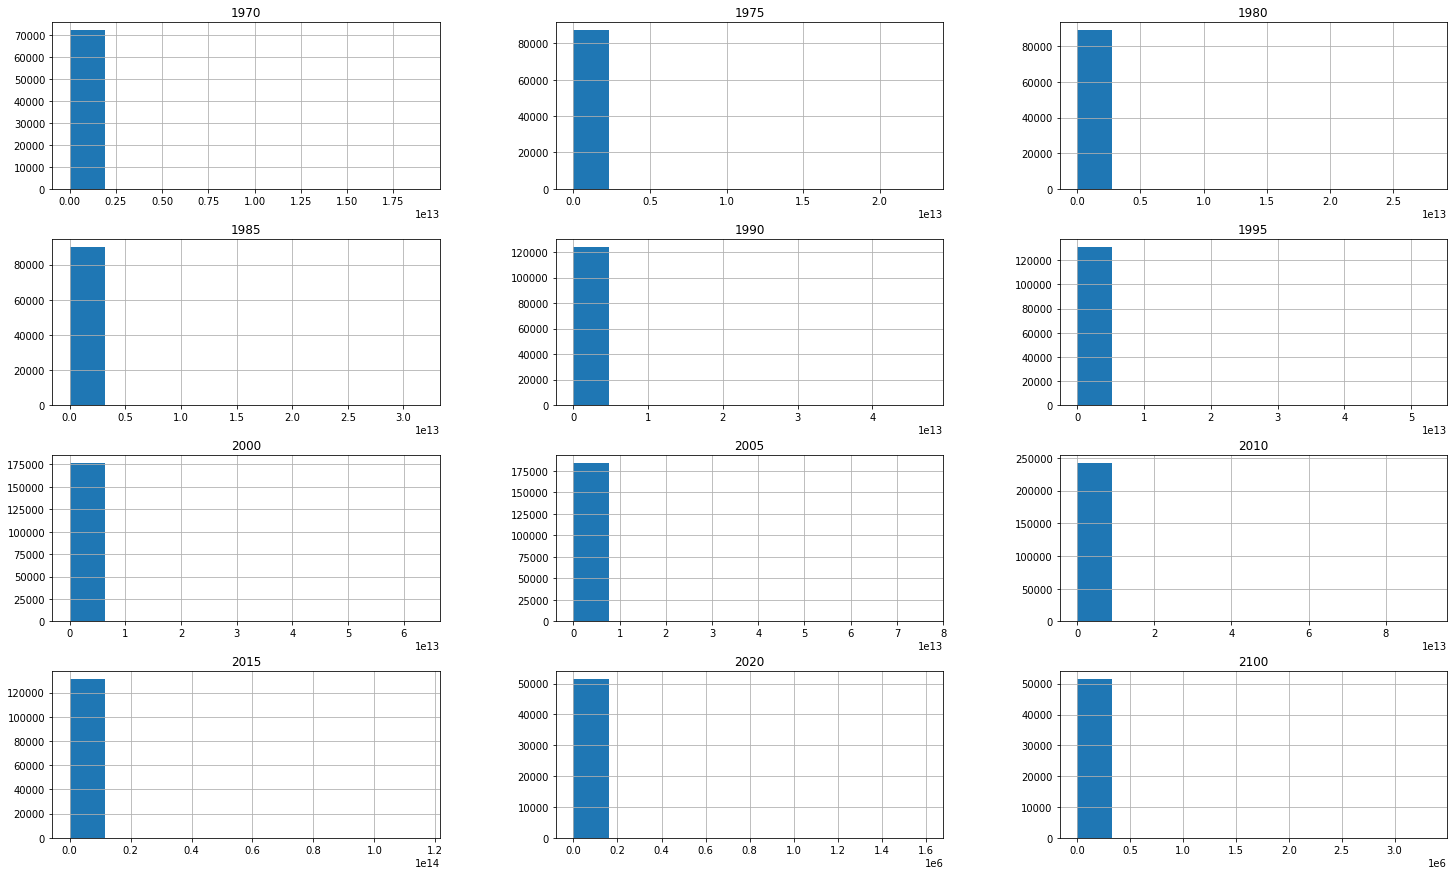

In [79]:
##### Visualisation de la distribution des variables numerique
plt = df1.hist(figsize=(25,15))

In [80]:
ECDcopy.dtypes

Country Code       object
Region             object
Country Name       object
Indicator Name     object
Indicator Code     object
1970              float64
1975              float64
1980              float64
1985              float64
1990              float64
1995              float64
2000              float64
2005              float64
2010              float64
2015              float64
2020              float64
2100              float64
dtype: object

In [81]:
# Statistique descriptives des varibles qualitatives 
ECcopy.describe(include='object')

Country Code                 Region
count           241                    214
unique          241                      7
top             PHL  Europe & Central Asia
freq              1                     57

# Détermination des ordres de grandeurs pour chaque indicateur(moyenne,min, max,écart type)

In [82]:
# le nombre de personnes ayant un ordinateur personnel
DataCountry_comp['mean_comp']=DataCountry_comp[['1990','1995','2000','2005']].mean(axis=1)
DataCountry_comp['ecart_type_comp']=DataCountry_comp[['1990','1995','2000','2005']].std(axis=1)
DataCountry_comp['min_comp']=DataCountry_comp[['1990','1995','2000','2005']].min(axis=1)
DataCountry_comp['max_comp']=DataCountry_comp[['1990','1995','2000','2005']].max(axis=1)
DataCountry_comp['median_comp']=DataCountry_comp[['1990','1995','2000','2005']].median(axis=1)

# Le nombre d'internaute
DataCountry_int['mean_int']=DataCountry_int[['1995','2000','2005','2010','2015']].mean(axis=1)
DataCountry_int['ecart_type_int']=DataCountry_int[['1995','2000','2005','2010','2015']].std(axis=1)
DataCountry_int['min_int']=DataCountry_int[['1995','2000','2005','2010','2015']].min(axis=1)
DataCountry_int['max_int']=DataCountry_int[['1995','2000','2005','2010','2015']].max(axis=1)
DataCountry_int['median_int']=DataCountry_int[['1995','2000','2005','2010','2015']].median(axis=1)

# Population âgée de 15 à 19 ans
DataCountry_pop['mean_pop']=DataCountry_pop[['2010','2015','2020','2100']].mean(axis=1)
DataCountry_pop['ecart_type_pop']=DataCountry_pop[['2010','2015','2020','2100']].std(axis=1)
DataCountry_pop['min_pop']=DataCountry_pop[['2010','2015','2020','2100']].min(axis=1)
DataCountry_pop['max_pop']=DataCountry_pop[['2010','2015','2020','2100']].max(axis=1)
DataCountry_pop['median_pop']=DataCountry_pop[['2010','2015','2020','2100']].median(axis=1)

# Population âgée de 20 à 24 ans
DataCountry_mean['mean_ann']=DataCountry_mean[['2010','2015','2020','2100']].mean(axis=1)
DataCountry_mean['ecart_type_mean']=DataCountry_mean[['2010','2015','2020','2100']].std(axis=1)
DataCountry_mean['min_mean']=DataCountry_mean[['2010','2015','2020','2100']].min(axis=1)
DataCountry_mean['max_mean']=DataCountry_mean[['2010','2015','2020','2100']].max(axis=1)
DataCountry_mean['median_ann']=DataCountry_mean[['2010','2015','2020','2100']].median(axis=1)

# Dépense pour l'éducation secondaire par rapport au pib
DataCountry_dep_sec_pib['mean_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sec_pib['ecart_type_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sec_pib['min_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sec_pib['max_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sec_pib['median_sec_pib']=DataCountry_dep_sec_pib[['2000','2005','2010']].median(axis=1)

#  Dépense pour l'éducation tertiaire par rapport au pib
DataCountry_dep_sup_pib['mean_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sup_pib['ecart_type_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sup_pib['min_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sup_pib['max_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sup_pib['median_sup_pib']=DataCountry_dep_sup_pib[['2000','2005','2010']].median(axis=1)

# Dépense publique pour l'éducation secondaire par rapport au gouv
DataCountry_dep_sec_gouv['mean_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sec_gouv['ecart_type_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sec_gouv['min_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sec_gouv['max_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sec_gouv['median_sec_gouv']=DataCountry_dep_sec_gouv[['2000','2005','2010']].median(axis=1)

# Dépense publique pour l'éducation tertiaire par rapport au gouv
DataCountry_dep_sup_gouv['mean_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].mean(axis=1)
DataCountry_dep_sup_gouv['ecart_type_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].std(axis=1)
DataCountry_dep_sup_gouv['min_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].min(axis=1)
DataCountry_dep_sup_gouv['max_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].max(axis=1)
DataCountry_dep_sup_gouv['median_sup_gouv']=DataCountry_dep_sup_gouv[['2000','2005','2010']].median(axis=1)

######Quelques visualisations des statistics des indicateurs


In [83]:
DataCountry_comp['mean_comp'].dropna()

2084      7.923544
5749      0.341903
9414      0.336119
13079     1.222992
20409     2.670313
            ...   
863359    0.858894
870689    1.092937
874354    4.505871
878019    0.917555
881684    2.137380
Name: mean_comp, Length: 214, dtype: float64

In [84]:
#Test
DataCountry_comp['mean_comp']

2084      7.923544
5749      0.341903
9414      0.336119
13079     1.222992
16744          NaN
            ...   
867024         NaN
870689    1.092937
874354    4.505871
878019    0.917555
881684    2.137380
Name: mean_comp, Length: 241, dtype: float64

# Affichage des statistiques pour chaque indicateur

## Pour l'indicateur: Nombre d'internautes (Fillna method='ffill') and recheck NaN

In [86]:
############################################ REVOIR LA STRATEGIE DE FILL NA##############################

In [87]:
#DataCountry_int.fillna(0,inplace=True)
DataCountry_int.fillna(method='ffill',inplace=True)
DataCountry_int.loc[:,['Country Name','mean_int','ecart_type_int','min_int','max_int','median_int']].sort_values(by='max_int',ascending=False)

Country Name   mean_int  ...    max_int  median_int
93000                     Bermuda  59.553740  ...  98.323610   65.447066
375205                    Iceland  66.855282  ...  98.200000   87.000000
481490                 Luxembourg  56.486474  ...  97.334100   70.000000
16035                     Andorra  56.513650  ...  96.910000   59.302883
602435                     Norway  66.122704  ...  96.810300   81.990000
...                           ...        ...  ...        ...         ...
774690                       Chad   1.408741  ...   3.500000    1.049629
587775                      Niger   0.890956  ...   2.476220    0.525671
719715                    Somalia   0.714332  ...   1.760000    0.548664
235935                    Eritrea   0.457611  ...   1.083733    0.373356
653745  Korea, Dem. People’s Rep.   0.000000  ...   0.000000    0.000000

[241 rows x 6 columns]

In [88]:
### Check NaN
DataCountry_int.isnull().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
1990              0
1995              3
2000              0
2005              0
2010              0
2015              0
mean_int          0
ecart_type_int    0
min_int           0
max_int           0
median_int        0
dtype: int64

In [89]:
DataCountry_int['1995']

1375           NaN
5040           NaN
8705           NaN
12370     0.011169
16035     0.011169
            ...   
866315    0.782328
869980    0.782328
873645    0.676740
877310    0.008784
880975    0.007684
Name: 1995, Length: 241, dtype: float64

In [90]:
#Fill NaN by mean 
DataCountry_int['1995'].fillna(DataCountry_int['1995'].mean(), inplace=True)

In [91]:
### Check Again NaN
DataCountry_int.isnull().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
1990              0
1995              0
2000              0
2005              0
2010              0
2015              0
mean_int          0
ecart_type_int    0
min_int           0
max_int           0
median_int        0
dtype: int64

## Nombre d'ordinateurs

In [92]:
#DataCountry_comp.fillna(0,inplace=True)
DataCountry_comp.fillna(method='ffill',inplace=True)
DataCountry_comp.loc[:,['Country Name','mean_comp','ecart_type_comp','min_comp','max_comp','median_comp']].sort_values(by='max_comp',ascending=False)

Country Name  mean_comp  ...   max_comp  median_comp
123029            Canada  40.520798  ...  87.728023    31.934938
126694       Switzerland  47.468630  ...  86.790933    47.046685
130359   Channel Islands  47.468630  ...  86.790933    47.046685
599479       Netherlands  38.689215  ...  85.528113    29.913338
753409            Sweden  42.436429  ...  83.586531    37.822034
...                  ...        ...  ...        ...          ...
570159            Malawi   0.150097  ...   0.194201     0.150097
346594             Haiti   0.172770  ...   0.172770     0.172770
775399              Chad   0.146141  ...   0.159770     0.146141
588484             Niger   0.060674  ...   0.075851     0.060674
148684  Congo, Dem. Rep.   0.022211  ...   0.022211     0.022211

[241 rows x 6 columns]

In [93]:
###Check NaN 
DataCountry_comp.isnull().sum()

Country Code       0
Region             0
Country Name       0
Indicator Name     0
Indicator Code     0
1990               7
1995               5
2000               2
2005               0
mean_comp          0
ecart_type_comp    2
min_comp           0
max_comp           0
median_comp        0
dtype: int64

In [94]:
DataCountry_comp['ecart_type_comp']

2084           NaN
5749           NaN
9414      0.323005
13079     0.659803
16744     0.659803
            ...   
867024    0.975249
870689    1.263167
874354    3.450666
878019    0.317566
881684    3.106973
Name: ecart_type_comp, Length: 241, dtype: float64

In [95]:
#Fill NaN by mean 
DataCountry_comp['1990'].fillna(DataCountry_comp['1990'].mean(), inplace=True)
DataCountry_comp['1995'].fillna(DataCountry_comp['1995'].mean(), inplace=True)
DataCountry_comp['2000'].fillna(DataCountry_comp['2000'].mean(), inplace=True)
DataCountry_comp['ecart_type_comp'].fillna(DataCountry_comp['ecart_type_comp'].mean(), inplace=True)

In [96]:
###Check again NaN 
DataCountry_comp.isnull().sum()

Country Code       0
Region             0
Country Name       0
Indicator Name     0
Indicator Code     0
1990               0
1995               0
2000               0
2005               0
mean_comp          0
ecart_type_comp    0
min_comp           0
max_comp           0
median_comp        0
dtype: int64

## années moyennes de scolarisation. 20-24 ans

In [97]:
#DataCountry_mean.fillna(0,inplace=True)
DataCountry_mean.fillna(method='ffill',inplace=True)
DataCountry_mean.loc[:,['Country Name','mean_ann','ecart_type_mean','min_mean','max_mean','median_ann']].sort_values(by='max_mean',ascending=False)

Country Name  mean_ann  ...  max_mean  median_ann
377191                Iceland    14.750  ...      16.2       14.50
575101               Malaysia    13.850  ...      15.7       13.50
578766          North America    13.850  ...      15.7       13.50
366196                Ireland    14.925  ...      15.4       14.85
538451                  Malta    13.925  ...      15.2       13.55
...                       ...       ...  ...       ...         ...
443161                  Libya     4.550  ...      10.1        2.90
509131             Madagascar     5.825  ...      10.0        4.60
65666            Burkina Faso     4.400  ...       9.8        2.80
740026  Sao Tome and Principe     6.875  ...       9.7        6.50
589761                  Niger     4.075  ...       9.5        2.45

[241 rows x 6 columns]

In [98]:
# Check NaN
DataCountry_mean.isnull().sum()

Country Code       0
Region             0
Country Name       0
Indicator Name     0
Indicator Code     0
2010               0
2015               0
2020               0
2100               0
mean_ann           0
ecart_type_mean    0
min_mean           0
max_mean           0
median_ann         0
dtype: int64

## Population âgée de 15 à 19 ans

In [99]:
#DataCountry_pop.fillna(0,inplace=True)
DataCountry_pop.fillna(method='ffill',inplace=True)
DataCountry_pop.loc[:,['Country Name','mean_pop','ecart_type_pop','min_pop','max_pop','median_pop']].sort_values(by='max_pop',ascending=False)

Country Name     mean_pop  ...    max_pop  median_pop
861212                       World  176649.5575  ...  213485.77  168432.590
362772                       India   49684.5650  ...   58082.00   49207.535
139207                       China   33568.1525  ...   37976.33   37336.470
593667                     Nigeria    5658.2925  ...   14915.93    2888.800
626652                    Pakistan    6201.8675  ...   11001.87    4885.825
...                            ...          ...  ...        ...         ...
3602                         Aruba       1.5025  ...       1.76       1.435
516702  Middle East & North Africa       0.7200  ...       1.22       0.560
513037                    Maldives       0.7200  ...       1.22       0.560
798907                       Tonga       0.9900  ...       1.19       0.955
161197                     Comoros       0.4200  ...       0.86       0.315

[241 rows x 6 columns]

In [100]:
# Check NaN
DataCountry_pop.isnull().sum()

Country Code      0
Region            0
Country Name      0
Indicator Name    0
Indicator Code    0
2010              0
2015              0
2020              0
2100              0
mean_pop          0
ecart_type_pop    0
min_pop           0
max_pop           0
median_pop        0
dtype: int64

## Dépenses publiques pour l'enseignement secondaire par rapport au PIB

In [101]:
#DataCountry_dep_sec_pib.fillna(0,inplace=True)
DataCountry_dep_sec_pib.fillna(method='ffill',inplace=True)
DataCountry_dep_sec_pib.loc[:,['Country Name','mean_sec_pib','ecart_type_sec_pib','min_sec_pib','max_sec_pib','median_sec_pib']].sort_values(by='max_sec_pib',ascending=False)

Country Name  mean_sec_pib  ...  max_sec_pib  median_sec_pib
114880                  Botswana      4.230420  ...      4.23042         4.23042
169855                      Cuba      3.546173  ...      3.97693         3.73665
177185            Cayman Islands      3.546173  ...      3.97693         3.73665
173520                   Curacao      3.546173  ...      3.97693         3.73665
496040                   Morocco      3.072950  ...      3.64796         3.07295
...                          ...           ...  ...          ...             ...
415410       St. Kitts and Nevis      0.457720  ...      0.45772         0.45772
316455                 Guatemala      0.288213  ...      0.41529         0.25762
320120                      Guam      0.288213  ...      0.41529         0.25762
118545  Central African Republic      0.289030  ...      0.28903         0.28903
122210                    Canada      0.289030  ...      0.28903         0.28903

[241 rows x 6 columns]

In [102]:
#Check NaN
DataCountry_dep_sec_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  4
mean_sec_pib          0
ecart_type_sec_pib    0
min_sec_pib           0
max_sec_pib           0
median_sec_pib        0
dtype: int64

In [103]:
#Fill NaN by mean 
DataCountry_dep_sec_pib['2010'].fillna(DataCountry_dep_sec_pib['2010'].mean(), inplace=True)

In [104]:
#Check again NaN
DataCountry_dep_sec_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  0
mean_sec_pib          0
ecart_type_sec_pib    0
min_sec_pib           0
max_sec_pib           0
median_sec_pib        0
dtype: int64

##  Dépenses publiques pour l'enseignement supérieur par rapport au PIB

In [105]:
#DataCountry_dep_sup_pib.fillna(0,inplace=True)
DataCountry_dep_sup_pib.fillna(method='ffill',inplace=True)
DataCountry_dep_sup_pib.loc[:,['Country Name','mean_sup_pib','ecart_type_sup_pib','min_sup_pib','max_sup_pib','median_sup_pib']].sort_values(by='max_sup_pib',ascending=False)

Country Name  ...  median_sup_pib
474051                                      Lesotho  ...        3.655410
114881                                     Botswana  ...        2.975790
210171  East Asia & Pacific (excluding high income)  ...        2.355200
202841                           Dominican Republic  ...        2.355200
221166                        Europe & Central Asia  ...        2.355200
...                                             ...  ...             ...
23256                          United Arab Emirates  ...        0.090255
19591                                    Arab World  ...        0.090255
15926                                       Andorra  ...        0.090255
298131                                Guinea-Bissau  ...        0.093450
301796                            Equatorial Guinea  ...        0.093450

[241 rows x 6 columns]

In [106]:
#Check NaN
DataCountry_dep_sup_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  4
mean_sup_pib          0
ecart_type_sup_pib    0
min_sup_pib           0
max_sup_pib           0
median_sup_pib        0
dtype: int64

In [107]:
#Fill NaN by mean 
DataCountry_dep_sup_pib['2010'].fillna(DataCountry_dep_sup_pib['2010'].mean(), inplace=True)

In [108]:
#Check NaN
DataCountry_dep_sup_pib.isnull().sum()

Country Code          0
Region                0
Country Name          0
Indicator Name        0
Indicator Code        0
2000                  0
2005                  0
2010                  0
mean_sup_pib          0
ecart_type_sup_pib    0
min_sup_pib           0
max_sup_pib           0
median_sup_pib        0
dtype: int64

## Dépenses du secondaire par rapport des dépenses publiques totales

In [109]:
#DataCountry_dep_sec_gouv.fillna(0,inplace=True)
DataCountry_dep_sec_gouv.fillna(method='ffill',inplace=True)
DataCountry_dep_sec_gouv.loc[:,['Country Name','mean_sec_gouv','ecart_type_sec_gouv','min_sec_gouv','max_sec_gouv','median_sec_gouv']].sort_values(by='max_sec_gouv',ascending=False)

Country Name  ...  median_sec_gouv
858851                                   World  ...         8.169470
855186                                 Vanuatu  ...         8.169470
532666                                    Mali  ...         6.983220
338421  Heavily indebted poor countries (HIPC)  ...         6.890260
334756                                Honduras  ...         6.890260
...                                        ...  ...              ...
638951                                   Palau  ...         0.654595
635286                             Philippines  ...         0.654595
594971                               Nicaragua  ...         0.368040
1241                                     Aruba  ...              NaN
4906                               Afghanistan  ...              NaN

[241 rows x 6 columns]

In [110]:
#Check NaN
DataCountry_dep_sec_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   7
2005                   2
2010                   7
mean_sec_gouv          2
ecart_type_sec_gouv    7
min_sec_gouv           2
max_sec_gouv           2
median_sec_gouv        2
dtype: int64

In [111]:
#Fill NaN by mean 
DataCountry_dep_sec_gouv['2000'].fillna(DataCountry_dep_sec_gouv['2000'].mean(), inplace=True)
DataCountry_dep_sec_gouv['2005'].fillna(DataCountry_dep_sec_gouv['2005'].mean(), inplace=True)
DataCountry_dep_sec_gouv['2010'].fillna(DataCountry_dep_sec_gouv['2010'].mean(), inplace=True)
DataCountry_dep_sec_gouv['mean_sec_gouv'].fillna(DataCountry_dep_sec_gouv['mean_sec_gouv'].mean(), inplace=True)
DataCountry_dep_sec_gouv['min_sec_gouv'].fillna(DataCountry_dep_sec_gouv['min_sec_gouv'].mean(), inplace=True)
DataCountry_dep_sec_gouv['max_sec_gouv'].fillna(DataCountry_dep_sec_gouv['max_sec_gouv'].mean(), inplace=True)
DataCountry_dep_sec_gouv['median_sec_gouv'].fillna(DataCountry_dep_sec_gouv['median_sec_gouv'].mean(), inplace=True)
DataCountry_dep_sec_gouv['ecart_type_sec_gouv'].fillna(DataCountry_dep_sec_gouv['ecart_type_sec_gouv'].mean(), inplace=True)

In [112]:
#Check again NaN
DataCountry_dep_sec_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   0
2005                   0
2010                   0
mean_sec_gouv          0
ecart_type_sec_gouv    0
min_sec_gouv           0
max_sec_gouv           0
median_sec_gouv        0
dtype: int64

## Dépenses tertiaires par rapport des dépenses publiques totales 

In [113]:
#DataCountry_dep_sup_gouv.fillna(0,inplace=True)
DataCountry_dep_sup_gouv.fillna(method='ffill',inplace=True)
DataCountry_dep_sup_gouv.loc[:,['Country Name','mean_sup_gouv','ecart_type_sup_gouv','min_sup_gouv','max_sup_gouv','median_sup_gouv']].sort_values(by='max_sup_gouv',ascending=False)

Country Name  mean_sup_gouv  ...  max_sup_gouv  median_sup_gouv
474024                   Lesotho        7.50909  ...      11.80962          7.50909
250459            European Union       11.55709  ...      11.55709         11.55709
246794                  Ethiopia       11.55709  ...      11.55709         11.55709
492349  St. Martin (French part)        7.58741  ...       7.58741          7.58741
488684          Macao SAR, China        7.58741  ...       7.58741          7.58741
...                          ...            ...  ...           ...              ...
444704                 St. Lucia        0.65270  ...       0.65270          0.65270
327424               High income        0.63378  ...       0.63378          0.63378
323759                    Guyana        0.63378  ...       0.63378          0.63378
301769         Equatorial Guinea        0.49936  ...       0.49936          0.49936
298104             Guinea-Bissau        0.49936  ...       0.49936          0.49936

[241 rows x 6 columns]

In [114]:
###Check NaN
DataCountry_dep_sup_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   0
2005                   0
2010                   7
mean_sup_gouv          0
ecart_type_sup_gouv    0
min_sup_gouv           0
max_sup_gouv           0
median_sup_gouv        0
dtype: int64

In [115]:
#Fill NaN by mean 
DataCountry_dep_sup_gouv['2010'].fillna(DataCountry_dep_sup_gouv['2010'].mean(), inplace=True)

In [116]:
###Check again NaN
DataCountry_dep_sup_gouv.isnull().sum()

Country Code           0
Region                 0
Country Name           0
Indicator Name         0
Indicator Code         0
2000                   0
2005                   0
2010                   0
mean_sup_gouv          0
ecart_type_sup_gouv    0
min_sup_gouv           0
max_sup_gouv           0
median_sup_gouv        0
dtype: int64

# Les statistiques par région avec les indicateurs

### Nombre d'ordinateurs par région

In [117]:
# Nombre d'ordinateurs
liste1=[DataCountry_comp.groupby(['Region'])[['mean_comp']].mean(),
DataCountry_comp.groupby(['Region'])[['ecart_type_comp']].std(),
DataCountry_comp.groupby(['Region'])[['min_comp']].min(),
DataCountry_comp.groupby(['Region'])[['max_comp']].min(),
DataCountry_comp.groupby(['Region'])[['median_comp']].median()   ]
for i in liste1 :
   print(i)
   print("--------------------------------------") 

                            mean_comp
Region                               
East Asia & Pacific          9.816982
Europe & Central Asia       15.908705
Latin America & Caribbean    7.320935
Middle East & North Africa   6.880750
North America               42.503709
South Asia                   1.476276
Sub-Saharan Africa           3.255641
--------------------------------------
                            ecart_type_comp
Region                                     
East Asia & Pacific                8.176316
Europe & Central Asia             10.508510
Latin America & Caribbean          5.862661
Middle East & North Africa         5.933515
North America                     11.771582
South Asia                         2.426557
Sub-Saharan Africa                 2.866774
--------------------------------------
                             min_comp
Region                               
East Asia & Pacific          0.006342
Europe & Central Asia        0.058769
Latin America & Caribbean    0.1

### Nombre d'internautes par région

In [118]:
# Nombre d'internautes 
liste2=[DataCountry_int.groupby(['Region'])[['mean_int']].mean(),
DataCountry_int.groupby(['Region'])[['ecart_type_int']].std(),
DataCountry_int.groupby(['Region'])[['min_int']].min(),
DataCountry_int.groupby(['Region'])[['max_int']].max(),
DataCountry_int.groupby(['Region'])[['median_int']].median()]
for i in liste2 :
   print(i)
   print("--------------------------------------") 

                             mean_int
Region                               
East Asia & Pacific         22.993798
Europe & Central Asia       37.200035
Latin America & Caribbean   22.234460
Middle East & North Africa  23.909494
North America               57.346049
South Asia                   9.404518
Sub-Saharan Africa           7.962026
--------------------------------------
                            ecart_type_int
Region                                    
East Asia & Pacific              10.169006
Europe & Central Asia             8.767617
Latin America & Caribbean         8.300332
Middle East & North Africa        9.592675
North America                     4.357227
South Asia                        5.907854
Sub-Saharan Africa                6.650321
--------------------------------------
                             min_int
Region                              
East Asia & Pacific         0.000000
Europe & Central Asia       0.000000
Latin America & Caribbean   0.000000
Middle E

### Années moyennes de scolarisation 20-24 ans

In [119]:
# Années moyennes de scolarisation 20-24 ans
liste3=[DataCountry_mean.groupby(['Region'])[['mean_ann']].mean(),
DataCountry_mean.groupby(['Region'])[['ecart_type_mean']].std(),
DataCountry_mean.groupby(['Region'])[['min_mean']].min(),
DataCountry_mean.groupby(['Region'])[['max_mean']].max(),
DataCountry_mean.groupby(['Region'])[['median_ann']].median()  ]
for i in liste3 :
   print(i)
   print("--------------------------------------") 

                             mean_ann
Region                               
East Asia & Pacific         11.302439
Europe & Central Asia       12.015417
Latin America & Caribbean   10.763043
Middle East & North Africa  11.280556
North America               11.833333
South Asia                  10.079167
Sub-Saharan Africa           7.995673
--------------------------------------
                            ecart_type_mean
Region                                     
East Asia & Pacific                0.720219
Europe & Central Asia              0.496433
Latin America & Caribbean          0.604020
Middle East & North Africa         0.686619
North America                      1.299064
South Asia                         0.795297
Sub-Saharan Africa                 0.992105
--------------------------------------
                            min_mean
Region                              
East Asia & Pacific              5.7
Europe & Central Asia            6.6
Latin America & Caribbean        5.7

### Population âgé de 15-19 ans

In [120]:
# Années moyennes de scolarisation 15-19 ans
liste4=[DataCountry_pop.groupby(['Region'])[['mean_pop']].mean(),
DataCountry_pop.groupby(['Region'])[['ecart_type_pop']].std(),
DataCountry_pop.groupby(['Region'])[['min_pop']].min(),
DataCountry_pop.groupby(['Region'])[['max_pop']].max(),
DataCountry_pop.groupby(['Region'])[['median_pop']].median() ]     
for i in liste4 :
   print(i)
   print("--------------------------------------") 

                               mean_pop
Region                                 
East Asia & Pacific         6148.406524
Europe & Central Asia        550.181125
Latin America & Caribbean    369.099402
Middle East & North Africa   704.105741
North America               3047.330000
South Asia                  5029.777500
Sub-Saharan Africa           323.846106
--------------------------------------
                            ecart_type_pop
Region                                    
East Asia & Pacific            4129.217632
Europe & Central Asia           310.764263
Latin America & Caribbean       112.885937
Middle East & North Africa      207.381974
North America                  1117.405374
South Asia                     2051.125643
Sub-Saharan Africa              864.530672
--------------------------------------
                            min_pop
Region                             
East Asia & Pacific            0.86
Europe & Central Asia          1.23
Latin America & Caribbean      

### Dépenses publiques pour l'enseignement secondaire par rapport au PIB

In [121]:
# Années moyennes de scolarisation 20-24 ans
liste5=[DataCountry_dep_sec_pib.groupby(['Region'])[['mean_sec_pib']].mean(),
DataCountry_dep_sec_pib.groupby(['Region'])[['ecart_type_sec_pib']].std(),
DataCountry_dep_sec_pib.groupby(['Region'])[['min_sec_pib']].min(),
DataCountry_dep_sec_pib.groupby(['Region'])[['max_sec_pib']].max(),
DataCountry_dep_sec_pib.groupby(['Region'])[['median_sec_pib']].median() ]
for i in liste5 :
   print(i)
   print("--------------------------------------")

                            mean_sec_pib
Region                                  
East Asia & Pacific             1.622604
Europe & Central Asia           1.798283
Latin America & Caribbean       1.559080
Middle East & North Africa      1.667404
North America                   1.080706
South Asia                      1.116465
Sub-Saharan Africa              1.290963
--------------------------------------
                            ecart_type_sec_pib
Region                                        
East Asia & Pacific                   0.095136
Europe & Central Asia                 0.095768
Latin America & Caribbean             0.218924
Middle East & North Africa            0.244615
North America                         0.529735
South Asia                            0.276142
Sub-Saharan Africa                    0.325631
--------------------------------------
                            min_sec_pib
Region                                 
East Asia & Pacific             0.19173
Europe & C

### Dépenses publiques pour l'enseignement supérieur par rapport au PIB

In [122]:
# Dépenses publiques pour l'enseignement supérieur par rapport au PIB
liste6=[DataCountry_dep_sup_pib.groupby(['Region'])[['mean_sup_pib']].mean(),
DataCountry_dep_sup_pib.groupby(['Region'])[['ecart_type_sup_pib']].std(),
DataCountry_dep_sup_pib.groupby(['Region'])[['min_sup_pib']].min(),
DataCountry_dep_sup_pib.groupby(['Region'])[['max_sup_pib']].max(),
DataCountry_dep_sup_pib.groupby(['Region'])[['median_sup_pib']].median()]
for i in liste6 :
   print(i)
   print("--------------------------------------")

                            mean_sup_pib
Region                                  
East Asia & Pacific             0.876671
Europe & Central Asia           1.019043
Latin America & Caribbean       0.864019
Middle East & North Africa      1.203885
North America                   1.202278
South Asia                      0.450243
Sub-Saharan Africa              0.903098
--------------------------------------
                            ecart_type_sup_pib
Region                                        
East Asia & Pacific                   0.130313
Europe & Central Asia                 0.099691
Latin America & Caribbean             0.206175
Middle East & North Africa            0.182393
North America                         0.108212
South Asia                            0.110058
Sub-Saharan Africa                    0.362907
--------------------------------------
                            min_sup_pib
Region                                 
East Asia & Pacific             0.18532
Europe & C

### Dépenses du secondaire par rapport des dépenses publiques totales

In [123]:
# Dépenses du secondaire par rapport des dépenses publiques totales
liste7=[DataCountry_dep_sec_gouv.groupby(['Region'])[['mean_sec_gouv']].mean(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['ecart_type_sec_gouv']].std(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['min_sec_gouv']].min(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['max_sec_gouv']].max(),
DataCountry_dep_sec_gouv.groupby(['Region'])[['median_sec_gouv']].median()  ]
for i in liste7 :
   print(i)
   print("--------------------------------------")

                            mean_sec_gouv
Region                                   
East Asia & Pacific              2.485159
Europe & Central Asia            2.505079
Latin America & Caribbean        2.351562
Middle East & North Africa       2.599338
North America                    2.250975
South Asia                       2.325876
Sub-Saharan Africa               2.106458
--------------------------------------
                            ecart_type_sec_gouv
Region                                         
East Asia & Pacific                    0.298715
Europe & Central Asia                  0.265006
Latin America & Caribbean              0.298946
Middle East & North Africa             0.310291
North America                          0.158341
South Asia                             0.187445
Sub-Saharan Africa                     0.573598
--------------------------------------
                            min_sec_gouv
Region                                  
East Asia & Pacific           

### Dépenses du supérieur par rapport des dépenses publiques totales

In [124]:
# Dépenses du secondaire par rapport des dépenses publiques totales
liste8=[DataCountry_dep_sup_gouv.groupby(['Region'])[['mean_sup_gouv']].mean(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['ecart_type_sup_gouv']].std(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['min_sup_gouv']].min(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['max_sup_gouv']].max(),
DataCountry_dep_sup_gouv.groupby(['Region'])[['median_sup_gouv']].median() ]
for i in liste8 :
   print(i)
   print("--------------------------------------")

                            mean_sup_gouv
Region                                   
East Asia & Pacific              3.091150
Europe & Central Asia            2.572513
Latin America & Caribbean        2.730322
Middle East & North Africa       3.405307
North America                    3.245730
South Asia                       2.057007
Sub-Saharan Africa               3.359304
--------------------------------------
                            ecart_type_sup_gouv
Region                                         
East Asia & Pacific                    0.464528
Europe & Central Asia                  0.279452
Latin America & Caribbean              0.550371
Middle East & North Africa             0.626627
North America                          0.270049
South Asia                             0.355024
Sub-Saharan Africa                     0.993771
--------------------------------------
                            min_sup_gouv
Region                                  
East Asia & Pacific           

In [125]:
EIQ= DataCountry_comp['mean_comp'].quantile(0.75) - DataCountry_comp['mean_comp'].quantile(0.25)
EIQ

9.575224774402932

In [126]:
EIQ= DataCountry_int['mean_int'].quantile(0.75) - DataCountry_int['mean_int'].quantile(0.25)
EIQ

27.7664414452

In [127]:
EIQ= DataCountry_pop['mean_pop'].quantile(0.75) - DataCountry_pop['mean_pop'].quantile(0.25)
EIQ

525.42

In [128]:
EIQ= DataCountry_mean['mean_ann'].quantile(0.75) - DataCountry_mean['mean_ann'].quantile(0.25)
EIQ

2.8000000000000007

In [129]:
EIQ= DataCountry_dep_sec_pib['mean_sec_pib'].quantile(0.75) - DataCountry_dep_sec_pib['mean_sec_pib'].quantile(0.25)
EIQ

0.9835766553878799

In [130]:
EIQ= DataCountry_dep_sup_pib['mean_sup_pib'].quantile(0.75) - DataCountry_dep_sup_pib['mean_sup_pib'].quantile(0.25)
EIQ

0.8259500563144662

In [131]:
EIQ= DataCountry_dep_sup_gouv['mean_sup_gouv'].quantile(0.75) - DataCountry_dep_sup_gouv['mean_sup_gouv'].quantile(0.25)
EIQ

2.002530097961425

In [132]:
EIQ= DataCountry_dep_sec_gouv['mean_sec_gouv'].quantile(0.75) - DataCountry_dep_sec_gouv['mean_sec_gouv'].quantile(0.25)
EIQ

1.09818669160207

# Visualisation des moyennes(diagramme en moustache et histogramme)

In [133]:
liste=[DataCountry_comp['mean_comp'],DataCountry_pop['mean_pop'],DataCountry_mean['mean_ann'],DataCountry_int['mean_int'],
      DataCountry_dep_sec_pib['mean_sec_pib'],DataCountry_dep_sup_pib['mean_sup_pib'],DataCountry_dep_sec_gouv['mean_sec_gouv'],
      DataCountry_dep_sup_gouv['mean_sup_gouv']]


In [134]:
DataCountry_comp['mean_comp']

2084      7.923544
5749      0.341903
9414      0.336119
13079     1.222992
16744     1.222992
            ...   
867024    0.858894
870689    1.092937
874354    4.505871
878019    0.917555
881684    2.137380
Name: mean_comp, Length: 241, dtype: float64

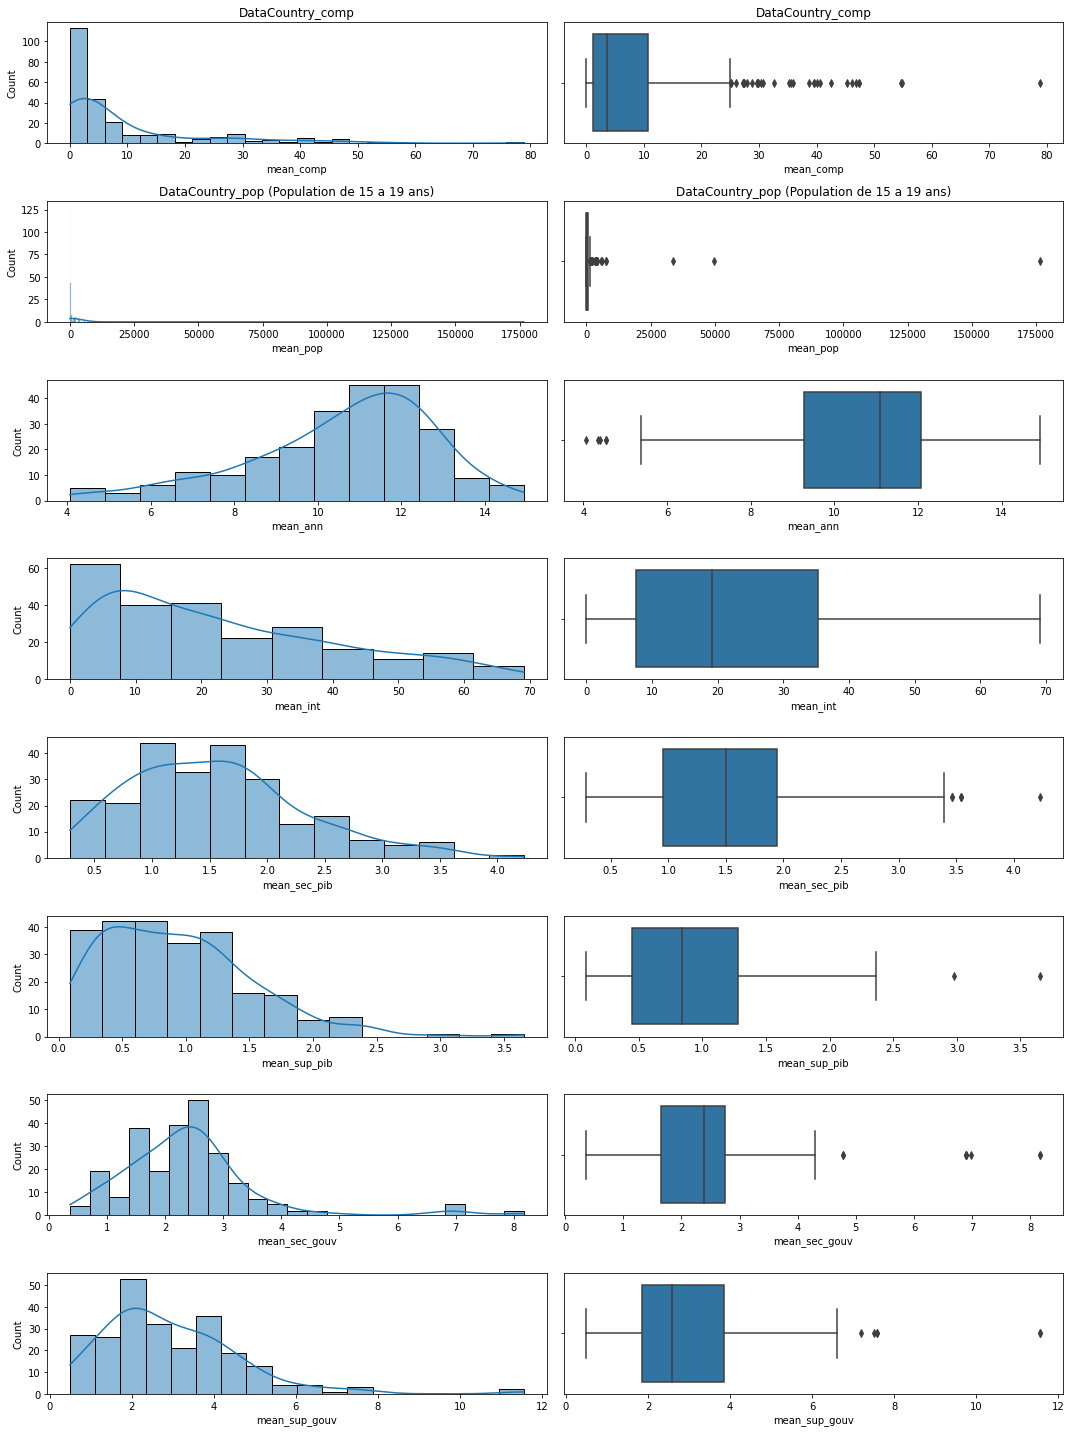

In [135]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,20))
# DataCountry_comp[
#suplot #1
plt.subplot(8,2,1)
plt.title('DataCountry_comp')
sns.histplot(DataCountry_comp['mean_comp'], kde=True)

plt.subplot(8,2,2)
plt.title('DataCountry_comp')
sns.boxplot(DataCountry_comp['mean_comp'])

#DataCountry_pop['mean_pop']
plt.subplot(8,2,3)
plt.title('DataCountry_pop (Population de 15 a 19 ans)')
sns.histplot(DataCountry_pop['mean_pop'], kde=True)

plt.subplot(8,2,4)
plt.title('DataCountry_pop (Population de 15 a 19 ans)')
sns.boxplot(DataCountry_pop['mean_pop'])



#DataCountry_mean['mean_ann']
plt.subplot(8,2,5)
plt.title('')
sns.histplot(DataCountry_mean['mean_ann'], kde=True)

plt.subplot(8,2,6)
plt.title('')
sns.boxplot(DataCountry_mean['mean_ann'])

#DataCountry_int['mean_int']
plt.subplot(8,2,7)
plt.title('')
sns.histplot(DataCountry_int['mean_int'], kde=True)

plt.subplot(8,2,8)
plt.title('')
sns.boxplot(DataCountry_int['mean_int'])


#DataCountry_dep_sec_pib['mean_sec_pib']
plt.subplot(8,2,9)
plt.title('')
sns.histplot(DataCountry_dep_sec_pib['mean_sec_pib'], kde=True)

plt.subplot(8,2,10)
plt.title('')
sns.boxplot(DataCountry_dep_sec_pib['mean_sec_pib'])

#DataCountry_dep_sup_pib['mean_sup_pib']
plt.subplot(8,2,11)
plt.title('')
sns.histplot(DataCountry_dep_sup_pib['mean_sup_pib'], kde=True)

plt.subplot(8,2,12)
plt.title('')
sns.boxplot(DataCountry_dep_sup_pib['mean_sup_pib'])

#DataCountry_dep_sec_gouv['mean_sec_gouv']
plt.subplot(8,2,13)
plt.title('')
sns.histplot(DataCountry_dep_sec_gouv['mean_sec_gouv'], kde=True)

plt.subplot(8,2,14)
plt.title('')
sns.boxplot(DataCountry_dep_sec_gouv['mean_sec_gouv'])

#DataCountry_dep_sup_gouv['mean_sup_gouv']]
plt.subplot(8,2,15)
plt.title('')
sns.histplot(DataCountry_dep_sup_gouv['mean_sup_gouv'], kde=True)

plt.subplot(8,2,16)
plt.title('')
sns.boxplot(DataCountry_dep_sup_gouv['mean_sup_gouv'])

#plt.show()
plt.tight_layout()



In [136]:
""""liste=[DataCountry_comp['mean_comp'],DataCountry_pop['mean_pop'],DataCountry_mean['mean_ann'],DataCountry_int['mean_int'],
#     DataCountry_dep_sec_pib['mean_sec_pib'],DataCountry_dep_sup_pib['mean_sup_pib'],DataCountry_dep_sec_gouv['mean_sec_gouv'],
#      DataCountry_dep_sup_gouv['mean_sup_gouv']]
#f=plt.figure()
#for i in liste:
    f.add_subplot(4,3, i+1)
    #plt.subplot(4,4, i+1)
    sns.distplot(i, kde=False)
    #plt.subplots(i)
    #i.plot()
    plt.show()"""""

'"liste=[DataCountry_comp[\'mean_comp\'],DataCountry_pop[\'mean_pop\'],DataCountry_mean[\'mean_ann\'],DataCountry_int[\'mean_int\'],\n#     DataCountry_dep_sec_pib[\'mean_sec_pib\'],DataCountry_dep_sup_pib[\'mean_sup_pib\'],DataCountry_dep_sec_gouv[\'mean_sec_gouv\'],\n#      DataCountry_dep_sup_gouv[\'mean_sup_gouv\']]\n#f=plt.figure()\n#for i in liste:\n    f.add_subplot(4,3, i+1)\n    #plt.subplot(4,4, i+1)\n    sns.distplot(i, kde=False)\n    #plt.subplots(i)\n    #i.plot()\n    plt.show()'

In [137]:
#from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler

In [138]:
# La classe 
#mms = MinMaxScaler()

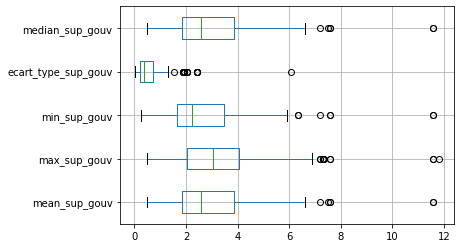

<Figure size 432x288 with 0 Axes>

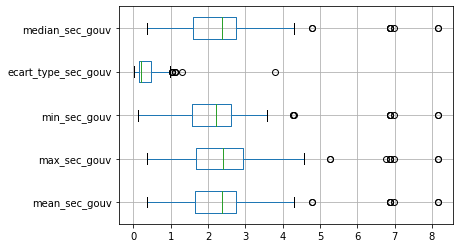

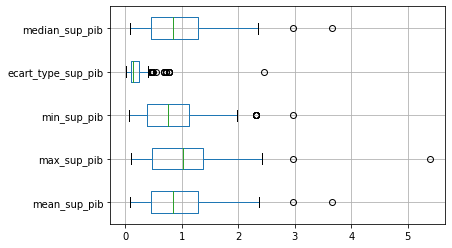

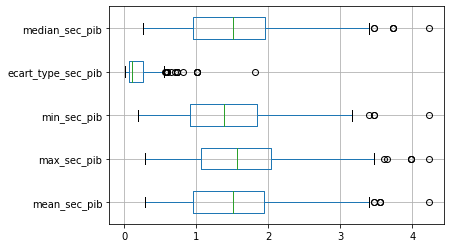

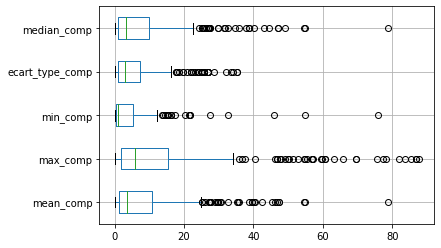

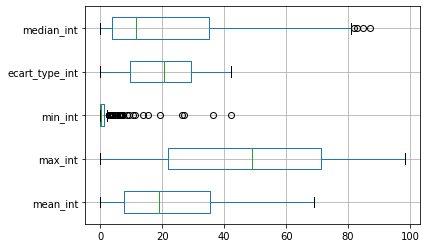

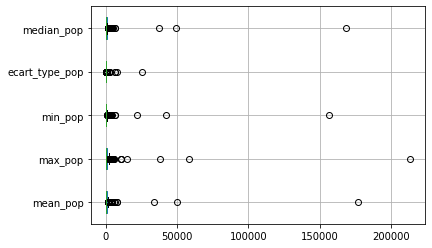

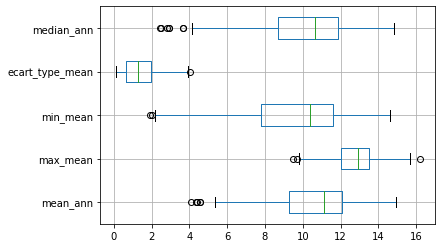

<Figure size 432x288 with 0 Axes>

In [139]:
DataCountry_dep_sup_gouv.boxplot(column=['mean_sup_gouv','max_sup_gouv','min_sup_gouv', 'ecart_type_sup_gouv','median_sup_gouv'],vert=False)
plt.show()
DataCountry_dep_sec_gouv.boxplot(column=['mean_sec_gouv','max_sec_gouv','min_sec_gouv', 'ecart_type_sec_gouv','median_sec_gouv'],vert=False)
plt.figure()
DataCountry_dep_sup_pib.boxplot(column=['mean_sup_pib','max_sup_pib','min_sup_pib', 'ecart_type_sup_pib','median_sup_pib'],vert=False)
plt.figure()
DataCountry_dep_sec_pib.boxplot(column=['mean_sec_pib','max_sec_pib','min_sec_pib', 'ecart_type_sec_pib','median_sec_pib'],vert=False)
plt.figure()
DataCountry_comp.boxplot(column=['mean_comp','max_comp','min_comp','ecart_type_comp',"median_comp"],vert=False)
plt.figure()
DataCountry_int.boxplot(column=['mean_int','max_int','min_int','ecart_type_int','median_int'],vert=False)
plt.figure()
DataCountry_pop.boxplot(column=['mean_pop','max_pop','min_pop','ecart_type_pop','median_pop'],vert=False)
plt.figure()
DataCountry_mean.boxplot(column=['mean_ann','max_mean','min_mean','ecart_type_mean','median_ann'],vert=False)
plt.figure()

#### On prend les valeurs atipyques à droites qui sont grandes

# Les indicateurs par pays et par région

### Définition d'une fonction pour récupérer les outliers

In [140]:
def detect_outliers(v):
    Q1= np.quantile(v,0.25)
    Q3= np.quantile(v,0.75)
    EIQ= Q3-Q1
    LI=Q1-(EIQ*1.5)
    LS=Q1-(EIQ*1.5)
    i=list(v.index[(v<LI) | (v>LS)])
    val=list(v[i])
    return i, val

### Dépense pour l'éducation sup du gouv

In [141]:
# Appel à la fonction 
outliers1= detect_outliers(DataCountry_dep_sup_gouv['mean_sup_gouv'])
outliers1[1]

[2.23965001106262,
 2.23965001106262,
 0.6620500087738039,
 0.6620500087738039,
 0.6620500087738039,
 0.6620500087738039,
 0.6620500087738039,
 2.86733333269755,
 1.4451500177383403,
 1.4451500177383403,
 1.4451500177383403,
 3.129916667938233,
 2.8709533214569105,
 1.0849066575368251,
 2.9108699957529702,
 2.586245059967045,
 3.667883316675823,
 2.558399975299835,
 2.0639200210571302,
 1.84421992301941,
 1.84421992301941,
 1.84421992301941,
 1.84421992301941,
 2.74689996242523,
 1.522965013980865,
 1.74401998519897,
 6.29575514793396,
 2.3512399991353337,
 4.585086663564047,
 1.29007005691528,
 2.5712599754333496,
 7.196209907531741,
 1.32577002048492,
 4.35289001464844,
 3.7611033916473366,
 3.7611033916473366,
 2.848783334096273,
 2.848783334096273,
 4.47777009010315,
 2.19934505224228,
 2.1541500091552703,
 2.56191504001617,
 2.8055333296457934,
 2.8055333296457934,
 1.56947994232178,
 3.9360949993133554,
 3.9360949993133554,
 3.9360949993133554,
 3.9360949993133554,
 3.08437673250

<BarContainer object of 43 artists>

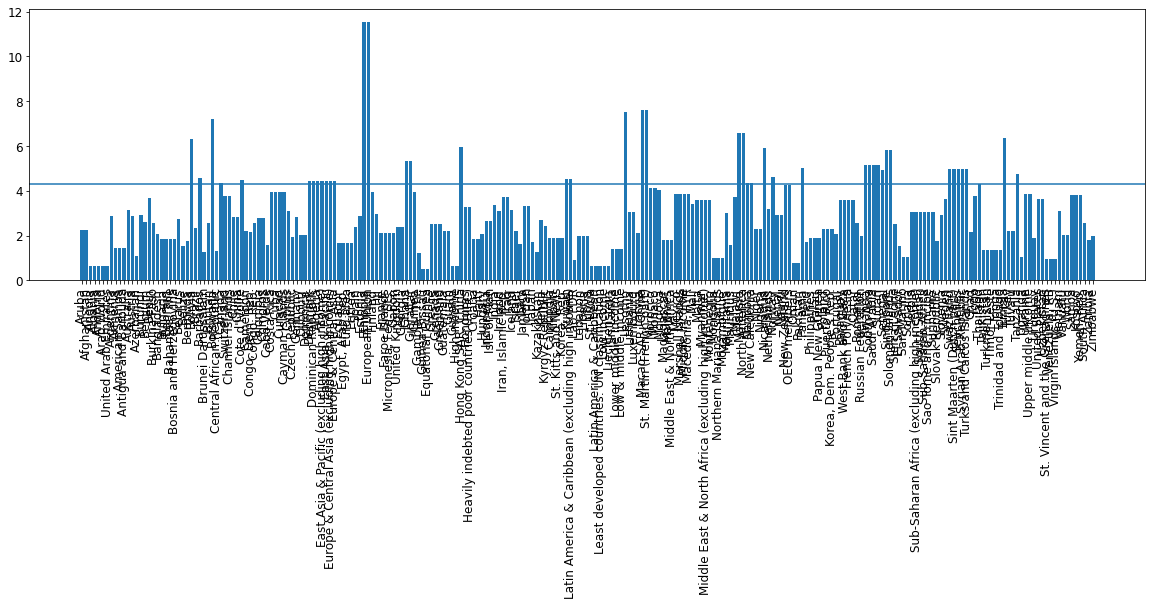

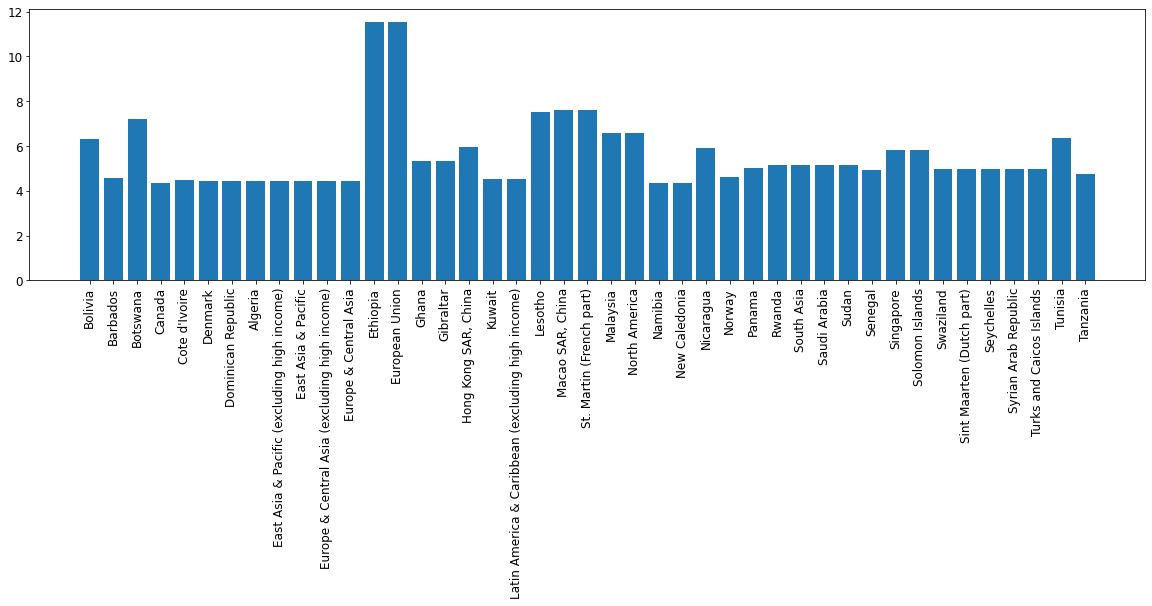

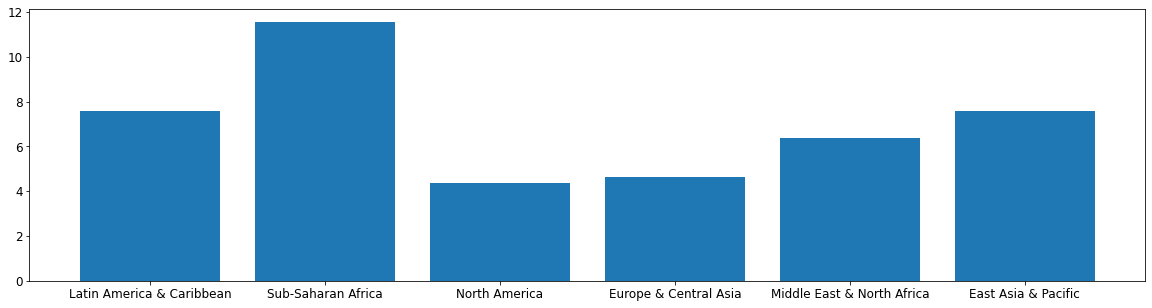

In [142]:
x=DataCountry_dep_sup_gouv['Country Name']
y=DataCountry_dep_sup_gouv['mean_sup_gouv']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=4.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
A = DataCountry_dep_sup_gouv[DataCountry_dep_sup_gouv['mean_sup_gouv']>4.3] 
plt.bar(A['Country Name'],A['mean_sup_gouv'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(A['Region'],A['mean_sup_gouv'])

#### La région dui domine est : Sub-Saharan Africa

### Dépense pour l'éducation secondaire du gouv

In [143]:
# Appel à la fonction 
outliers2= detect_outliers(DataCountry_dep_sec_gouv['mean_sec_gouv'])
outliers2[1]

[2.3848527296546287,
 2.3848527296546287,
 2.5453500747680695,
 2.5453500747680695,
 2.5453500747680695,
 2.5453500747680695,
 2.5453500747680695,
 2.44063329696655,
 2.44063329696655,
 2.44063329696655,
 2.44063329696655,
 2.19308670361837,
 2.297223409016923,
 2.297223409016923,
 2.297223409016923,
 2.297223409016923,
 2.7452199459075897,
 1.07030999660492,
 1.07030999660492,
 2.81707501411438,
 2.81707501411438,
 2.81707501411438,
 2.81707501411438,
 2.81707501411438,
 2.0526933272679666,
 3.493030071258545,
 2.5892400145530696,
 1.65422336260478,
 1.65422336260478,
 1.65422336260478,
 2.74972009658813,
 2.74972009658813,
 0.7767699956893921,
 0.7767699956893921,
 3.042649984359743,
 3.042649984359743,
 3.7816133499145503,
 3.7816133499145503,
 3.7816133499145503,
 2.6942999362945597,
 1.6352000236511202,
 4.1013699769973755,
 1.3324149847030649,
 1.3324149847030649,
 1.3324149847030649,
 1.6808499693870549,
 1.6808499693870549,
 1.6808499693870549,
 1.6808499693870549,
 3.720503330

<BarContainer object of 39 artists>

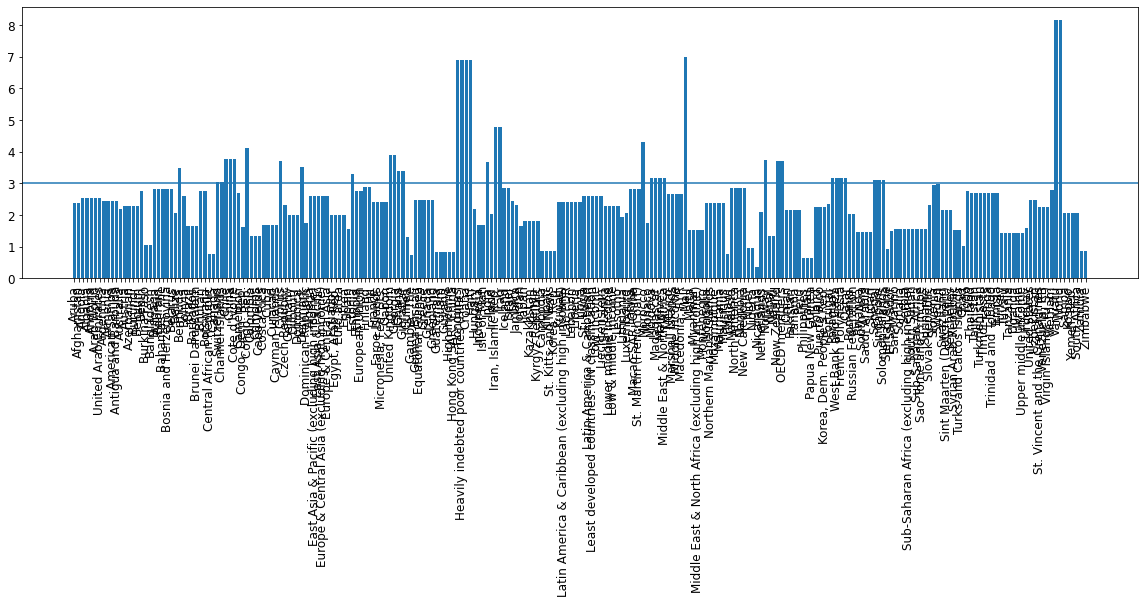

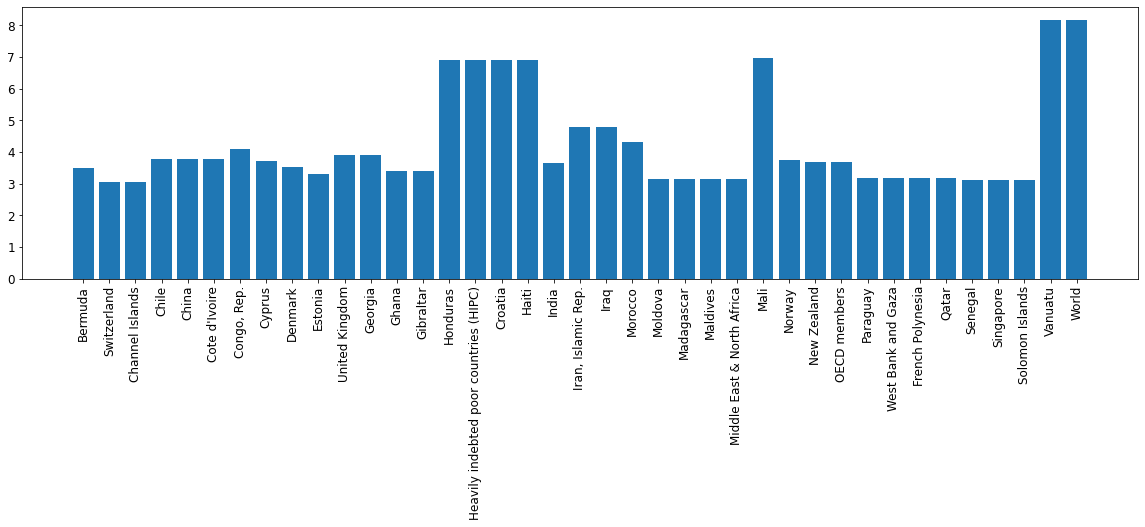

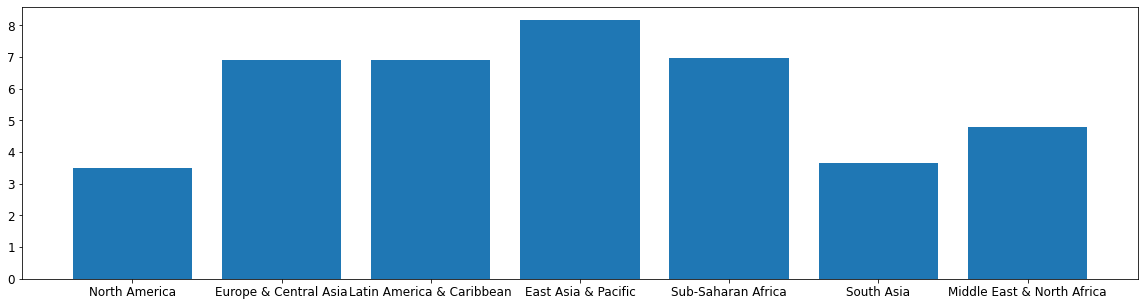

In [144]:
x=DataCountry_dep_sec_gouv['Country Name']
y=DataCountry_dep_sec_gouv['mean_sec_gouv']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
B = DataCountry_dep_sec_gouv[DataCountry_dep_sec_gouv['mean_sec_gouv']>3] 
plt.bar(B['Country Name'],B['mean_sec_gouv'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(B['Region'],B['mean_sec_gouv'])

#### La région dui domine est : East Asia & Pacific

### Dépense pour l'éducation sup par rapport au pib

In [145]:
# Appel à la fonction 
outliers3= detect_outliers(DataCountry_dep_sup_pib['mean_sup_pib'])
outliers3[1]

[0.5183249861001965,
 0.5183249861001965,
 0.175620004534721,
 0.175620004534721,
 0.09025500155985375,
 0.09025500155985375,
 0.09025500155985375,
 0.7698766787846884,
 0.37863999605178794,
 0.37863999605178794,
 0.37863999605178794,
 1.15909000237783,
 1.47510000069936,
 0.27614333728949236,
 0.8310700058937078,
 1.3361250162124652,
 0.727696657180786,
 0.583279997110367,
 0.23765999823808653,
 0.6368100047111516,
 0.6368100047111516,
 0.6368100047111516,
 0.6368100047111516,
 1.2112050056457495,
 0.4510499984025955,
 0.356539994478226,
 1.924299955368045,
 0.881903330485026,
 1.6441933314005566,
 0.49895998835563704,
 0.801945000886917,
 2.9757900238037096,
 0.246619999408722,
 1.90082001686096,
 1.2247933149337766,
 1.2247933149337766,
 0.6409066518147787,
 0.6409066518147787,
 0.8187699913978574,
 0.347240000963211,
 0.384550005197525,
 0.5760250091552735,
 0.7722200155258193,
 0.7722200155258193,
 0.590690016746521,
 1.054330021142959,
 1.8414600491523752,
 1.8414600491523752,
 1

<BarContainer object of 59 artists>

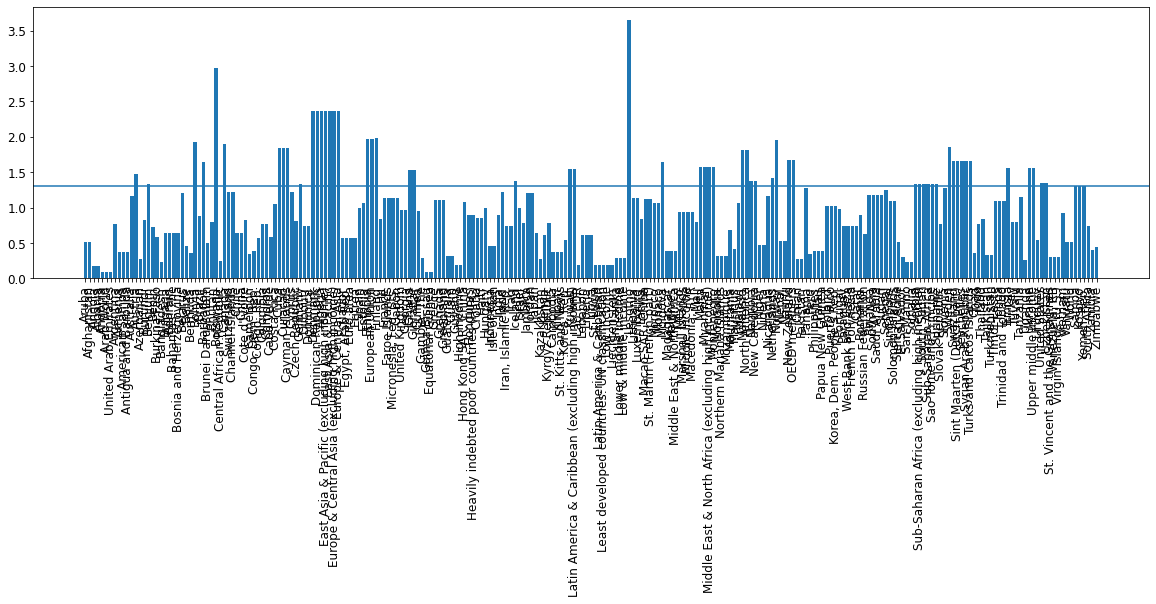

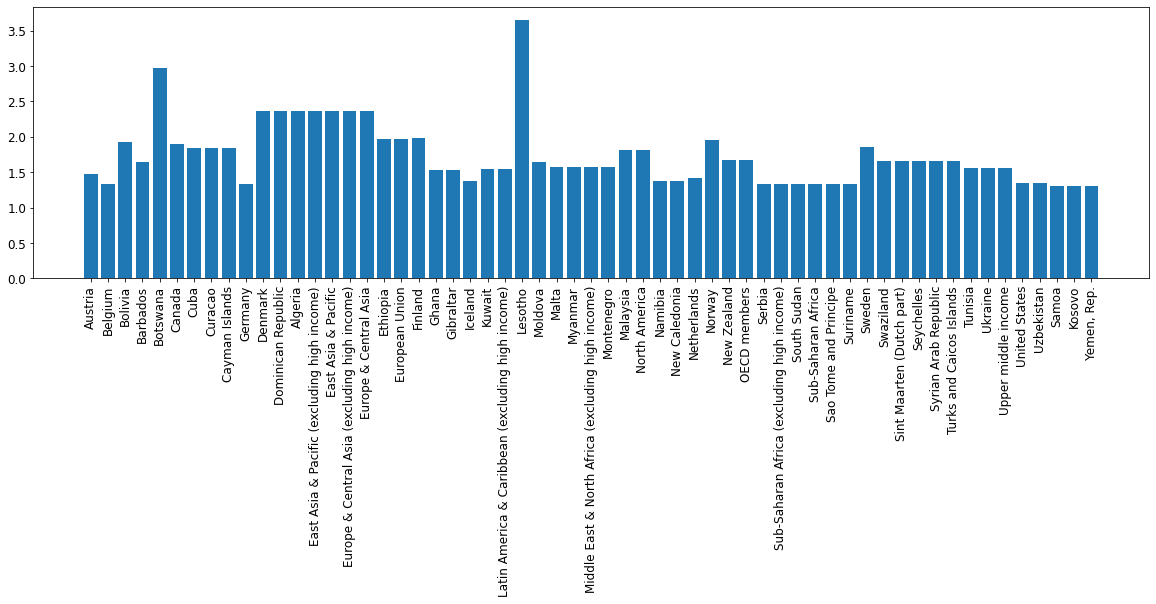

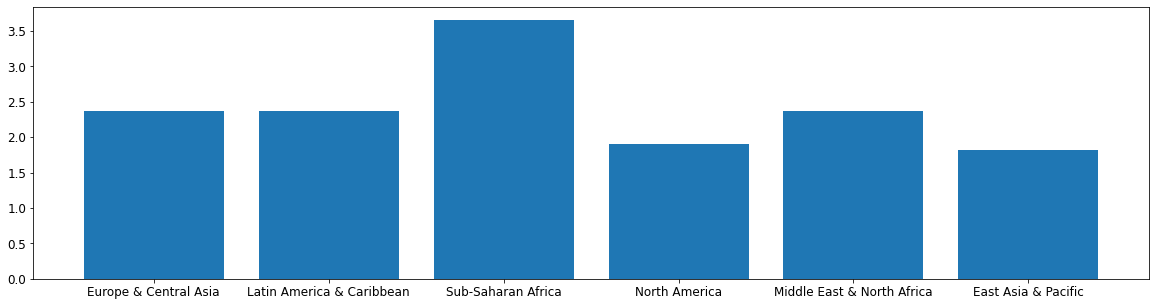

In [146]:
x=DataCountry_dep_sup_pib['Country Name']
y=DataCountry_dep_sup_pib['mean_sup_pib']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=1.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
C = DataCountry_dep_sup_pib[DataCountry_dep_sup_pib['mean_sup_pib']>1.3] 
plt.bar(C['Country Name'],C['mean_sup_pib'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(C['Region'],C['mean_sup_pib'])

#### La région dui domine est : Sub-Saharan Africa

### Dépense pour l'éducation secondaire par rapport au pib

In [147]:
# Appel à la fonction 
outliers4= detect_outliers(DataCountry_dep_sec_pib['mean_sec_pib'])
outliers4[1]

[1.279419958591465,
 1.279419958591465,
 1.17068004608154,
 1.17068004608154,
 0.48588000237941753,
 0.48588000237941753,
 0.48588000237941753,
 1.6366599798202532,
 1.6366599798202532,
 1.6366599798202532,
 1.6366599798202532,
 1.9628366231918333,
 2.501383304595947,
 2.501383304595947,
 1.3419066667556747,
 2.605030059814455,
 1.113800009091696,
 0.5833700001239774,
 0.871460020542145,
 1.7865399718284598,
 1.7865399718284598,
 1.7865399718284598,
 1.7865399718284598,
 1.7865399718284598,
 2.1592766841252633,
 1.120379984378815,
 1.504445016384125,
 1.9242466290791835,
 1.7150466839472467,
 0.95744001865387,
 2.88704001903534,
 4.23042011260986,
 0.289029985666275,
 0.289029985666275,
 1.9653966824213664,
 1.9653966824213664,
 1.29598335425059,
 1.29598335425059,
 1.2098100185394298,
 1.6855849623680101,
 0.5405700206756591,
 2.036905050277708,
 1.4283200105031302,
 1.4283200105031302,
 1.4283200105031302,
 1.688515067100525,
 3.5461733341217063,
 3.5461733341217063,
 3.5461733341217

<BarContainer object of 36 artists>

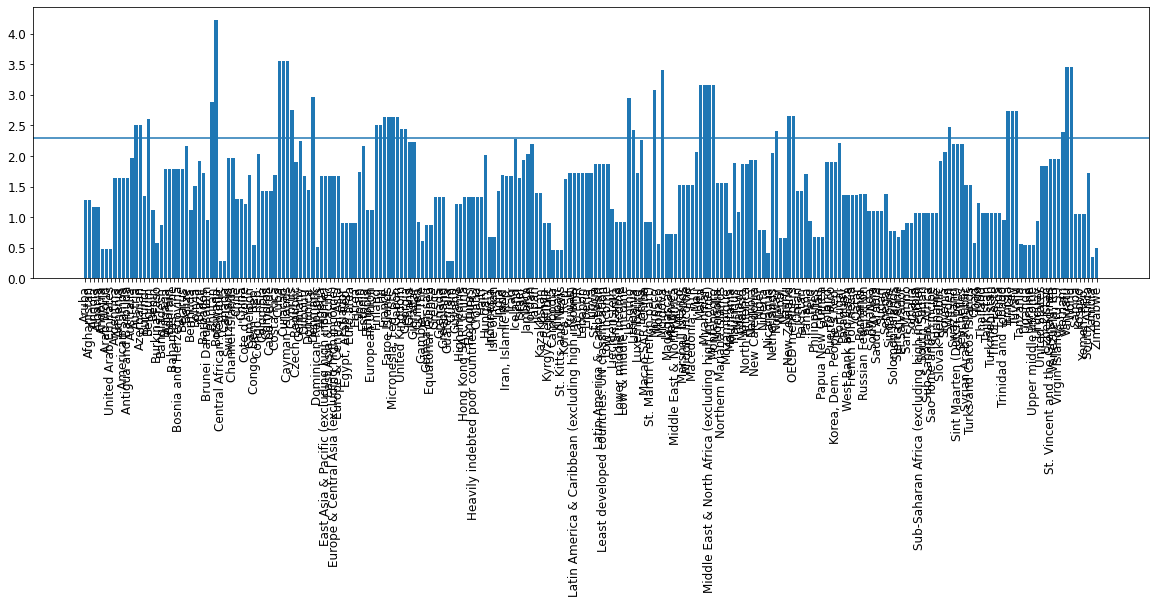

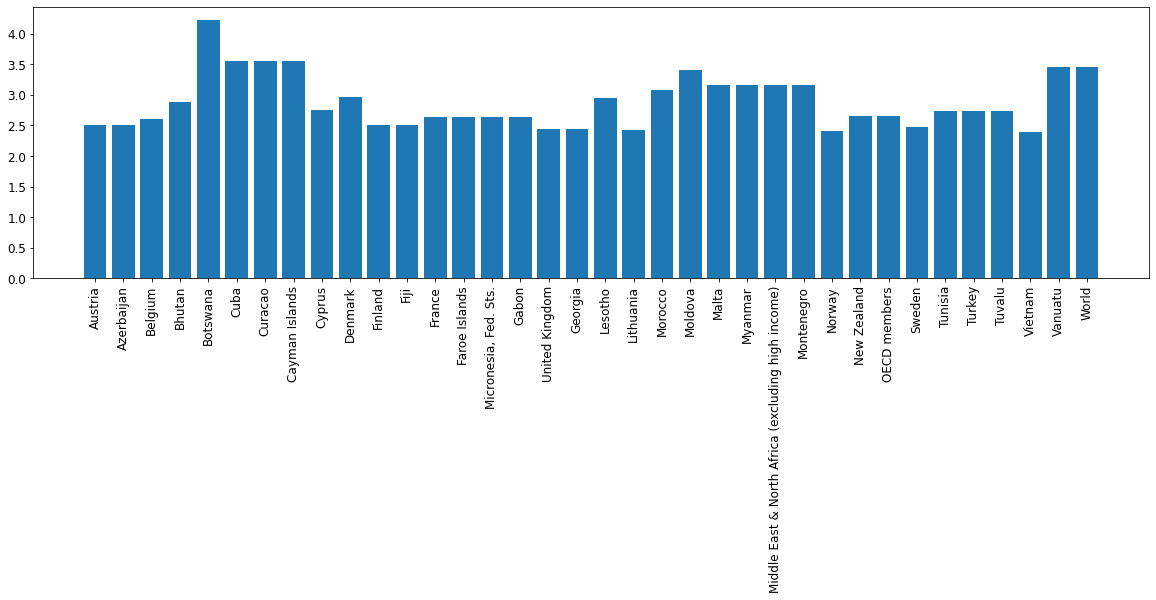

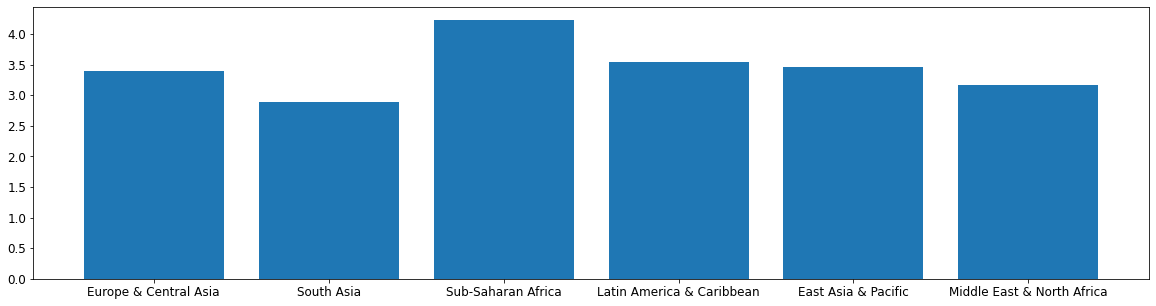

In [148]:
x=DataCountry_dep_sec_pib['Country Name']
y=DataCountry_dep_sec_pib['mean_sec_pib']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=2.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
D = DataCountry_dep_sec_pib[DataCountry_dep_sec_pib['mean_sec_pib']>2.3] 
plt.bar(D['Country Name'],D['mean_sec_pib'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(D['Region'],D['mean_sec_pib'])

#### La région dui domine est : Sub-Saharan Africa

### Ordinateurs personnels

In [149]:
# Appel à la fonction 
outliers5= detect_outliers(DataCountry_comp['mean_comp'])
outliers5[1]

[7.92354370145255,
 0.34190296351432803,
 0.3361192937541895,
 1.222992422556351,
 1.222992422556351,
 2.67031273223375,
 14.477314504409762,
 5.0697748763409844,
 5.331867693920846,
 5.331867693920846,
 14.6551202083207,
 29.717225274875563,
 29.899608238895773,
 2.27363016410075,
 0.383873251274482,
 21.629836862237177,
 0.19503431297375792,
 0.1908964758575113,
 0.8615085461844785,
 3.09611532816663,
 24.93724588157922,
 12.1548035783742,
 5.4641597514116595,
 0.8175668726462059,
 10.183709777361841,
 40.156074404924155,
 1.4423854417943183,
 5.739028083675754,
 9.518426786604635,
 6.544181020641897,
 1.3116609895339715,
 2.983356063176462,
 0.23393656832881848,
 40.52079762545667,
 47.4686303909688,
 47.4686303909688,
 6.869877067318184,
 1.6741931718875915,
 1.2074416304435165,
 0.5200570790113224,
 0.0222107043267914,
 0.4440766320788585,
 3.2874955594454662,
 0.3776208232533572,
 8.570644633011245,
 19.2081139249877,
 2.2753226488656,
 2.2753226488656,
 2.2753226488656,
 11.9163

<BarContainer object of 21 artists>

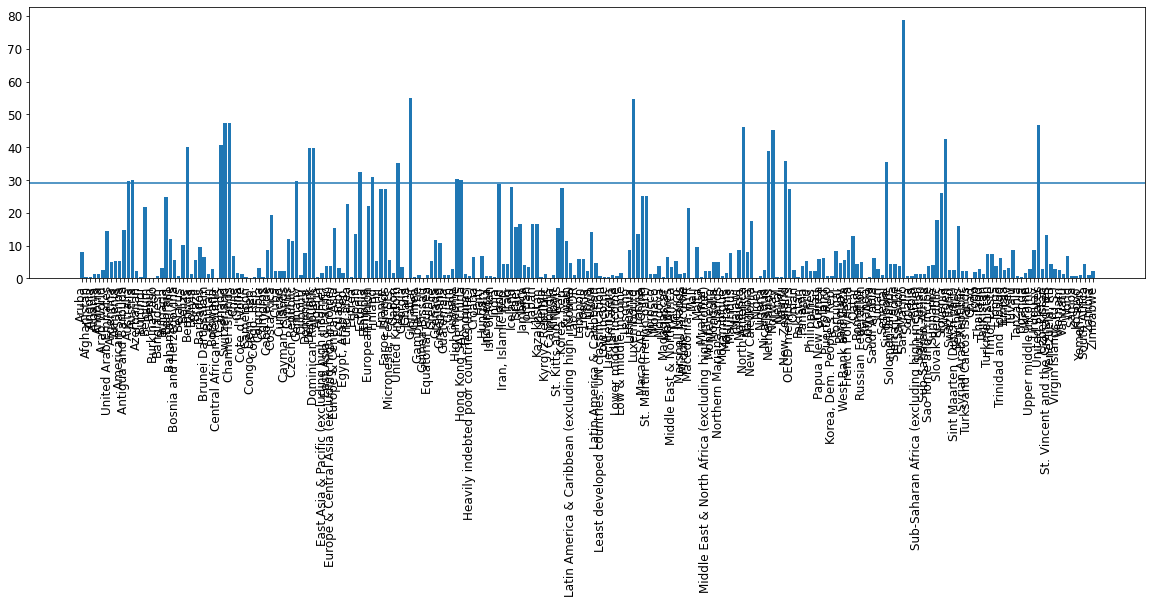

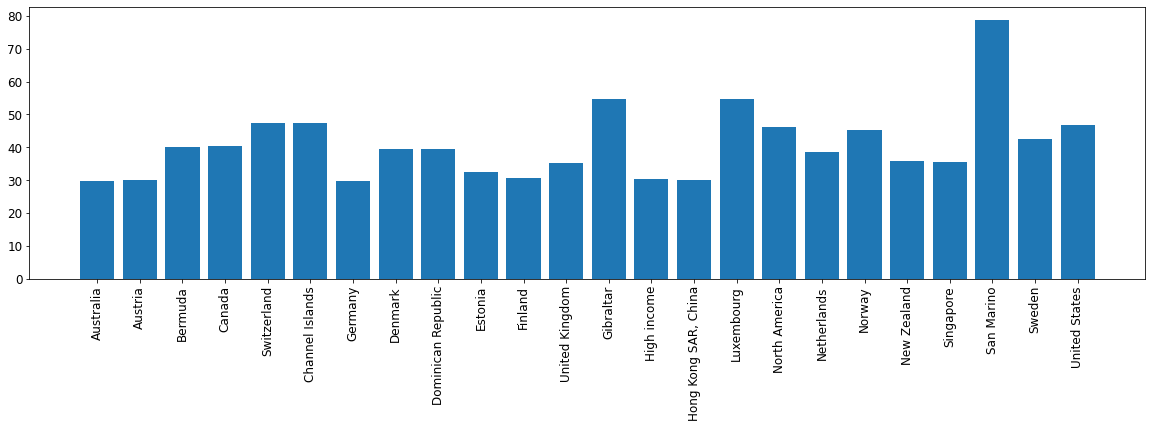

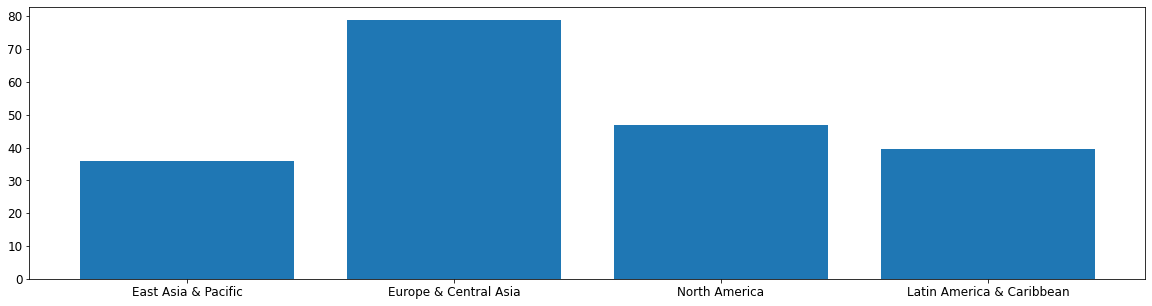

In [150]:
x=DataCountry_comp['Country Name']
y=DataCountry_comp['mean_comp']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=29)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
E = DataCountry_comp[DataCountry_comp['mean_comp']>29] 
plt.bar(E['Country Name'],E['mean_comp'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
#suppression les lignes contennat les valeurs manquentes du champs Region
E.drop([287954,328269,577489],inplace=True)
plt.bar(E['Region'],E['mean_comp'])

#### La région dui domine est : Europe & Central Asia

### Utilisateurs d'internet

In [185]:
# Appel à la fonction 
outliers6= detect_outliers(DataCountry_int['mean_int'])
outliers6[1]

[0.008638749876193823,
 0.0008110267653293432,
 0.000741988070634001,
 0.0041292654146460545,
 0.010197325669068804,
 0.0016373562254823834,
 0.008019774756575098,
 0.004976125332014561,
 0.003273491854366373,
 0.003273491854366373,
 0.005510025301280854,
 0.009854779628335024,
 0.009120540065287563,
 0.004734031840140811,
 0.0002340529613894115,
 0.008888341488160085,
 0.0007164041446839874,
 0.0006466358113876142,
 0.0008305960583365844,
 0.004631783702992716,
 0.006361665452939519,
 0.0055921990038116055,
 0.005874458659430795,
 0.004554456489774641,
 0.003348939549323324,
 0.010745879526138988,
 0.0023348734676859,
 0.004437977860081978,
 0.007134290152631246,
 0.006159492616695693,
 0.0026005042473502033,
 0.0017878646446199905,
 0.00027614498499189976,
 0.010678208241539077,
 0.010542428462571985,
 0.010542428462571985,
 0.005680661435581675,
 0.0034249009268124335,
 0.0009330954815520964,
 0.0012015016338459545,
 0.00021490136161876494,
 0.0006363105188935737,
 0.003818393436688

<BarContainer object of 47 artists>

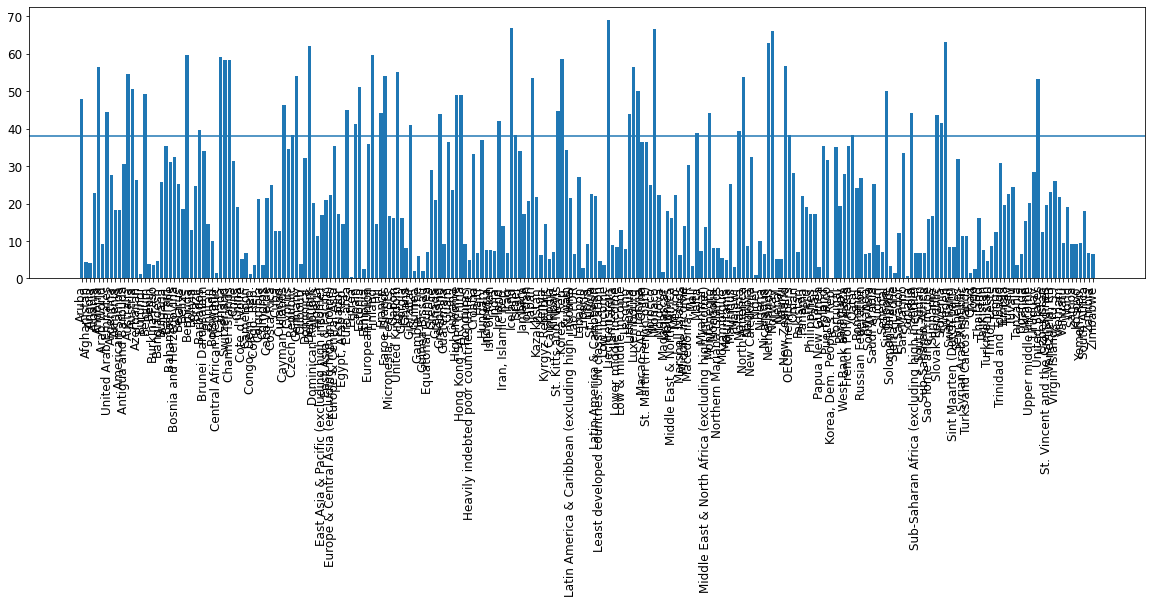

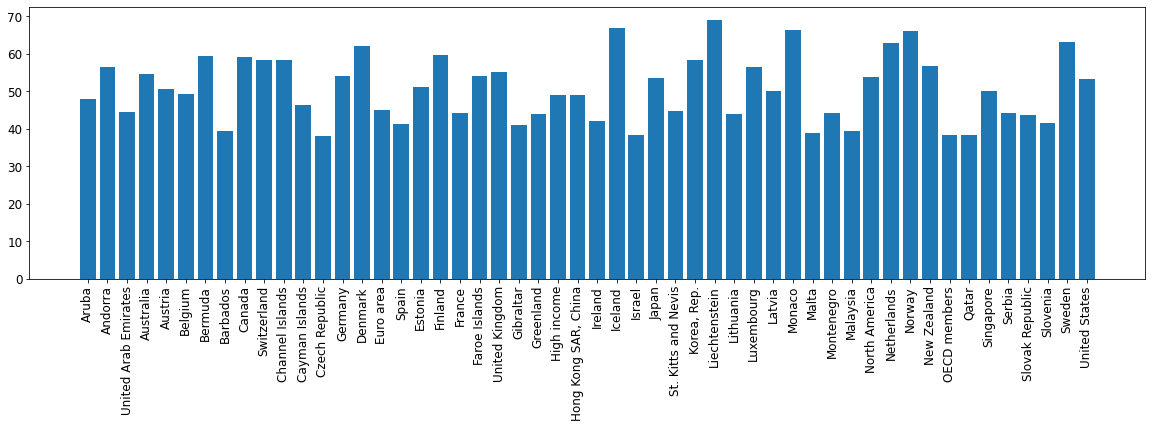

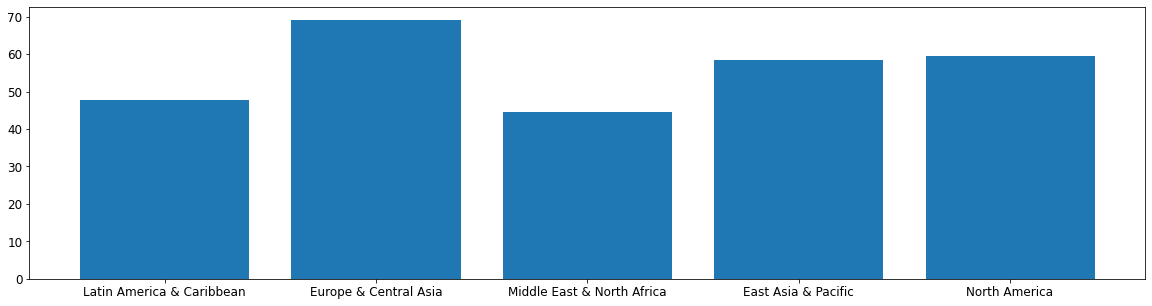

In [152]:
x=DataCountry_int['Country Name']
y=DataCountry_int['mean_int']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=38)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
F = DataCountry_int[DataCountry_int['mean_int']>38] 
plt.bar(F['Country Name'],F['mean_int'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
#suppression les lignes contennat les valeurs manquentes du champs Region
F.drop([232270,287245,327560,576780,617095],inplace=True)
plt.bar(F['Region'],F['mean_int'])

#### La région dui domine est : Europe & Central Asia

## Population âgé de 15 à 19 ans

In [153]:
# Appel à la fonction 
outliers7= detect_outliers(DataCountry_pop['mean_pop'])
outliers7[1]

[1.5025,
 1.5025,
 1.5025,
 29.064999999999998,
 29.064999999999998,
 29.064999999999998,
 292.0075,
 558.22,
 107.7775,
 107.7775,
 107.7775,
 1113.0900000000001,
 91.2175,
 290.4275,
 7.19,
 259.195,
 67.91,
 77.4275,
 1976.0425,
 94.785,
 37.09,
 3.0925,
 52.7525,
 207.5975,
 3.31,
 3.31,
 286.015,
 3361.3025,
 3361.3025,
 3361.3025,
 6.875,
 6.875,
 2.195,
 1544.9925,
 60.727500000000006,
 60.727500000000006,
 498.5975,
 33568.1525,
 32.75,
 106.17,
 420.54999999999995,
 6.3575,
 1372.3625,
 0.42000000000000004,
 10.840000000000002,
 67.44749999999999,
 120.11000000000001,
 120.11000000000001,
 120.11000000000001,
 44.53,
 256.28499999999997,
 310.7575,
 310.7575,
 310.7575,
 29.665,
 290.90999999999997,
 1332.2649999999999,
 1332.2649999999999,
 1332.2649999999999,
 1332.2649999999999,
 1332.2649999999999,
 275.95000000000005,
 3612.9125,
 3612.9125,
 3612.9125,
 702.615,
 13.2825,
 548.115,
 548.115,
 44.7225,
 44.7225,
 2097.9975,
 2097.9975,
 2097.9975,
 4.01,
 875.2525,
 91.93

<BarContainer object of 34 artists>

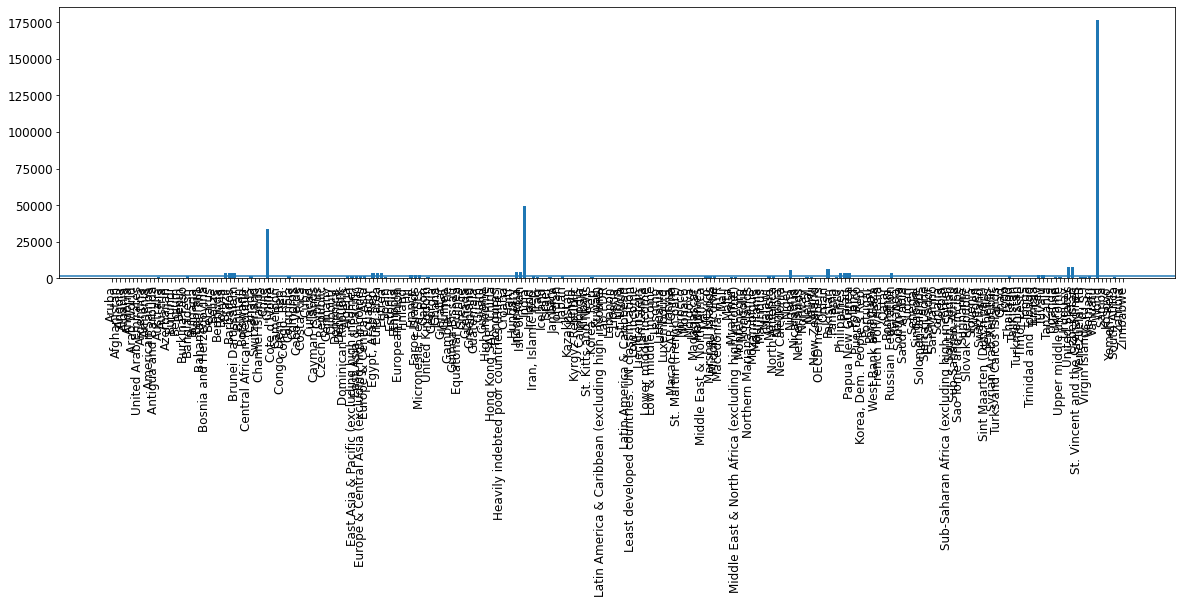

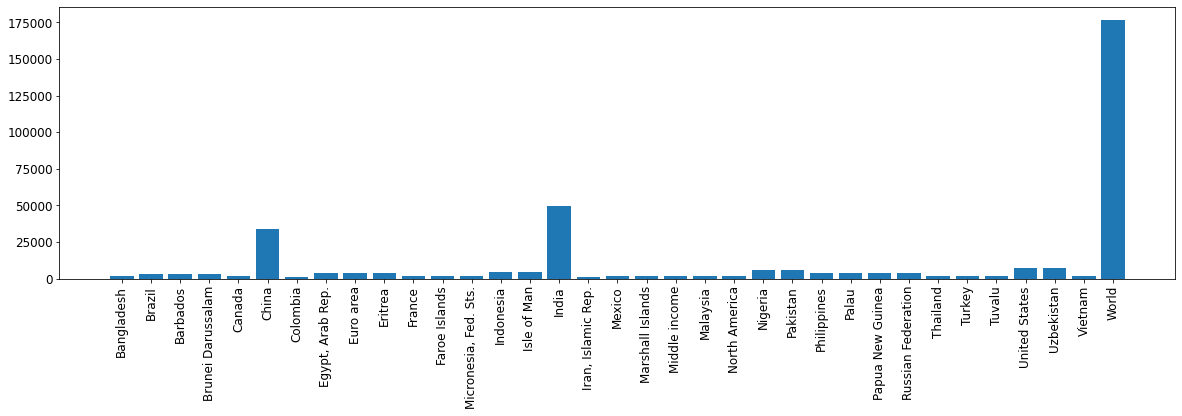

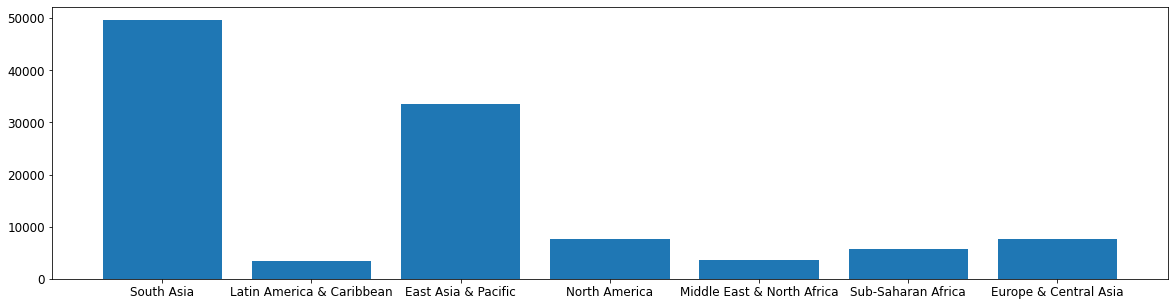

In [154]:
x=DataCountry_pop['Country Name']
y=DataCountry_pop['mean_pop']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=1372.3)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
G = DataCountry_pop[DataCountry_pop['mean_pop']>1372.3] 
plt.bar(G['Country Name'],G['mean_pop'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
#suppression les lignes contennat les valeurs manquentes du champs Region
G.drop([861212],inplace=True)
plt.bar(G['Region'],G['mean_pop'])

#### La région qui domine est : South Asia

## Nombre moyen d'années de scolarisé

In [155]:
# Appel à la fonction 
outliers8= detect_outliers(DataCountry_mean['mean_ann'])
outliers8[1]

[9.725,
 9.725,
 9.725,
 10.399999999999999,
 10.399999999999999,
 10.399999999999999,
 11.075,
 11.025,
 10.625,
 10.625,
 10.625,
 13.950000000000001,
 12.8,
 11.175,
 6.125,
 13.4,
 7.275,
 4.4,
 8.8,
 11.749999999999998,
 11.674999999999999,
 10.600000000000001,
 12.8,
 11.475,
 9.2,
 9.2,
 11.175,
 9.725,
 9.725,
 9.725,
 9.700000000000001,
 9.700000000000001,
 6.725,
 13.675,
 12.675,
 12.675,
 12.2,
 10.75,
 7.05,
 8.9,
 8.075,
 8.725,
 11.075,
 7.925,
 8.775,
 10.35,
 11.45,
 11.45,
 11.45,
 13.125,
 13.424999999999999,
 12.950000000000001,
 12.950000000000001,
 12.950000000000001,
 11.55,
 11.399999999999999,
 11.95,
 11.95,
 11.95,
 11.95,
 11.95,
 11.125,
 11.775,
 11.775,
 11.775,
 12.25,
 12.3,
 7.2,
 7.2,
 11.475,
 11.475,
 12.5,
 12.5,
 12.5,
 8.8,
 12.825,
 14.100000000000001,
 9.275,
 9.275,
 5.625,
 8.25,
 6.825,
 9.95,
 12.375000000000002,
 12.375000000000002,
 12.375000000000002,
 7.975,
 7.975,
 10.8,
 10.8,
 13.775,
 8.275,
 8.275,
 12.0,
 9.075,
 11.9,
 10.9,
 10

<BarContainer object of 68 artists>

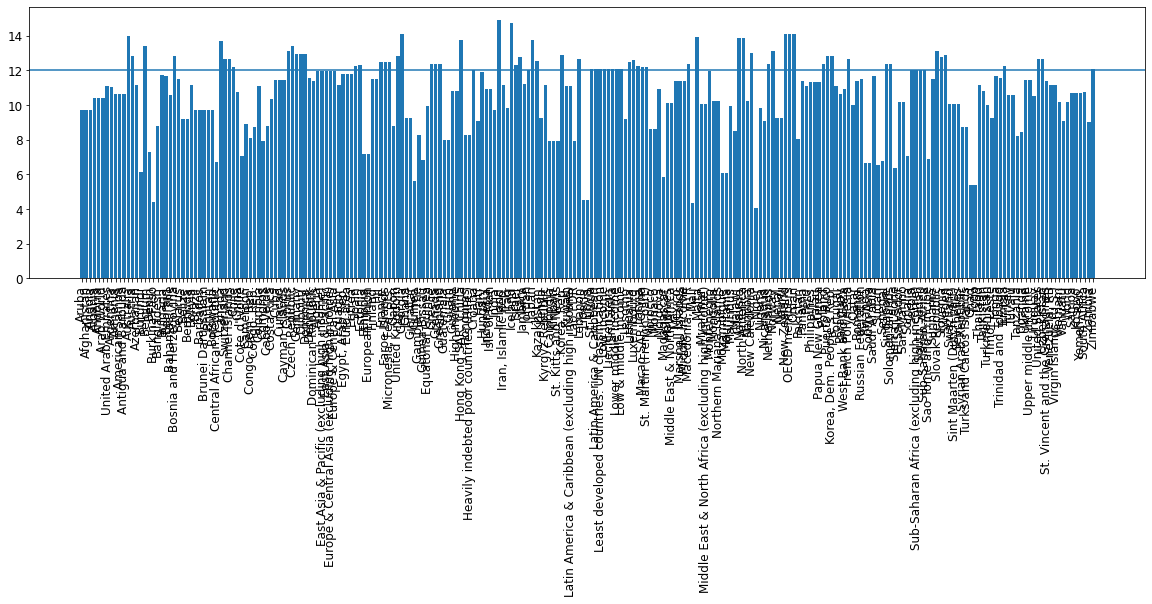

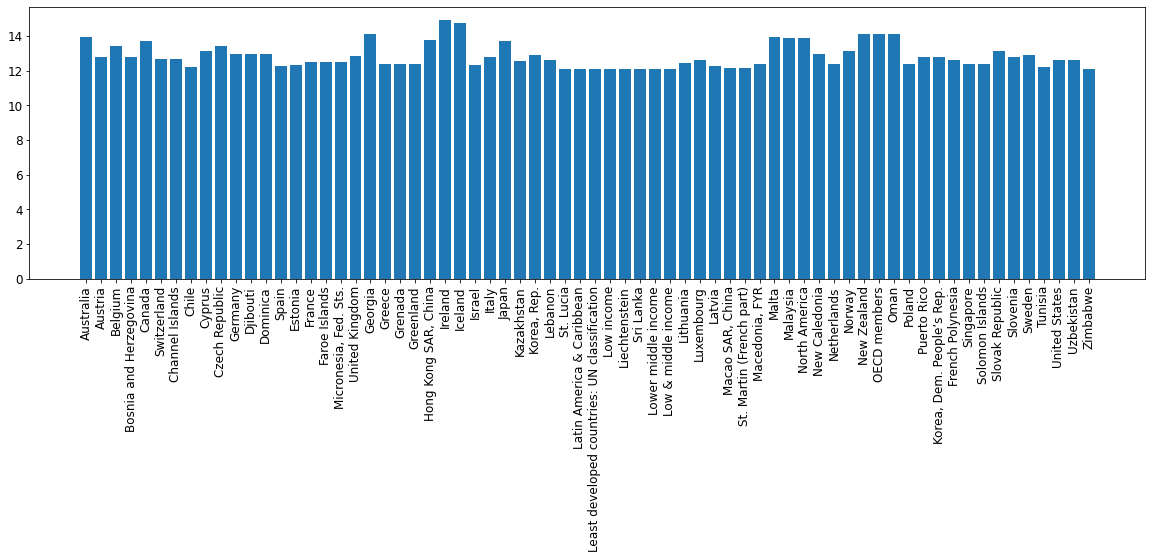

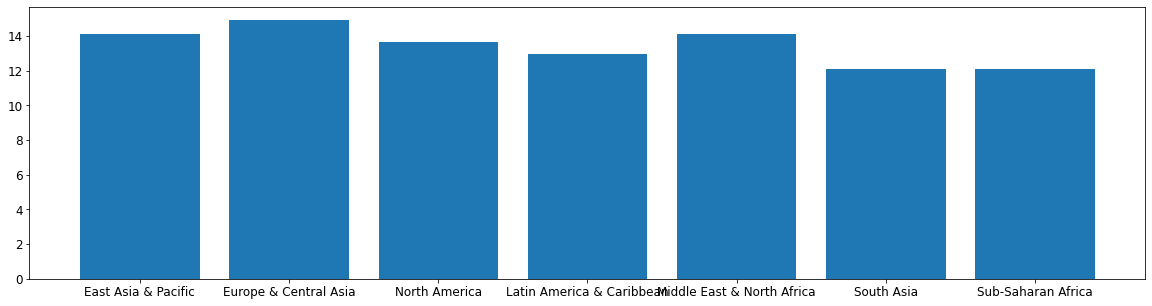

In [156]:
x=DataCountry_mean['Country Name']
y=DataCountry_mean['mean_ann']
plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
plt.xticks(rotation=90)
plt.bar(x,y)
plt.axhline(y=12)

plt.figure(figsize=(20,5))
plt.rcParams.update({"font.size":12})
H = DataCountry_mean[DataCountry_mean['mean_ann']>12] 
plt.bar(H['Country Name'],H['mean_ann'])
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.bar(H['Region'],H['mean_ann'])

#### La région qui domine est : Europe & Central Asia

#### Un score est une note de risque que l’on calcule comme combinaison linéaire des variables explicatives        les Xi sont  les moyens  des indicateurs et les ai sont les scores associes à chaque indicateur       P est le nombre des indicateurs , dans notre cas est 8

In [157]:
DataCountry_dep_sup_gouv['mean_sup_gouv']

1239      2.23965
4904      2.23965
8569      0.66205
12234     0.66205
15899     0.66205
           ...   
866179    3.80753
869844    3.80753
873509    2.57143
877174    1.80593
880839    1.98968
Name: mean_sup_gouv, Length: 241, dtype: float64

## Selectionnons 20 pays 

### Dépenses pour l'enseignement supérieur par rapport des dépenses publiques totales : 2

### Dépenses pour l'enseignement secondaire par rapport des dépenses publiques totales: 2

### Dépenses publiques pour l'enseignement supérieur par rapport au PIB :2

### Dépenses publiques pour l'enseignement secondaire par rapport au PIB :2

### Ordinateurs personnels:5

### Nombre d'internautes:5

### Population âgée de 15 à 19:4

### Nombre moyen d'années de scolarité:5

## Normalisation des variables avant la ponderation 

In [158]:
###### Normalisation des variables 

(array([ 2., 12.,  2.,  1.,  8.,  2.,  2.,  7.,  6.,  4.,  6.,  7., 14.,
        10.,  9.,  9.,  6.,  4., 10.,  3.,  3., 10.,  2., 13.,  1.,  5.,
         1.,  4.,  8.,  9.,  7.,  6.,  2.,  0.,  6.,  8.,  3.,  1.,  1.,
         0.,  7.,  0.,  4.,  2.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,
         1.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.00070558, 0.00086182, 0.00101806, 0.0011743 , 0.00133055,
        0.00148679, 0.00164303, 0.00179927, 0.00195551, 0.00211176,
        0.002268  , 0.00242424, 0.00258048, 0.00273672, 0.00289297,
        0.00304921, 0.00320545, 0.00336169, 0.00351793, 0.00367418,
        0.00383042, 0.00398666, 0.0041429 , 0.00429914, 0.00445539,
        0.00461163, 0.00476787, 0.00492411, 0.00508035, 0.0052366 ,
        0.00539284, 0.0055

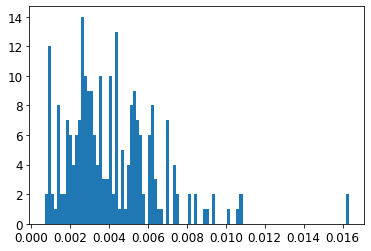

In [203]:
plt.hist(DataCountry_dep_sup_gouv['mean_sup_gouv'], bins=100)

In [160]:
# Vous pouvez spécifier l'ordre pour obtenir la norme L1. 
#Pour éviter la division zéro, j'utilise eps, mais ce n'est peut-être pas génial.

def normalize(v):
    norm=np.linalg.norm(v, ord=1)
    if norm==0:
        norm=np.finfo(v.dtype).eps
    return v/norm

In [161]:
# Normisalisation des indicateurs puis udpdate
DataCountry_dep_sup_gouv['mean_sup_gouv']=normalize(DataCountry_dep_sup_gouv['mean_sup_gouv'])
DataCountry_dep_sec_gouv['mean_sec_gouv']=normalize(DataCountry_dep_sec_gouv['mean_sec_gouv'])
DataCountry_dep_sup_pib['mean_sup_pib']=normalize(DataCountry_dep_sup_pib['mean_sup_pib'])
DataCountry_dep_sec_pib['mean_sec_pib']=normalize(DataCountry_dep_sec_pib['mean_sec_pib'])
DataCountry_comp['mean_comp']=normalize(DataCountry_comp['mean_comp'])
DataCountry_int['mean_int']=normalize(DataCountry_int['mean_int'])
DataCountry_mean['mean_ann']=normalize(DataCountry_mean['mean_ann'])
DataCountry_pop['mean_pop']=normalize(DataCountry_pop['mean_pop'])

In [162]:
DataCountry_dep_sec_pib['mean_sec_pib']

1265      0.003412
4930      0.003412
8595      0.003122
12260     0.003122
15925     0.001296
            ...   
866205    0.002822
869870    0.002822
873535    0.004582
877200    0.000950
880865    0.001348
Name: mean_sec_pib, Length: 241, dtype: float64

(array([ 2., 12.,  2.,  1.,  8.,  2.,  2.,  7.,  6.,  4.,  6.,  7., 14.,
        10.,  9.,  9.,  6.,  4., 10.,  3.,  3., 10.,  2., 13.,  1.,  5.,
         1.,  4.,  8.,  9.,  7.,  6.,  2.,  0.,  6.,  8.,  3.,  1.,  1.,
         0.,  7.,  0.,  4.,  2.,  0.,  0.,  0.,  2.,  0.,  2.,  0.,  0.,
         1.,  1.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  2.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.00070558, 0.00086182, 0.00101806, 0.0011743 , 0.00133055,
        0.00148679, 0.00164303, 0.00179927, 0.00195551, 0.00211176,
        0.002268  , 0.00242424, 0.00258048, 0.00273672, 0.00289297,
        0.00304921, 0.00320545, 0.00336169, 0.00351793, 0.00367418,
        0.00383042, 0.00398666, 0.0041429 , 0.00429914, 0.00445539,
        0.00461163, 0.00476787, 0.00492411, 0.00508035, 0.0052366 ,
        0.00539284, 0.0055

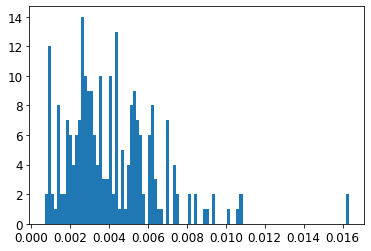

In [202]:
plt.hist(DataCountry_dep_sup_gouv['mean_sup_gouv'], bins=100)

### Ponderation & Scoring

In [164]:
DataCountry_dep_sup_gouv['score_mean_dep_sup_gouv']=DataCountry_dep_sup_gouv['mean_sup_gouv']*2
DataCountry_dep_sec_gouv['score_mean_dep_sec_gouv']=DataCountry_dep_sec_gouv['mean_sec_gouv']*2
DataCountry_dep_sup_pib['score_mean_dep_sup_pib']=DataCountry_dep_sup_pib['mean_sup_pib']*2
DataCountry_dep_sec_pib['score_mean_dep_sec_pib']=DataCountry_dep_sec_pib['mean_sec_pib']*2
DataCountry_comp['score_mean_comp']=DataCountry_comp['mean_comp']*5
DataCountry_int['score_mean_int']=DataCountry_int['mean_int']*5
DataCountry_mean['score_mean_ann']=DataCountry_mean['mean_ann']*5
DataCountry_pop['score_mean_pop']=DataCountry_pop['mean_pop']*4

In [165]:
print(DataCountry_dep_sup_gouv['score_mean_dep_sup_gouv'])

1239      0.006329
4904      0.006329
8569      0.001871
12234     0.001871
15899     0.001871
            ...   
866179    0.010760
869844    0.010760
873509    0.007267
877174    0.005103
880839    0.005623
Name: score_mean_dep_sup_gouv, Length: 241, dtype: float64


In [166]:
print(DataCountry_dep_sec_gouv['score_mean_dep_sec_gouv'])

1241      0.008299
4906      0.008299
8571      0.008857
12236     0.008857
15901     0.008857
            ...   
866181    0.007193
869846    0.007193
873511    0.007193
877176    0.002998
880841    0.002998
Name: score_mean_dep_sec_gouv, Length: 241, dtype: float64


In [167]:
print(DataCountry_dep_sup_pib['score_mean_dep_sup_pib'])

1266      0.004601
4931      0.004601
8596      0.001559
12261     0.001559
15926     0.000801
            ...   
866206    0.011576
869871    0.011576
873536    0.006610
877201    0.003524
880866    0.003996
Name: score_mean_dep_sup_pib, Length: 241, dtype: float64


In [168]:
print(DataCountry_dep_sec_pib['score_mean_dep_sec_pib'])

1265      0.006825
4930      0.006825
8595      0.006245
12260     0.006245
15925     0.002592
            ...   
866205    0.005645
869870    0.005645
873535    0.009165
877200    0.001901
880865    0.002695
Name: score_mean_dep_sec_pib, Length: 241, dtype: float64


In [169]:
print(DataCountry_comp['score_mean_comp'])

2084      0.018057
5749      0.000779
9414      0.000766
13079     0.002787
16744     0.002787
            ...   
867024    0.001957
870689    0.002491
874354    0.010268
878019    0.002091
881684    0.004871
Name: score_mean_comp, Length: 241, dtype: float64


In [170]:
print(DataCountry_int['score_mean_int'])

1375      0.043194
5040      0.004055
8705      0.003710
12370     0.020646
16035     0.050987
            ...   
866315    0.008193
869980    0.008473
873645    0.016137
877310    0.006144
880975    0.005765
Name: score_mean_int, Length: 241, dtype: float64


In [171]:
print(DataCountry_mean['score_mean_ann'])

3361      0.019022
7026      0.019022
10691     0.019022
14356     0.020342
18021     0.020342
            ...   
868301    0.020880
871966    0.020880
875631    0.021027
879296    0.017604
882961    0.023619
Name: score_mean_ann, Length: 241, dtype: float64


In [172]:
# Liste des scores de 20 premiers pays
liste_score = [ DataCountry_dep_sup_gouv.loc[:,['Country Code','Country Name','Region','score_mean_dep_sup_gouv']],
               DataCountry_dep_sec_gouv.loc[:,['Country Name','score_mean_dep_sec_gouv']],
               DataCountry_dep_sup_pib.loc[:,['Country Name','score_mean_dep_sup_pib']],
               DataCountry_dep_sec_pib.loc[:,['Country Name','score_mean_dep_sec_pib']], 
               DataCountry_int.loc[:,['Country Name','score_mean_int']],
               DataCountry_comp.loc[:,['Country Name','score_mean_comp']],
               DataCountry_pop.loc[:,['Country Name','score_mean_pop']],
               DataCountry_mean.loc[:,['Country Name','score_mean_ann']]]
df=liste_score[0]
for d in liste_score[1:]:
    df=pd.merge(df,d,left_on='Country Name',right_on='Country Name')
df['score']=df.sum(axis=1)
df.sort_values(by='score', ascending=False).head(20)

Country Code     Country Name  ... score_mean_ann     score
234          WLD            World  ...       0.019951  1.844202
98           IND            India  ...       0.019022  0.552303
37           CHN            China  ...       0.021027  0.405343
227          USA    United States  ...       0.024695  0.294752
157          NAC    North America  ...       0.027091  0.252146
195          SMR       San Marino  ...       0.019853  0.245727
164          NOR           Norway  ...       0.025624  0.245222
78           GIB        Gibraltar  ...       0.018142  0.235884
131          LUX       Luxembourg  ...       0.024646  0.235179
54           DNK          Denmark  ...       0.022592  0.230793
205          SWE           Sweden  ...       0.025233  0.230520
35           CHI  Channel Islands  ...       0.024792  0.228848
34           CHE      Switzerland  ...       0.024792  0.228848
33           CAN           Canada  ...       0.026748  0.221068
167          NZL      New Zealand  ...       0.027580  0.216853
163          NLD      Netherlands  ...       0.024157  0.211378
75           GBR   United Kingdom  ...       0.025086  0.205790
69           FIN          Finland  ...       0.022445  0.199189
102          ISL          Iceland  ...       0.028851  0.195905
72           FRO    Faroe Islands  ...       0.024450  0.194454

[20 rows x 12 columns]

In [173]:
EdStatsCountrySeries.head()

CountryCode  ... Unnamed: 3
0         ABW  ...        NaN
1         ABW  ...        NaN
2         AFG  ...        NaN
3         AFG  ...        NaN
4         AFG  ...        NaN

[5 rows x 4 columns]

In [174]:
df['Country Code'].isin(EdStatsCountrySeries['CountryCode'])

0      True
1      True
2      True
3      True
4      True
       ... 
236    True
237    True
238    True
239    True
240    True
Name: Country Code, Length: 241, dtype: bool

In [175]:
pays_hors_normes=df[~df['Country Code'].isin(EdStatsCountrySeries['CountryCode'])][['Country Name','Country Code']].sort_values(by='Country Name')
pays_hors_normes

Country Name Country Code
5                                           Arab World          ARB
47                                             Curacao          CUW
58                                 East Asia & Pacific          EAS
57         East Asia & Pacific (excluding high income)          EAP
63                                           Euro area          EMU
60                               Europe & Central Asia          ECS
59       Europe & Central Asia (excluding high income)          ECA
68                                      European Union          EUU
92              Heavily indebted poor countries (HIPC)          HPC
89                                         High income          HIC
122                          Latin America & Caribbean          LCN
116  Latin America & Caribbean (excluding high income)          LAC
123       Least developed countries: UN classification          LDC
128                                Low & middle income          LMY
124                                         Low income          LIC
127                                Lower middle income          LMC
140                         Middle East & North Africa          MEA
148  Middle East & North Africa (excluding high inc...          MNA
143                                      Middle income          MIC
166                                              Nauru          NRU
157                                      North America          NAC
168                                       OECD members          OED
207                          Sint Maarten (Dutch part)          SXM
187                                         South Asia          SAS
199                                        South Sudan          SSD
134                           St. Martin (French part)          MAF
200                                 Sub-Saharan Africa          SSF
198         Sub-Saharan Africa (excluding high income)          SSA
225                                Upper middle income          UMC
234                                              World          WLD

In [176]:
# Supprimer les pays hors_normes
pays_a_supprimer=pays_hors_normes['Country Code'].tolist()

In [177]:
df=df[~df['Country Code'].isin(pays_a_supprimer)]

In [178]:
nb_rows=df.shape[0]

In [179]:
print(f'Nombre ligne restantes: {nb_rows}')

Nombre ligne restantes: 211


In [180]:
df.sort_values(by='score', ascending=False).head(20)['Country Name']

98               India
37               China
227      United States
195         San Marino
164             Norway
78           Gibraltar
131         Luxembourg
54             Denmark
205             Sweden
34         Switzerland
35     Channel Islands
33              Canada
167        New Zealand
163        Netherlands
75      United Kingdom
69             Finland
102            Iceland
72       Faroe Islands
191          Singapore
11           Australia
Name: Country Name, dtype: object

In [181]:
# Il ya des pays ou la region n'est pas renseigné 
#df.Region.replace(0,'absence Region',inplace=True)
df.groupby(['Country Name'])[['score']].sum().sort_values(by='score',ascending=False).head(20)

score
Country Name             
India            0.552303
China            0.405343
United States    0.294752
San Marino       0.245727
Norway           0.245222
Gibraltar        0.235884
Luxembourg       0.235179
Denmark          0.230793
Sweden           0.230520
Channel Islands  0.228848
Switzerland      0.228848
Canada           0.221068
New Zealand      0.216853
Netherlands      0.211378
United Kingdom   0.205790
Finland          0.199189
Iceland          0.195905
Faroe Islands    0.194454
Singapore        0.193028
Australia        0.192445

In [182]:
#On selectionne  toutes les valeurs de la variable Region
df.Region.unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

In [183]:
# Il ya des pays ou la region n'est pas renseigné 
#df.Region.replace(0,'absence Region',inplace=True)
df.groupby(['Region'])[['score']].sum().sort_values(by='score',ascending=False)

score
Region                              
Europe & Central Asia       7.795130
East Asia & Pacific         4.069924
Latin America & Caribbean   3.560243
Sub-Saharan Africa          3.031190
Middle East & North Africa  2.059003
South Asia                  1.024181
North America               0.705312

###### MAPPING

In [209]:
#### MAP 

#import libraries
import pandas as pd
import plotly.express as px
  
#import data
#data = pd.read_csv('2011_us_ag_exports.csv')
  
# create choropleth map for the data
# color will be the column to be color-coded
# locations is the column with sppatial coordinates
fig = px.choropleth(df, locations='Country Name',
                    locationmode="country names", 
                    color='score', 
                    scope="world"
                    )
  
fig.show()